# Traindata Ï†ÑÏ≤òÎ¶¨

# JSON -> DataFrame

In [ ]:
import os
import json
import pandas as pd

# ÎùºÎ≤®ÎßÅ JSON ÌååÏùºÏù¥ ÏûàÎäî ÏµúÏÉÅÏúÑ Ìè¥Îçî Í≤ΩÎ°ú
label_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞/"

# Ïã§Ï†ú WAV ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäî ÏõêÏ≤ú Îç∞Ïù¥ÌÑ∞Ïùò ÏµúÏÉÅÏúÑ Í≤ΩÎ°ú
wav_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/"

# Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ≥¥Î•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
data = []

# Ïò§Î•ò Î∞úÏÉù Ïãú Ìï¥Îãπ JSON ÌååÏùº ÎòêÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî WAV Í≤ΩÎ°úÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
broken_files = []

# ÎùºÎ≤®ÎßÅ Ìè¥Îçî ÎÇ¥Î∂ÄÏùò Î™®Îì† JSON ÌååÏùºÏùÑ Ïû¨Í∑ÄÏ†ÅÏúºÎ°ú ÌÉêÏÉâ
for folder_path, _, files in os.walk(label_root):
    for file_name in files:
        if file_name.endswith(".json"):
            # ÌòÑÏû¨ JSON ÌååÏùºÏùò Ï†ÑÏ≤¥ Í≤ΩÎ°ú Íµ¨ÏÑ±
            json_path = os.path.join(folder_path, file_name)
            try:
                # JSON ÌååÏùº Ïó¥Í∏∞ Î∞è ÌååÏã±
                with open(json_path, 'r', encoding='utf-8') as f:
                    content = json.load(f)

                # JSON ÎÇ¥Î∂Ä Ï†ïÎ≥¥ Ï∂îÏ∂ú
                emotion = content["ÌôîÏûêÏ†ïÎ≥¥"]["Emotion"]
                style = content["ÌôîÏûêÏ†ïÎ≥¥"].get("SpeechStyle", "N/A")
                sensitivity = content["ÌôîÏûêÏ†ïÎ≥¥"].get("Sensitivity", "N/A")
                wav_file = content["ÌååÏùºÏ†ïÎ≥¥"]["FileName"]

                # ÌòÑÏû¨ JSON Í≤ΩÎ°úÎ•º ÎùºÎ≤® Í∏∞Ï§Ä ÏÉÅÎåÄÍ≤ΩÎ°úÎ°ú Î≥ÄÌôò
                relative_path = os.path.relpath(folder_path, start=label_root)

                # ÏÉÅÎåÄ Í≤ΩÎ°úÏóêÏÑú Î™®Îì† TLÏùÑ TSÎ°ú Î≥ÄÍ≤Ω
                relative_path = relative_path.replace("TL", "TS")

                # WAV Í≤ΩÎ°úÎ•º ÏõêÏ≤ú Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Íµ¨ÏÑ±
                wav_path = os.path.join(wav_root, relative_path, wav_file)

                # WAV ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏
                if os.path.exists(wav_path):
                    # Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
                    data.append({
                        "wav_path": wav_path,
                        "emotion": emotion,
                        "style": style,
                        "sensitivity": sensitivity
                    })
                else:
                    # WAV ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞ Î°úÍ∑∏Ïóê Í∏∞Î°ù
                    print(f"WAV ÌååÏùº ÏóÜÏùå: {wav_path}")
                    broken_files.append(wav_path)

            except Exception as e:
                # JSON ÌååÏã± Ï§ë Ïò§Î•ò Î∞úÏÉù Ïãú Í∏∞Î°ù
                print(f"JSON ÏùΩÍ∏∞ Ïò§Î•ò: {json_path}: {e}")
                broken_files.append(json_path)

# Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame(data)

# Í≤∞Í≥º CSV ÌååÏùºÎ°ú Ï†ÄÏû•
os.makedirs("./data/usou", exist_ok=True)
df.to_csv("./data/usou/metadata_cleaned.csv", index=False)

# Ïò§Î•òÍ∞Ä Î∞úÏÉùÌïú Í≤ΩÎ°úÎì§ÏùÑ ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ï†ÄÏû•
with open("./data/usou/broken_files.txt", "w") as f:
    for path in broken_files:
        f.write(path + "\n")

# ÏµúÏ¢Ö Ï≤òÎ¶¨ Í≤∞Í≥º Ï∂úÎ†•
print(f"Ï†ïÏÉÅ Ï≤òÎ¶¨Îêú JSON Ïàò: {len(df)}")
print(f"ÏóêÎü¨ Î∞úÏÉù Ïàò: {len(broken_files)}")


# MFCC Ï∂îÏ∂ú
-  MFCC Ï∂îÏ∂úÏù¥ÎûÄ
    - ÏùåÏÑ±ÏóêÏÑú ÌäπÏßïÏùÑ ÎΩëÏïÑÎÇ∏ Î∞±ÌÑ∞
-  Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú
    - 2Ï∞®Ïõê Î∞∞Ïó¥(ÏãúÍ∞Ñ ÌîÑÎ†àÏûÑÏàò, 13)
- Î∞∞Ïπò
    - Î∞∞Ïπò : Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàÑÏñ¥ Ï≤òÎ¶¨ÌïòÎäî Îã®ÏúÑ
- ÎÇòÎàÑÎäî Ïù¥Ïú†
    - Î©îÎ™®Î¶¨ Î∂ÄÏ°±ÏúºÎ°ú Ïª¥Ìì®ÌÑ∞ ÌîÑÎ¶¨Ïßï Î∞úÏÉù





In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm

# ============================
# 1. Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú
# ============================
# ÏÇ¨Ï†ÑÏóê Ï†ïÏ†úÎêú Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ CSV ÌååÏùº Í≤ΩÎ°ú
csv_path = "/media/usou/PortableSSD/mldl_project/data/metadata_cleaned.csv"
df = pd.read_csv(csv_path)

# ============================
# 2. ÏÑ§Ï†ïÍ∞í Ï†ïÏùò
# ============================
sample_rate = 16000            # ÏùåÏÑ± ÌååÏùº ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏ (Hz)
max_duration = 5.0             # WAV ÌååÏùº ÏµúÎåÄ Î°úÎî© ÏãúÍ∞Ñ (Ï¥à) ‚Üí ÎÑàÎ¨¥ Í∏¥ ÌååÏùº Î∞©ÏßÄ
save_interval = 10000          # Î™á Í∞úÎßàÎã§ Î∞∞ÏπòÎ°ú Ï†ÄÏû•Ìï†ÏßÄ ÏÑ§Ï†ï

# Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
mfcc_features = []             # MFCC Î≤°ÌÑ∞ Î¶¨Ïä§Ìä∏
labels = []                    # Í∞êÏ†ï Î†àÏù¥Î∏î Î¶¨Ïä§Ìä∏
error_files = []               # Ï≤òÎ¶¨ Ï§ë Ïã§Ìå®Ìïú ÌååÏùº Î™©Î°ù
save_counter = 0               # Î∞∞Ïπò Ï†ÄÏû• Ïù∏Îç±Ïä§

# Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨ ÏÑ§Ï†ï
save_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
os.makedirs(save_dir, exist_ok=True)

# ============================
# 3. MFCC Ï∂îÏ∂ú Î£®ÌîÑ
# ============================
for idx, row in tqdm(df.iterrows(), total=len(df)):
    wav_path = row["wav_path"]  # Î©îÌÉÄÎç∞Ïù¥ÌÑ∞Ïóê Ìè¨Ìï®Îêú wav ÌååÏùº Ï†ÑÏ≤¥ Í≤ΩÎ°ú
    try:
        # WAV ÌååÏùº Î°úÎî© (ÏµúÎåÄ max_duration Ï¥àÍπåÏßÄÎßå Î°úÎìú)
        y, sr = librosa.load(wav_path, sr=sample_rate, duration=max_duration)

        # MFCC 13Ï∞®Ïõê Ï∂îÏ∂ú
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # ÏãúÍ∞Ñ Ï∂ï Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÏπò (time_step, n_mfcc)
        mfcc_features.append(mfcc.T)
        labels.append(row["emotion"])

    except Exception as e:
        # ÏóêÎü¨ Î∞úÏÉù Ïãú ÌååÏùº Í≤ΩÎ°ú Ï†ÄÏû•
        print(f"Error processing {wav_path}: {e}")
        error_files.append(wav_path)

    # ÏùºÏ†ï Ïàò Ïù¥ÏÉÅ ÏåìÏù¥Î©¥ Î∞∞Ïπò Ï†ÄÏû• ÌõÑ Î©îÎ™®Î¶¨ Ï¥àÍ∏∞Ìôî
    if len(mfcc_features) >= save_interval:
        np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
        np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))
        save_counter += 1
        mfcc_features = []
        labels = []

# ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Î©¥ ÎßàÏßÄÎßâ Î∞∞Ïπò Ï†ÄÏû•
if mfcc_features:
    np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
    np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))

# ============================
# 4. ÏóêÎü¨ ÌååÏùº Ï†ÄÏû•
# ============================
error_log_path = "/media/usou/PortableSSD/mldl_project/data/broken_audio_files.txt"
with open(error_log_path, "w") as f:
    for path in error_files:
        f.write(path + "\n")

# ============================
# 5. Ï≤òÎ¶¨ Í≤∞Í≥º Ï∂úÎ†•
# ============================
print(f"ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•Îêú Î∞∞Ïπò Ïàò: {save_counter + 1}")
print(f"Ïã§Ìå®Ìïú ÌååÏùº Ïàò: {len(error_files)}")


# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©

In [ ]:
import os
import numpy as np
import glob
import pickle
from sklearn.preprocessing import LabelEncoder

# ============================
# 1. ÏÑ§Ï†ï
# ============================
# Î†àÏù¥Î∏î Î∞∞ÏπòÍ∞Ä Ï†ÄÏû•Îêú Í≤ΩÎ°ú
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"

# Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏î Ï†ÄÏû• Í≤ΩÎ°ú
encoded_label_dir = os.path.join(label_dir, "encoded_labels")
os.makedirs(encoded_label_dir, exist_ok=True)

# ============================
# 2. Î™®Îì† Î∞∞Ïπò Î†àÏù¥Î∏î ÏàòÏßë
# ============================
# label_batch_*.npy ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

# Ï†ÑÏ≤¥ Î†àÏù¥Î∏î Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
all_labels = []
batch_label_data = []  # Î∞∞ÏπòÎ≥Ñ Îç∞Ïù¥ÌÑ∞ÎèÑ ÏûÑÏãú Ï†ÄÏû•
for label_file in label_files:
    labels = np.load(label_file, allow_pickle=True)
    batch_label_data.append(labels)
    all_labels.extend(labels)

# ============================
# 3. Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
# ============================
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Ïù∏ÏΩîÎçî Ï†ÄÏû• (Ï∂îÌõÑ ÏòàÏ∏° Í≤∞Í≥º Î≥µÏõêÏö©)
with open(os.path.join(label_dir, "label_encoder.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

# ============================
# 4. Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏î Î∞∞ÏπòÎ≥ÑÎ°ú Ï†ÄÏû•
# ============================
for i, labels in enumerate(batch_label_data):
    encoded = label_encoder.transform(labels)
    save_path = os.path.join(encoded_label_dir, f"label_batch_{i}.npy")
    np.save(save_path, encoded)

print(f"Ï¥ù Î†àÏù¥Î∏î Í∞úÏàò: {len(all_labels)}")
print(f"Ïù∏ÏΩîÎî©Îêú ÌÅ¥ÎûòÏä§ Î™©Î°ù: {label_encoder.classes_}")
print(f"Î∞∞Ïπò Ïàò: {len(label_files)}")
print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Î∞è Ï†ÄÏû• ÏôÑÎ£å")


# CNN Î™®Îç∏ Ï†ïÏùò

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    """
    CNN Í∏∞Î∞ò ÏùåÏÑ± Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏ Ï†ïÏùò

    Parameters:
        input_shape (tuple): ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú (Ïòà: (ÏãúÍ∞ÑÏ∂ï Í∏∏Ïù¥, MFCC Ï∞®Ïõê Ïàò, Ï±ÑÎÑê Ïàò))
        num_classes (int): Î∂ÑÎ•òÌï† Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Ïàò

    Returns:
        tensorflow.keras.Model: Ïª¥ÌååÏùº ÏôÑÎ£åÎêú CNN Î™®Îç∏
    """
    model = models.Sequential()

    # Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥: ÌïÑÌÑ∞ Ïàò 32, Ïª§ÎÑê ÏÇ¨Ïù¥Ï¶à 3x3, ÌôúÏÑ±Ìôî Ìï®Ïàò ReLU
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    # Î∞∞Ïπò Ï†ïÍ∑úÌôî: ÌïôÏäµ ÏïàÏ†ïÏÑ±Í≥º ÏÜçÎèÑ Í∞úÏÑ†
    model.add(layers.BatchNormalization())
    # ÏµúÎåÄ ÌíÄÎßÅ: Ï∂úÎ†• ÌÅ¨Í∏∞ Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏûÑ (ÌäπÏßï Ï∂îÏ∂úÍ≥º Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥: ÌïÑÌÑ∞ Ïàò 64
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î†àÏù¥Ïñ¥: ÌïÑÌÑ∞ Ïàò 128
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    # Ï†ÑÏó≠ ÌèâÍ∑† ÌíÄÎßÅ: Ï†ÑÏ≤¥ ÌîºÏ≤ò ÎßµÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ 1D Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    model.add(layers.GlobalAveragePooling2D())

    # ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ(Dense Layer) Ï∂îÍ∞Ä
    model.add(layers.Dense(128, activation='relu'))
    # Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú ÎìúÎ°≠ÏïÑÏõÉ (30%)
    model.add(layers.Dropout(0.3))
    # Ï∂úÎ†•Ï∏µ: softmaxÎ°ú Í∞êÏ†ï ÌÅ¥ÎûòÏä§ ÌôïÎ•† ÏòàÏ∏°
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Î™®Îç∏ Ïª¥ÌååÏùº: Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä, sparse_categorical_crossentropy ÏÜêÏã§ Ìï®Ïàò, Ï†ïÌôïÎèÑ ÏßÄÌëú
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# Validation Ï†ÑÏ≤òÎ¶¨

# Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ csvÎ°ú Ï†ÄÏû•

In [ ]:
import os
import json
import pandas as pd

# ========================================
# 1. Í≤ΩÎ°ú ÏÑ§Ï†ï
# ========================================

# ÎùºÎ≤®ÎßÅ JSON ÌååÏùºÏù¥ Ï†ÄÏû•Îêú Î£®Ìä∏ Ìè¥Îçî
label_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞/VL1"

# Ïã§Ï†ú ÏùåÏÑ± WAV ÌååÏùºÏù¥ ÏûàÎäî Î£®Ìä∏ Ìè¥Îçî
wav_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/VS1"

# ========================================
# 2. Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
# ========================================
data = []             # Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
broken_files = []     # ÏóêÎü¨ Î∞úÏÉùÌïú ÌååÏùº Î°úÍ∑∏Ïö© Î¶¨Ïä§Ìä∏

# ========================================
# 3. JSON ÌååÏùº ÏàúÌöå Î∞è Ï†ïÎ≥¥ Ï∂îÏ∂ú
# ========================================
for folder_path, _, files in os.walk(label_root):
    for file_name in files:
        if file_name.endswith(".json"):
            json_path = os.path.join(folder_path, file_name)
            try:
                # JSON ÌååÏùº Ïó¥Í∏∞
                with open(json_path, 'r', encoding='utf-8') as f:
                    content = json.load(f)

                # ÌôîÏûê Ï†ïÎ≥¥ÏóêÏÑú Í∞êÏ†ï, Ïä§ÌÉÄÏùº, ÏÑ∏Î∂Ä Í∞êÏ†ï Ï∂îÏ∂ú
                emotion = content["ÌôîÏûêÏ†ïÎ≥¥"]["Emotion"]
                style = content["ÌôîÏûêÏ†ïÎ≥¥"].get("SpeechStyle", "N/A")
                sensitivity = content["ÌôîÏûêÏ†ïÎ≥¥"].get("Sensitivity", "N/A")

                # WAV ÌååÏùº Ïù¥Î¶Ñ Ï∂îÏ∂ú
                wav_file = content["ÌååÏùºÏ†ïÎ≥¥"]["FileName"]

                # ÌòÑÏû¨ JSON Í≤ΩÎ°úÏóêÏÑú ÎùºÎ≤® Î£®Ìä∏Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏÉÅÎåÄ Í≤ΩÎ°ú Ï∂îÏ∂ú
                relative_path = os.path.relpath(folder_path, start=label_root)

                # Ïã§Ï†ú WAV ÌååÏùº Í≤ΩÎ°ú ÏÉùÏÑ±
                wav_path = os.path.join(wav_root, relative_path, wav_file)

                # WAV ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎ©¥ Î©îÌÉÄÎç∞Ïù¥ÌÑ∞Ïóê Ï∂îÍ∞Ä
                if os.path.exists(wav_path):
                    data.append({
                        "wav_path": wav_path,
                        "emotion": emotion,
                        "style": style,
                        "sensitivity": sensitivity
                    })
                else:
                    # WAV ÌååÏùºÏù¥ ÏóÜÎäî Í≤ΩÏö∞ Í∏∞Î°ù
                    print(f"WAV ÌååÏùº ÏóÜÏùå: {wav_path}")
                    broken_files.append(wav_path)

            except Exception as e:
                # JSON ÌååÏã± Ïã§Ìå® Ïãú Í∏∞Î°ù
                print(f"JSON ÏùΩÍ∏∞ Ïò§Î•ò: {json_path}, ÏóêÎü¨: {e}")
                broken_files.append(json_path)

# ========================================
# 4. Í≤∞Í≥º Ï†ÄÏû•
# ========================================

# DataFrame ÏÉùÏÑ±
df = pd.DataFrame(data)

# Ï†ÄÏû• Í≤ΩÎ°ú ÏÉùÏÑ±
os.makedirs("/media/usou/PortableSSD/mldl_project/data/validation", exist_ok=True)

# Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ CSV Ï†ÄÏû•
df.to_csv("/media/usou/PortableSSD/mldl_project/data/validation/metadata_cleaned_val.csv", index=False)

# ÏóêÎü¨ ÌååÏùº Î°úÍ∑∏ Ï†ÄÏû•
with open("/media/usou/PortableSSD/mldl_project/data/validation/broken_val_files.txt", "w") as f:
    for path in broken_files:
        f.write(path + "\n")

# ÏöîÏïΩ Ï∂úÎ†•
print(f"Ï†ïÏÉÅ Ï≤òÎ¶¨Îêú JSON Ïàò: {len(df)}")
print(f"ÏóêÎü¨ Î∞úÏÉù Ïàò: {len(broken_files)}")


# MFCC Ï∂îÏ∂ú Validation Ïö©

In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm

# ========================================
# 1. Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú
# ========================================

# validationÏö© Ï†ïÏ†úÎêú Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ CSV Í≤ΩÎ°ú
csv_path = "/media/usou/PortableSSD/mldl_project/data/validation/metadata_cleaned_val.csv"
df = pd.read_csv(csv_path)

# ========================================
# 2. ÏÑ§Ï†ïÍ∞í Ï†ïÏùò
# ========================================

sample_rate = 16000             # ÏùåÏÑ± ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏ (16kHz)
max_duration = 5.0              # WAV ÏµúÎåÄ Î°úÎî© ÏãúÍ∞Ñ (Ï¥à)
save_interval = 10000           # Î∞∞Ïπò Ï†ÄÏû• Í∏∞Ï§Ä Í∞úÏàò
save_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches"
os.makedirs(save_dir, exist_ok=True)

# Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
mfcc_features = []              # Ï∂îÏ∂úÎêú MFCC Î≤°ÌÑ∞ Î¶¨Ïä§Ìä∏
labels = []                     # Í∞êÏ†ï Î†àÏù¥Î∏î Î¶¨Ïä§Ìä∏
error_files = []                # Ïã§Ìå®Ìïú ÌååÏùº Î™©Î°ù
save_counter = 0                # Î∞∞Ïπò ÌååÏùº Î≤àÌò∏

# ========================================
# 3. MFCC Ï∂îÏ∂ú Î£®ÌîÑ
# ========================================

for idx, row in tqdm(df.iterrows(), total=len(df)):
    wav_path = row["wav_path"]

    try:
        # WAV ÌååÏùº Î°úÎî© (ÏµúÎåÄ max_duration Ï¥àÍπåÏßÄÎßå Î°úÎìú)
        y, sr = librosa.load(wav_path, sr=sample_rate, duration=max_duration)

        # MFCC Ï∂îÏ∂ú (13Ï∞®Ïõê)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # ÏãúÍ∞Ñ Ï∂ï Í∏∞Ï§ÄÏúºÎ°ú Ï†ÑÏπò (time_step, 13)
        mfcc_features.append(mfcc.T)
        labels.append(row["emotion"])

    except Exception as e:
        # Î°úÎî© Ïã§Ìå® Ïãú ÏóêÎü¨ Ï∂úÎ†• Î∞è Î°úÍ∑∏ Ï†ÄÏû•
        print(f"Error processing {wav_path}: {e}")
        error_files.append(wav_path)

    # ÏùºÏ†ï Í∞úÏàò Ïù¥ÏÉÅÏù¥Î©¥ Î∞∞Ïπò Ï†ÄÏû•
    if len(mfcc_features) >= save_interval:
        np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
        np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))
        save_counter += 1
        mfcc_features = []
        labels = []

# Î£®ÌîÑ Ï¢ÖÎ£å ÌõÑ ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
if mfcc_features:
    np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
    np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))

# ========================================
# 4. ÏóêÎü¨ ÌååÏùº Ï†ÄÏû•
# ========================================

error_log_path = "/media/usou/PortableSSD/mldl_project/data/validation/broken_audio_files_val.txt"
with open(error_log_path, "w") as f:
    for path in error_files:
        f.write(path + "\n")

# ========================================
# 5. Ï≤òÎ¶¨ Í≤∞Í≥º Ï∂úÎ†•
# ========================================

print(f"ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•Îêú Î∞∞Ïπò Ïàò: {save_counter + 1}")
print(f"Ïã§Ìå®Ìïú ÌååÏùº Ïàò: {len(error_files)}")


# Validation Îç∞Ïù¥ÌÑ∞Ïö© Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©

In [ ]:
import os
import numpy as np
import glob
import pickle
from sklearn.preprocessing import LabelEncoder

# ============================
# 1. ÏÑ§Ï†ï
# ============================
# Î†àÏù¥Î∏î Î∞∞ÏπòÍ∞Ä Ï†ÄÏû•Îêú Í≤ΩÎ°ú
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"

# Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏î Ï†ÄÏû• Í≤ΩÎ°ú
encoded_label_dir = os.path.join(label_dir, "encoded_labels")
os.makedirs(encoded_label_dir, exist_ok=True)

# ============================
# 2. Î™®Îì† Î∞∞Ïπò Î†àÏù¥Î∏î ÏàòÏßë
# ============================
# label_batch_*.npy ÌååÏùº Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏
label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

# Ï†ÑÏ≤¥ Î†àÏù¥Î∏î Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
all_labels = []
batch_label_data = []  # Î∞∞ÏπòÎ≥Ñ Îç∞Ïù¥ÌÑ∞ÎèÑ ÏûÑÏãú Ï†ÄÏû•
for label_file in label_files:
    labels = np.load(label_file, allow_pickle=True)
    batch_label_data.append(labels)
    all_labels.extend(labels)

# ============================
# 3. Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
# ============================
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Ïù∏ÏΩîÎçî Ï†ÄÏû• (Ï∂îÌõÑ ÏòàÏ∏° Í≤∞Í≥º Î≥µÏõêÏö©)
with open(os.path.join(label_dir, "label_encoder.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

# ============================
# 4. Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏î Î∞∞ÏπòÎ≥ÑÎ°ú Ï†ÄÏû•
# ============================
for i, labels in enumerate(batch_label_data):
    encoded = label_encoder.transform(labels)
    save_path = os.path.join(encoded_label_dir, f"label_batch_{i}.npy")
    np.save(save_path, encoded)

print(f"Ï¥ù Î†àÏù¥Î∏î Í∞úÏàò: {len(all_labels)}")
print(f"Ïù∏ÏΩîÎî©Îêú ÌÅ¥ÎûòÏä§ Î™©Î°ù: {label_encoder.classes_}")
print(f"Î∞∞Ïπò Ïàò: {len(label_files)}")
print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Î∞è Ï†ÄÏû• ÏôÑÎ£å")


# MFCC DataGenerator ÌÅ¥ÎûòÏä§ ÏÉùÏÑ±

In [ ]:
import os
import numpy as np
import tensorflow as tf

class MFCCDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, batch_dir, prefix, batch_size=1, shuffle=True):
        self.batch_dir = batch_dir
        self.prefix = prefix
        self.batch_size = batch_size
        self.shuffle = shuffle

        # Î∞∞Ïπò ÌååÏùº Î™©Î°ù ÏÉùÏÑ±
        self.mfcc_files = sorted([
            f for f in os.listdir(batch_dir) if f.startswith(f"{prefix}_batch_")
        ])
        self.indices = list(range(len(self.mfcc_files)))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return len(self.indices) // self.batch_size

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_mfccs = []
        batch_labels = []

        for idx in batch_indices:
            mfcc_path = os.path.join(self.batch_dir, f"{self.prefix}_batch_{idx}.npy")
            label_path = os.path.join(self.batch_dir, "encoded_labels", f"label_batch_{idx}.npy")

            mfcc_data = np.load(mfcc_path, allow_pickle=True)
            label_data = np.load(label_path)

            # Í∞ÄÏû• Í∏¥ ÏãúÌÄÄÏä§ Í∏∞Ï§ÄÏúºÎ°ú padding
            max_len = max([x.shape[0] for x in mfcc_data])
            padded = tf.keras.preprocessing.sequence.pad_sequences(mfcc_data, maxlen=max_len, dtype='float32', padding='post')
            padded = np.expand_dims(padded, -1)  # (batch, time, n_mfcc, 1)

            batch_mfccs.append(padded)
            batch_labels.append(label_data)

        X = np.concatenate(batch_mfccs, axis=0)
        y = np.concatenate(batch_labels, axis=0)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


# GPU ÌôúÏÑ±Ìôî Î∞è ÏïàÏ†ï ÏÑ§Ï†ï ÏΩîÎìú

In [ ]:
import tensorflow as tf

# 1. GPU Ïû•Ïπò Î™©Î°ù Ï∂úÎ†•
gpus = tf.config.list_physical_devices('GPU')
print("ÏÇ¨Ïö© Í∞ÄÎä•Ìïú GPU:", gpus)

# 2. Î©îÎ™®Î¶¨ ÏûêÎèô Ï¶ùÍ∞Ä ÏÑ§Ï†ï (ÏïàÏ†ïÏÑ±ÏùÑ ÏúÑÌï¥ Í∂åÏû•)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("‚úî GPU Î©îÎ™®Î¶¨ ÏûêÎèô Ï¶ùÍ∞Ä ÏÑ§Ï†ï ÏôÑÎ£å")
    except RuntimeError as e:
        print("‚ö† Î©îÎ™®Î¶¨ ÏÑ§Ï†ï Ï§ë Ïò§Î•ò Î∞úÏÉù:", e)
else:
    print("‚ùå GPUÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. CPUÎ°ú ÏßÑÌñâÎê©ÎãàÎã§.")


# label_encoder.pklÏùÑ Î°úÎìúÌï¥ ÎèôÏùºÌïòÍ≤å Ïù∏ÏΩîÎî©ÌïòÎäî ÏΩîÎìú

In [ ]:
import os
import numpy as np
import glob
import pickle

# ============================
# 1. ÏÑ§Ï†ï
# ============================
val_label_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches"
encoded_label_dir = os.path.join(val_label_dir, "encoded_labels")
os.makedirs(encoded_label_dir, exist_ok=True)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ï†ÄÏû•Ìïú LabelEncoder Î°úÎìú
with open("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# ============================
# 2. Î™®Îì† validation Î†àÏù¥Î∏î ÏàòÏßë
# ============================
label_files = sorted(glob.glob(os.path.join(val_label_dir, "label_batch_*.npy")))

for i, label_file in enumerate(label_files):
    labels = np.load(label_file, allow_pickle=True)
    encoded = label_encoder.transform(labels)
    save_path = os.path.join(encoded_label_dir, f"label_batch_{i}.npy")
    np.save(save_path, encoded)

print(f"‚úÖ Validation Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Î∞è Ï†ÄÏû• ÏôÑÎ£å (Î∞∞Ïπò Ïàò: {len(label_files)})")


# CNN Î™®Îç∏ Ï†ïÏùò

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    """
    CNN Í∏∞Î∞ò ÏùåÏÑ± Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏ Ï†ïÏùò

    Parameters:
        input_shape (tuple): ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú (Ïòà: (ÏãúÍ∞ÑÏ∂ï Í∏∏Ïù¥, MFCC Ï∞®Ïõê Ïàò, Ï±ÑÎÑê Ïàò))
        num_classes (int): Î∂ÑÎ•òÌï† Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Ïàò

    Returns:
        tensorflow.keras.Model: Ïª¥ÌååÏùº ÏôÑÎ£åÎêú CNN Î™®Îç∏
    """
    model = models.Sequential()

    # [1] Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())               # ÌïôÏäµ ÏïàÏ†ïÏÑ± Ìñ•ÏÉÅ
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))     # Í≥µÍ∞Ñ ÌÅ¨Í∏∞ Í∞êÏÜå

    # [2] Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # [3] ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())           # ÌîºÏ≤òÎßµ Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í

    # [4] ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ + ÎìúÎ°≠ÏïÑÏõÉ
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))                       # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

    # [5] Ï∂úÎ†•Ï∏µ - ÌÅ¥ÎûòÏä§ ÏàòÎßåÌÅº softmax Ï∂úÎ†•
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# ÌïôÏäµ

In [ ]:
import tensorflow as tf

# ============================
# 1. Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ±
# ============================
train_generator = MFCCDataGenerator(
    batch_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches",
    prefix="mfcc",
    batch_size=1  # Î©îÎ™®Î¶¨ ÏïàÏ†ï ÏúÑÌï¥ ÏÜåÎüâÏúºÎ°ú ÏãúÏûë
)

val_generator = MFCCDataGenerator(
    batch_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches",
    prefix="mfcc",
    batch_size=1
)

# ============================
# 2. ÌÅ¥ÎûòÏä§ Ïàò ÏÑ§Ï†ï
# ============================
import pickle

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Î†àÏù¥Î∏î Ïù∏ÏΩîÎçîÎ•º Î∂àÎü¨ÏôÄ ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏
with open("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

num_classes = len(label_encoder.classes_)

# ============================
# 3. ÏûÖÎ†• ÌòïÌÉú ÏÑ§Ï†ï
# ============================
# ÏòàÏãú ÏûÖÎ†• ÌÅ¨Í∏∞ ÏßÄÏ†ï (ÏûÑÏùò Í∞í, Ïã§Ï†ú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ ÌõÑ Ï°∞Ï†ï Í∞ÄÎä•)
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ train_generator[0][0].shape Î°ú ÌôïÏù∏ Í∞ÄÎä•
sample_input = train_generator[0][0]  # shape: (batch, time, n_mfcc, 1)
input_shape = sample_input.shape[1:]  # (time, n_mfcc, 1)

# ============================
# 4. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÏöîÏïΩ
# ============================
model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)
model.summary()

# ============================
# 5. ÏΩúÎ∞± Ï†ïÏùò (Î™®Îç∏ Ï†ÄÏû• Î∞è EarlyStopping)
# ============================
checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )
]

# ============================
# 6. ÌïôÏäµ Ïã§Ìñâ
# ============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)


- ÌïôÏäµ Ïã§Ìå®Ìïú Ïù¥Ïú† 
- Conv2D Ïª§ÎÑêÏù¥ ÎÑàÎ¨¥ Ïª§ÏÑú ÏûëÏùÄ ÏûÖÎ†•Ïóê ÎπÑÌï¥ ÏûëÎèôÏùÑ Î™ªÌï® - kernel size Ï∂ïÏÜå or padding ="same" Ï†ÅÏö© -> Î™®Îç∏ Ïû¨Ï†ïÏùò

# ÏïàÏ†ïÏ†ÅÏù∏ CNN Î™®Îç∏ Ï†ïÏùò

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    """
    ÏùåÏÑ± Í∞êÏ†ï Î∂ÑÎ•òÎ•º ÏúÑÌïú CNN Î™®Îç∏ Ï†ïÏùò
    
    Parameters:
        input_shape (tuple): ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÌÉú (ÏãúÍ∞ÑÏ∂ï, MFCC Ï∞®Ïõê, Ï±ÑÎÑê Ïàò)
        num_classes (int): Î∂ÑÎ•òÌï† Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Ïàò
        
    Returns:
        keras.models.Sequential: Ïª¥ÌååÏùºÎêú Î™®Îç∏ Í∞ùÏ≤¥
    """

    model = models.Sequential()

    # ===============================
    # [1] Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    # ===============================
    # Conv2D: 32Í∞úÏùò ÌïÑÌÑ∞, 3x3 Ïª§ÎÑê, relu ÌôúÏÑ±Ìôî Ìï®Ïàò ÏÇ¨Ïö©
    # padding='same'ÏúºÎ°ú Ï∂úÎ†• ÌÅ¨Í∏∞ Í∞êÏÜå Î∞©ÏßÄ
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())  # Ï†ïÍ∑úÌôîÎ°ú ÌïôÏäµ ÏïàÏ†ïÌôî
    model.add(layers.MaxPooling2D((2, 2)))  # Ï∂úÎ†• ÌÅ¨Í∏∞ Ï†àÎ∞òÏúºÎ°ú Ï∂ïÏÜå

    # ===============================
    # [2] Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    # ===============================
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # ===============================
    # [3] ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    # ===============================
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    
    # GlobalAveragePooling2D: Í∞Å Ï±ÑÎÑêÏùò ÌèâÍ∑†ÏùÑ Ï∑®Ìï¥ 1D Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    model.add(layers.GlobalAveragePooling2D())

    # ===============================
    # [4] ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ + Ï∂úÎ†•Ï∏µ
    # ===============================
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))  # Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
    model.add(layers.Dense(num_classes, activation='softmax'))  # Í∞êÏ†ï ÌÅ¥ÎûòÏä§ ÌôïÎ•† Ï∂úÎ†•

    # ===============================
    # [5] Î™®Îç∏ Ïª¥ÌååÏùº
    # ===============================
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# ÌïôÏäµ
- ÌïôÏäµ ÎèÑÏ§ë ÏãúÏä§ÌÖúÏù¥ Î©àÏ∂îÏßÄ ÏïäÎèÑÎ°ù ÏûëÏùÄ Î∞∞Ïπò ÌÅ¨Í∏∞ÏôÄ Ï†ÅÏ†àÌïú ÏΩúÎ∞± ÏÑ§Ï†ï Ìè¨Ìï®

In [ ]:
import os
import pickle
import tensorflow as tf

# ============================
# 1. Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ±
# ============================
train_generator = MFCCDataGenerator(
    batch_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches",
    prefix="mfcc",
    batch_size=1  # Î©îÎ™®Î¶¨ Ï†àÏïΩÏùÑ ÏúÑÌïú ÏûëÏùÄ Î∞∞Ïπò
)

val_generator = MFCCDataGenerator(
    batch_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches",
    prefix="mfcc",
    batch_size=1
)

# ============================
# 2. Î†àÏù¥Î∏î Ïù∏ÏΩîÎçî Î°úÎìú Î∞è ÌÅ¥ÎûòÏä§ Ïàò ÏÑ§Ï†ï
# ============================
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïö© Î†àÏù¥Î∏î Ïù∏ÏΩîÎçîÎ•º ÌÜµÌï¥ ÌÅ¥ÎûòÏä§ Ïàò ÌååÏïÖ
with open("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

num_classes = len(label_encoder.classes_)

# ============================
# 3. ÏûÖÎ†• ÌòïÌÉú ÏÑ§Ï†ï
# ============================
# Ï≤´ Î∞∞ÏπòÏóêÏÑú ÏûÖÎ†• ÌòïÌÉú ÌååÏïÖ
sample_input = train_generator[0][0]  # shape: (batch, time, n_mfcc, 1)
input_shape = sample_input.shape[1:]  # (time, n_mfcc, 1)

# ============================
# 4. Î™®Îç∏ ÏÉùÏÑ±
# ============================
model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)
model.summary()

# ============================
# 5. ÏΩúÎ∞± ÏÑ§Ï†ï
# ============================
checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )
]

# ============================
# 6. ÌïôÏäµ Ïã§Ìñâ
# ============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)


- GPU Î©îÎ™®Î¶¨ Î∂ÄÏ°±

# Î™®Îç∏ Í≤ΩÎüâÌôî ÌîÑÎ£®Îãù ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Î™®Îç∏ Ï†ïÏùò

In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow.keras import layers, models

def create_pruned_cnn_model(input_shape, num_classes):
    # ÌîÑÎ£®Îãù ÏÑ§Ï†ï: Í∞ÄÏ§ëÏπòÏùò 50%Î•º 0ÏúºÎ°ú ÎßåÎì¶ (ÎπÑÏú®ÏùÄ Ï°∞Ï†à Í∞ÄÎä•)
    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.0,
            final_sparsity=0.5,
            begin_step=0,
            end_step=1000  # Ï°∞Ï†à Í∞ÄÎä•
        )
    }

    model = models.Sequential()

    # Ï≤´ Î≤àÏß∏ Î∏îÎ°ù
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        **pruning_params
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Îëê Î≤àÏß∏ Î∏îÎ°ù
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Conv2D(64, (3, 3), activation='relu'),
        **pruning_params
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # ÏÑ∏ Î≤àÏß∏ Î∏îÎ°ù
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Conv2D(128, (3, 3), activation='relu'),
        **pruning_params
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    # Î∞ÄÏßëÏ∏µ
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Dense(128, activation='relu'),
        **pruning_params
    ))
    model.add(layers.Dropout(0.3))
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Dense(num_classes, activation='softmax'),
        **pruning_params
    ))

    # Ïª¥ÌååÏùº
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
import tensorflow_model_optimization as tfmot
from tensorflow.keras import layers, models

def create_pruned_cnn_model(input_shape, num_classes):
    # ÌîÑÎ£®Îãù ÏÑ§Ï†ï: Í∞ÄÏ§ëÏπòÏùò 50%Î•º 0ÏúºÎ°ú ÎßåÎì¶ (ÎπÑÏú®ÏùÄ Ï°∞Ï†à Í∞ÄÎä•)
    pruning_params = {
        'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
            initial_sparsity=0.0,
            final_sparsity=0.5,
            begin_step=0,
            end_step=1000  # Ï°∞Ï†à Í∞ÄÎä•
        )
    }

    model = models.Sequential()

    # Ï≤´ Î≤àÏß∏ Î∏îÎ°ù
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        **pruning_params
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Îëê Î≤àÏß∏ Î∏îÎ°ù
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Conv2D(64, (3, 3), activation='relu'),
        **pruning_params
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # ÏÑ∏ Î≤àÏß∏ Î∏îÎ°ù
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Conv2D(128, (3, 3), activation='relu'),
        **pruning_params
    ))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    # Î∞ÄÏßëÏ∏µ
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Dense(128, activation='relu'),
        **pruning_params
    ))
    model.add(layers.Dropout(0.3))
    model.add(tfmot.sparsity.keras.prune_low_magnitude(
        layers.Dense(num_classes, activation='softmax'),
        **pruning_params
    ))

    # Ïª¥ÌååÏùº
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


- ÌîÑÎ£®Îãù Ïã§Ìå®
1. Sequential Î™®Îç∏ ÏïàÏóê ÏûòÎ™ªÎêú Î†àÏù¥Ïñ¥ Íµ¨Ï°∞Î•º ÎÑ£ÏóàÍ±∞ÎÇò

2. ÌîÑÎ£®Îãù ÎåÄÏÉÅÏóê Ïù¥ÎØ∏ ÌîÑÎ£®ÎãùÎêú Î†àÏù¥Ïñ¥Î•º Îã§Ïãú Ï†ÅÏö©ÌïòÎ†§Í≥† ÌïòÍ±∞ÎÇò

3. Î™®Îç∏ Íµ¨Ï°∞ÏóêÏÑú Î¨¥Ìïú Î£®ÌîÑÍ∞Ä ÏÉùÍ≤ºÍ±∞ÎÇò

4. ÎÑàÎ¨¥ ÎßéÏùÄ ÌîÑÎ£®Îãù wrapperÍ∞Ä Ï§ëÏ≤©Îêú Í≤ΩÏö∞



# Ïó¨Í∏∞ÏÑú Î∂ÄÌÑ∞ 

# MFCCDataGenerator ÌÅ¥ÎûòÏä§
- tf.keras.utils.SequenceÎ•º ÏÉÅÏÜçÎ∞õÏïÑ, Ï†ÄÏû•Îêú MFCC Î∞è Î†àÏù¥Î∏î Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞Î•º Keras Î™®Îç∏ ÌïôÏäµÏóê Ï†ÅÌï©ÌïòÍ≤å ÎèôÏ†ÅÏúºÎ°ú Î∂àÎü¨Ïò§Í≥† Ï†ÑÏ≤òÎ¶¨Ìï¥Ï£ºÎäî Ï†úÎÑàÎ†àÏù¥ÌÑ∞

In [ ]:
import os
import numpy as np
import tensorflow as tf

class MFCCDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, batch_dir, prefix, batch_size=1, shuffle=True):
        self.batch_dir = batch_dir
        self.prefix = prefix
        self.batch_size = batch_size
        self.shuffle = shuffle

        # Î∞∞Ïπò Î¶¨Ïä§Ìä∏ Íµ¨ÏÑ±
        self.mfcc_files = sorted([
            f for f in os.listdir(batch_dir) if f.startswith(f"{prefix}_batch_")
        ])
        self.indices = list(range(len(self.mfcc_files)))
        if shuffle:
            np.random.shuffle(self.indices)

    def __len__(self):
        return len(self.indices) // self.batch_size

    def __getitem__(self, index):
        # ÌòÑÏû¨ Î∞∞Ïπò Ïù∏Îç±Ïä§ Î≤îÏúÑ Í≥ÑÏÇ∞
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        batch_mfccs = []
        batch_labels = []

        for idx in batch_indices:
            mfcc_path = os.path.join(self.batch_dir, f"{self.prefix}_batch_{idx}.npy")
            label_path = os.path.join(self.batch_dir, "encoded_labels", f"label_batch_{idx}.npy")

            mfcc_data = np.load(mfcc_path, allow_pickle=True)
            label_data = np.load(label_path)

            # ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞ (Zero-padding)
            max_len = max([x.shape[0] for x in mfcc_data])
            padded = tf.keras.preprocessing.sequence.pad_sequences(mfcc_data, maxlen=max_len, dtype='float32', padding='post')
            padded = np.expand_dims(padded, -1)  # CNN ÏûÖÎ†• ÌòïÏãù ÎßûÏ∂îÍ∏∞

            batch_mfccs.append(padded)
            batch_labels.append(label_data)

        X = np.concatenate(batch_mfccs, axis=0)
        y = np.concatenate(batch_labels, axis=0)
        return X, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


# ÏùåÏÑ± Í∞êÏ†ï Î∂ÑÎ•òÎ•º ÏúÑÌïú CNN Î™®Îç∏ÏùÑ Ï†ïÏùòÌïú Ìï®Ïàò

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    """
    ÏùåÏÑ± Í∞êÏ†ï Ïù∏ÏãùÏùÑ ÏúÑÌïú CNN Î™®Îç∏ Ï†ïÏùò
    - ÏûÖÎ†•: MFCC ÏãúÌÄÄÏä§ (batch, time, n_mfcc, 1)
    - Ï∂úÎ†•: Í∞êÏ†ï ÌÅ¥ÎûòÏä§ ÌôïÎ•† (softmax)
    """

    model = models.Sequential()

    # [1] Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # [2] Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # [3] ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())  # ÌîºÏ≤òÎßµ Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í

    # [4] ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Í∞úÏàòÎßåÌÅº Ï∂úÎ†•

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# ÌïôÏäµ

In [ ]:
import os
import pickle
import tensorflow as tf

# ===============================
# [0] GPU Î©îÎ™®Î¶¨ ÏÑ§Ï†ï (OOM Î∞©ÏßÄ)
# ===============================
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("‚úÖ GPU memory growth enabled")
    except RuntimeError as e:
        print("‚ùå RuntimeError:", e)

# ===============================
# [1] Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ±
# ===============================
train_generator = MFCCDataGenerator(
    batch_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches",
    prefix="mfcc",
    batch_size=1  # Î©îÎ™®Î¶¨ ÏïàÏ†Ñ ÏúÑÌï¥ ÏµúÏÜå Î∞∞Ïπò
)

val_generator = MFCCDataGenerator(
    batch_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches",
    prefix="mfcc",
    batch_size=1
)

# ===============================
# [2] Î†àÏù¥Î∏î Ïù∏ÏΩîÎçî Î°úÎìú Î∞è ÌÅ¥ÎûòÏä§ Ïàò
# ===============================
with open("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

num_classes = len(label_encoder.classes_)

# ===============================
# [3] ÏûÖÎ†• ÌòïÌÉú ÌôïÏù∏
# ===============================
sample_input = train_generator[0][0]  # shape: (batch, time, n_mfcc, 1)
input_shape = sample_input.shape[1:]

# ===============================
# [4] Î™®Îç∏ ÏÉùÏÑ±
# ===============================
model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)
model.summary()

# ===============================
# [5] ÏΩúÎ∞± ÏÑ§Ï†ï (Î™®Îç∏ Ï†ÄÏû• + Ï°∞Í∏∞ Ï¢ÖÎ£å)
# ===============================
checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )
]

# ===============================
# [6] Î™®Îç∏ ÌïôÏäµ
# ===============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)


# Î™®Îç∏ Î≥ÄÍ≤Ω  PyTorch Í∏∞Î∞ò Í∞ÑÎã®Ìïú CNN Î™®Îç∏ ÏòàÏãú

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AudioEmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioEmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


 # Îç∞Ïù¥ÌÑ∞ Î°úÎçî Ï†ïÏùò (PyTorchÏö©)

In [ ]:
from torch.utils.data import Dataset
import torch
import numpy as np
import os

class MFCCDataset(Dataset):
    def __init__(self, batch_dir, prefix):
        self.batch_dir = batch_dir
        self.prefix = prefix

        self.mfcc_files = sorted([
            f for f in os.listdir(batch_dir) if f.startswith(f"{prefix}_batch_")
        ])

    def __len__(self):
        return len(self.mfcc_files)

    def __getitem__(self, idx):
        mfcc_path = os.path.join(self.batch_dir, f"{self.prefix}_batch_{idx}.npy")
        label_path = os.path.join(self.batch_dir, "encoded_labels", f"label_batch_{idx}.npy")

        # Ïó¨Í∏∞ÏÑúÎèÑ Î∞∞Ïπò Îç∞Ïù¥ÌÑ∞ÏûÑ
        mfcc_batch = np.load(mfcc_path, allow_pickle=True)
        label_batch = np.load(label_path)

        # Î¶¨Ïä§Ìä∏Î°ú Î¨∂Ïñ¥ÏÑú Î∞òÌôò (collate_fnÏóêÏÑú Ï≤òÎ¶¨)
        return list(zip(mfcc_batch, label_batch))


# collate_fn Ï∂îÍ∞Ä (Ìå®Îî©Í≥º ÌÖêÏÑú Î≥ÄÌôò)

In [ ]:
def collate_fn(batch):
    batch = sum(batch, [])  # [(mfcc1, label1), ..., (mfccN, labelN)]Î°ú ÌèâÌÉÑÌôî
    seq_lens = [x[0].shape[0] for x in batch]
    max_len = max(seq_lens)
    n_mfcc = batch[0][0].shape[1]

    padded_mfccs = []
    labels = []

    for mfcc, label in batch:
        padded = np.zeros((max_len, n_mfcc), dtype=np.float32)
        padded[:mfcc.shape[0], :] = mfcc
        padded_mfccs.append(padded)
        labels.append(label)

    X = torch.tensor(padded_mfccs).unsqueeze(1)  # (batch, 1, time, n_mfcc)
    y = torch.tensor(labels, dtype=torch.long)
    return X, y


# DataLoader ÏÉùÏÑ±

In [ ]:
train_dataset = MFCCDataset("/media/usou/PortableSSD/mldl_project/data/mfcc_batches", "mfcc")
val_dataset = MFCCDataset("/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches", "mfcc")

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)


# Î™®Îç∏ ÌïôÏäµ

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import os

# ============================
# 0. Í∏∞Î≥∏ ÏÑ§Ï†ï
# ============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‚úÖ Using device: {device}")

num_classes = len(label_encoder.classes_)
model = AudioEmotionCNN(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30

# ============================
# 1. ÌïôÏäµ Î£®ÌîÑ
# ============================
best_val_acc = 0.0
save_path = "/media/usou/PortableSSD/mldl_project/models/best_model_pt.pth"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    train_acc = correct / total
    print(f"üü¢ Epoch {epoch+1}: Train Loss: {running_loss:.4f} | Train Acc: {train_acc:.4f}")

    # ============================
    # 2. Í≤ÄÏ¶ù Î£®ÌîÑ
    # ============================
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, targets in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == targets).sum().item()
            val_total += targets.size(0)

    val_acc = val_correct / val_total
    print(f"üîµ Epoch {epoch+1}: Val Acc: {val_acc:.4f}")

    # ============================
    # 3. Î™®Îç∏ Ï†ÄÏû•
    # ============================
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"üíæ Best model saved with Val Acc: {val_acc:.4f}")

print("‚úÖ ÌïôÏäµ ÏôÑÎ£å")


- ÏóêÎü¨ :  Î∞∞Ïπò ÏïàÏùò ÏÉòÌîåÎì§Ïù¥ ÏãúÌÄÄÏä§ Í∏∏Ïù¥(time step)Í∞Ä ÏÑúÎ°ú Îã¨ÎùºÏÑú torch.stack() Ïã§Ìå®.
PyTorch DataLoaderÎäî collate_fnÏù¥ ÎÇ¥Î∂ÄÏóêÏÑú torch.stack()ÏùÑ ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Îì§ ÌÅ¨Í∏∞Í∞Ä Îã§Î•¥Î©¥ ÏóêÎü¨Í∞Ä ÎÇ©ÎãàÎã§.
TensorFlowÏóêÏÑúÎäî paddingÏúºÎ°ú Ìï¥Í≤∞ÎêêÎçò Î∂ÄÎ∂Ñ

- Ìï¥Í≤∞ Î∞©Ïïà : Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÎßûÏ∂îÎäî collate_fn Ìï®Ïàò Íµ¨ÌòÑ
    - collate_fnÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î∞∞Ïπò ÎÇ¥ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞Î•º ÎßûÏ∂îÎäî Î∞©Î≤ïÏùÑ Ï∂îÍ∞Ä

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import pickle

# ============================
# 0. Í∏∞Î≥∏ ÏÑ§Ï†ï
# ============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‚úÖ Using device: {device}")

# ============================
# 1. Î†àÏù¥Î∏î Ïù∏ÏΩîÎçî Î°úÎìú Î∞è ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏
# ============================
with open("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

num_classes = len(label_encoder.classes_)

# ============================
# 2. Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¥ÎûòÏä§ Ï†ïÏùò
# ============================
class MFCCDataset(Dataset):
    def __init__(self, batch_dir, prefix):
        self.batch_dir = batch_dir
        self.prefix = prefix
        self.mfcc_files = sorted([f for f in os.listdir(batch_dir) if f.startswith(f"{prefix}_batch_")])

    def __len__(self):
        return len(self.mfcc_files)

    def __getitem__(self, idx):
        mfcc_path = os.path.join(self.batch_dir, f"{self.prefix}_batch_{idx}.npy")
        label_path = os.path.join(self.batch_dir, "encoded_labels", f"label_batch_{idx}.npy")

        mfcc_data = np.load(mfcc_path, allow_pickle=True)
        label_data = np.load(label_path)

        # Î¶¨Ïä§Ìä∏ ÌòïÌÉúÏùº Í≤ΩÏö∞ numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
        if isinstance(mfcc_data, list):
            mfcc_data = np.array(mfcc_data)

        # 2D Î∞∞Ïó¥Ïù∏ÏßÄ ÌôïÏù∏ (time, n_mfcc)
        if mfcc_data.ndim != 2:
            raise ValueError(f"[{mfcc_path}] shape Ïò§Î•ò: (time, n_mfcc) ÌòïÏãùÏù¥ ÏïÑÎãò ‚Üí Ïã§Ï†ú shape: {mfcc_data.shape}")

        return mfcc_data, label_data


# Ìå®Îî©ÏùÑ ÏúÑÌïú collate_fn Ï†ïÏùò
def collate_fn(batch):
    # Í∞Å ÏÉòÌîåÏùÄ (sequence_len, n_mfcc)
    seq_lens = [sample[0].shape[0] for sample in batch]
    max_len = max(seq_lens)

    padded_batch = []
    labels = []

    for mfcc_data, label_data in batch:
        # mfcc_data shape: (time, n_mfcc)
        time_len = mfcc_data.shape[0]
        n_mfcc = mfcc_data.shape[1]

        # (time, n_mfcc) ‚Üí (max_len, n_mfcc)
        padded = np.zeros((max_len, n_mfcc), dtype=np.float32)
        padded[:time_len, :] = mfcc_data

        padded_batch.append(padded)
        labels.append(label_data)

    # (batch, 1, time, n_mfcc)
    X = torch.tensor(padded_batch).unsqueeze(1)
    y = torch.tensor(labels, dtype=torch.long)
    return X, y


# Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎî©
train_dataset = MFCCDataset(batch_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches", prefix="mfcc")
val_dataset = MFCCDataset(batch_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches", prefix="mfcc")

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# ============================
# 3. Î™®Îç∏ Ï†ïÏùò
# ============================
class AudioEmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioEmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Î™®Îç∏Í≥º ÏÜêÏã§ Ìï®Ïàò, ÏòµÌã∞ÎßàÏù¥Ï†Ä ÏÑ§Ï†ï
model = AudioEmotionCNN(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30

# ============================
# 4. ÌïôÏäµ Î£®ÌîÑ
# ============================
best_val_acc = 0.0
save_path = "/media/usou/PortableSSD/mldl_project/models/best_model_pt.pth"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    train_acc = correct / total
    print(f"üü¢ Epoch {epoch+1}: Train Loss: {running_loss:.4f} | Train Acc: {train_acc:.4f}")

    # ============================
    # 5. Í≤ÄÏ¶ù Î£®ÌîÑ
    # ============================
    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, targets in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]"):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == targets).sum().item()
            val_total += targets.size(0)

    val_acc = val_correct / val_total
    print(f"üîµ Epoch {epoch+1}: Val Acc: {val_acc:.4f}")

    # ============================
    # 6. Î™®Îç∏ Ï†ÄÏû•
    # ============================
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print(f"üíæ Best model saved with Val Acc: {val_acc:.4f}")

print("‚úÖ ÌïôÏäµ ÏôÑÎ£å")


- ÏóêÎü¨
allow_pickle=True ÏòµÏÖòÏúºÎ°ú Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Î•º np.load() ÌïòÎ©¥, ÏõêÎûòÎäî List[np.ndarray] ÌòπÏùÄ (time, n_mfcc) Íµ¨Ï°∞Ïó¨Ïïº Ìï©ÎãàÎã§.

ÎßåÏïΩ Ïù¥Ï†ÑÏóê Ïù¥ mfcc_batch_1.npyÎ•º Î∞∞Ïπò Îã®ÏúÑ Î¶¨Ïä§Ìä∏ ÌòïÌÉúÎ°ú Ï†ÄÏû•ÌñàÏóàÎã§Î©¥:

ÏßÄÍ∏àÏ≤òÎüº __getitem__ÏóêÏÑú Í∞úÎ≥Ñ .npyÎ•º Í∫ºÎÇº Í≤ΩÏö∞ Î∞∞Ïπò Ï†ÑÏ≤¥Í∞Ä Ìïú Í∞úÏùò 1D Î∞∞Ïó¥Î°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

- Ìï¥Í≤∞ Î∞©Î≤ï: Í∞Å ÏÉòÌîåÏùÑ Í∞úÎ≥Ñ .npy ÌååÏùºÎ°ú Ï†ÄÏû•

In [ ]:
import numpy as np
import os

# ÏõêÎ≥∏ Îã§Ï§ëÏÉòÌîå npy Í≤ΩÎ°ú
input_path = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/mfcc_batch_1.npy"

# Ï†ÄÏû•Ìï† Í≤ΩÎ°ú
output_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_samples"
os.makedirs(output_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
data = np.load(input_path, allow_pickle=True)

# Í∞Å ÏÉòÌîå Ï†ÄÏû•
for i, sample in enumerate(data):
    save_path = os.path.join(output_dir, f"sample_{i:04d}.npy")
    np.save(save_path, sample)

print(f"‚úÖ Ï¥ù {len(data)}Í∞ú ÏÉòÌîå Ï†ÄÏû• ÏôÑÎ£å: {output_dir}")


# Î†àÏù¥Î∏î Î∂ÑÌï† Ï†ÄÏû• ÏΩîÎìú

In [ ]:
import numpy as np
import os

# Î†àÏù¥Î∏î Í≤ΩÎ°ú
label_path = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels/label_batch_1.npy"
labels = np.load(label_path)

# Ï†ÄÏû•Ìï† ÎîîÎ†âÌÜ†Î¶¨
label_output_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_labels"
os.makedirs(label_output_dir, exist_ok=True)

# Î∂ÑÌï† Ï†ÄÏû•
for i, label in enumerate(labels):
    save_path = os.path.join(label_output_dir, f"label_{i:04d}.npy")
    np.save(save_path, label)

print(f"‚úÖ Ï¥ù {len(labels)}Í∞ú Î†àÏù¥Î∏î Ï†ÄÏû• ÏôÑÎ£å: {label_output_dir}")


# MFCCSampleDataset Ï†ïÏùò (ÏÉòÌîå Îã®ÏúÑ)

In [ ]:
from torch.utils.data import Dataset
import numpy as np
import os
import torch

class MFCCSampleDataset(Dataset):
    def __init__(self, sample_dir, label_dir):
        self.sample_paths = sorted([
            os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if f.endswith(".npy")
        ])
        self.label_paths = sorted([
            os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".npy")
        ])

    def __len__(self):
        return len(self.sample_paths)

    def __getitem__(self, idx):
        mfcc = np.load(self.sample_paths[idx])          # shape: (time, n_mfcc)
        label = np.load(self.label_paths[idx])          # shape: ()

        # ÌÖêÏÑúÎ°ú Î≥ÄÌôò (Ï±ÑÎÑê Ï∂îÍ∞Ä)
        mfcc_tensor = torch.tensor(mfcc, dtype=torch.float32).unsqueeze(0)  # (1, time, n_mfcc)
        label_tensor = torch.tensor(label, dtype=torch.long)

        return mfcc_tensor, label_tensor


# collate_fn Ï†ïÏùò

In [ ]:
def collate_fn(batch):
    seq_lens = [x[0].shape[0] for x in batch]
    max_len = max(seq_lens)

    # n_mfcc Ï∂îÏ†ï Ïãú Îçî ÏïàÏ†ÑÌïòÍ≤å
    n_mfcc = None
    for mfcc_data, _ in batch:
        if isinstance(mfcc_data, np.ndarray) and mfcc_data.ndim == 2:
            n_mfcc = mfcc_data.shape[1]
            break

    if n_mfcc is None:
        raise ValueError("Î™®Îì† ÏÉòÌîåÏóêÏÑú Ïú†Ìö®Ìïú 2D MFCC Îç∞Ïù¥ÌÑ∞Î•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

    padded_batch = []
    labels = []

    for mfcc_data, label_data in batch:
        time_len = mfcc_data.shape[0]
        padded = np.zeros((max_len, n_mfcc), dtype=np.float32)
        padded[:time_len, :] = mfcc_data
        padded_batch.append(padded)
        labels.append(label_data)

    X = torch.tensor(padded_batch).unsqueeze(1)  # (batch, 1, time, n_mfcc)
    y = torch.tensor(labels, dtype=torch.long)
    return X, y


# DataLoader ÏÉùÏÑ±

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_fn
)

val_loader = DataLoader(
    val_dataset,
    batch_size=4,
    shuffle=False,
    collate_fn=collate_fn
)


#  Í∏∞Î≥∏ ÏÑ§Ï†ï Î∞è Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# ÎîîÎ∞îÏù¥Ïä§ ÏÑ§Ï†ï
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"‚úÖ Using device: {device}")

# Î™®Îç∏ Ï†ïÏùò (Ïù¥Ï†ÑÏóê Ï†ïÏùòÌïú AudioEmotionCNN ÏÇ¨Ïö©)
model = AudioEmotionCNN(num_classes=8).to(device)  # ÌÅ¥ÎûòÏä§ ÏàòÏóê ÎßûÍ≤å ÏàòÏ†ï
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 30


# ÌïôÏäµ Î£®ÌîÑ

In [ ]:
best_val_acc = 0.0
save_path = "/media/usou/PortableSSD/mldl_project/models/best_model_pt.pth"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]"):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == targets).sum().item()
        total += targets.size(0)

    train_acc = correct / total
    print(f"üü¢ Epoch {epoch+1}: Train Loss: {running_loss:.4f} | Train Acc: {train_acc:.4f}")


# Tensorflow Î°ú Î≥ÄÍ≤Ω

# 1. ÏÉòÌîå Îã®ÏúÑ .npy ÌååÏùºÏùÑ ÏúÑÌïú DataGenerator Ï†ïÏùò

In [ ]:
import os
import numpy as np
import tensorflow as tf

class SampleMFCCDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, mfcc_dir, label_dir, batch_size=32, shuffle=True):
        self.mfcc_paths = sorted([
            os.path.join(mfcc_dir, f) for f in os.listdir(mfcc_dir) if f.endswith(".npy")
        ])
        self.label_paths = sorted([
            os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".npy")
        ])
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.mfcc_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.mfcc_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = [], []

        for i in batch_indices:
            mfcc = np.load(self.mfcc_paths[i])  # (time, n_mfcc)
            label = np.load(self.label_paths[i])  # Ï†ïÏàò Ïù∏ÏΩîÎî© Î†àÏù¥Î∏î

            X.append(mfcc)
            y.append(label)

        # Zero-padding
        max_len = max(x.shape[0] for x in X)
        X_pad = tf.keras.preprocessing.sequence.pad_sequences(
            X, maxlen=max_len, padding='post', dtype='float32'
        )
        X_pad = np.expand_dims(X_pad, -1)  # (batch, time, n_mfcc, 1)
        y = np.array(y)

        return X_pad, y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


# CNN Î™®Îç∏ Ï†ïÏùò

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# 2.1  validation Îç∞Ïù¥ÌÑ∞ÎèÑ split 

In [ ]:
import numpy as np
import os

val_input_path = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/mfcc_batch_0.npy"
val_label_path = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/label_batch_0.npy"

# Ï†ÄÏû•Ìï† Ìè¥Îçî
val_sample_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/split_samples"
val_label_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/split_labels"
os.makedirs(val_sample_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
mfcc_data = np.load(val_input_path, allow_pickle=True)
label_data = np.load(val_label_path)

# Ï†ÄÏû•
for i, (sample, label) in enumerate(zip(mfcc_data, label_data)):
    np.save(os.path.join(val_sample_dir, f"sample_{i:04d}.npy"), sample)
    np.save(os.path.join(val_label_dir, f"label_{i:04d}.npy"), label)

print(f"‚úÖ validationÏö© {len(mfcc_data)}Í∞ú ÏÉòÌîå Î∞è Î†àÏù¥Î∏î Ï†ÄÏû• ÏôÑÎ£å")


# 3. ÏΩúÎ∞± ÏÑ§Ï†ï Î∞è Î™®Îç∏ ÌïôÏäµ

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ===============================
# [1] ÌïôÏäµ Î∞è Í≤ÄÏ¶ùÏö© DataGenerator Ï†ïÏùò
# ===============================
train_generator = SampleMFCCDataGenerator(
    mfcc_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_samples",
    label_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_labels",
    batch_size=8
)

val_generator = SampleMFCCDataGenerator(
    mfcc_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/split_samples",
    label_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/split_labels",
    batch_size=8
)

# ===============================
# [2] ÏûÖÎ†• ÌòïÌÉú ÌôïÏù∏ Î∞è Î™®Îç∏ ÏÉùÏÑ±
# ===============================
sample_input, _ = train_generator[0]
input_shape = sample_input.shape[1:]  # (time, n_mfcc, 1)

# ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏
import glob
label_paths = sorted(glob.glob("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_labels/*.npy"))
all_labels = [int(np.load(p)) for p in label_paths]
num_classes = len(set(all_labels))

model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)
model.summary()

# ===============================
# [3] ÏΩúÎ∞± ÏÑ§Ï†ï
# ===============================
checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_tf.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True
    )
]

# GPU Ï¥àÍ∏∞ÌôîÎ•º ÏúÑÌïú ÏòàÏó¥Ïö© ÎçîÎØ∏ Ïã§Ìñâ (CPUÏóêÏÑú Ïã§Ìñâ)
with tf.device("/CPU:0"):
    model(tf.random.normal((1,) + input_shape))

# ===============================
# [4] Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ
# ===============================
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)

print("‚úÖ Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å Î∞è Ï†ÄÏû• ÏôÑÎ£å")


# gpu ÏÇ¨Ïö© ÌôïÏù∏

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


# cpuÎ°ú ÌïôÏäµ ÏãúÎèÑ

In [ ]:
# 0. GPU ÏôÑÏ†Ñ ÎπÑÌôúÏÑ±Ìôî (Í∞ÄÏû• Î®ºÏ†Ä Ïã§Ìñâ)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# 1. ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import layers, models
import glob

# 2. ÏÇ¨Ïö©Ïûê Ï†ïÏùò DataGenerator
class SampleMFCCDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, mfcc_dir, label_dir, batch_size=32, shuffle=True):
        self.mfcc_paths = sorted([
            os.path.join(mfcc_dir, f) for f in os.listdir(mfcc_dir) if f.endswith(".npy")
        ])
        self.label_paths = sorted([
            os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith(".npy")
        ])
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.mfcc_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.mfcc_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_mfcc = [np.load(self.mfcc_paths[i]) for i in batch_indexes]
        batch_label = [np.load(self.label_paths[i]).item() for i in batch_indexes]  # .item() Ï∂îÍ∞Ä

        batch_mfcc = [np.expand_dims(x, axis=-1) for x in batch_mfcc]  # (time, n_mfcc, 1)

        max_len = max(x.shape[0] for x in batch_mfcc)
        padded_mfcc = np.array([
            np.pad(x, ((0, max_len - x.shape[0]), (0, 0), (0, 0)), mode='constant')
            for x in batch_mfcc
        ])

        labels = np.array(batch_label, dtype=np.int32)
        return padded_mfcc, labels

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# 3. CNN Î™®Îç∏ ÏÉùÏÑ± Ìï®Ïàò
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. DataGenerator ÏÑ§Ï†ï
train_generator = SampleMFCCDataGenerator(
    mfcc_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_samples",
    label_dir="/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_labels",
    batch_size=8
)

val_generator = SampleMFCCDataGenerator(
    mfcc_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/split_samples",
    label_dir="/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/split_labels",
    batch_size=8
)

# 5. ÏûÖÎ†• ÌòïÏÉÅ Î∞è ÌÅ¥ÎûòÏä§ Ïàò ÌôïÏù∏
sample_input, _ = train_generator[0]
input_shape = sample_input.shape[1:]

label_paths = sorted(glob.glob("/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_labels/*.npy"))
all_labels = [np.load(p).item() for p in label_paths]  # .item()ÏúºÎ°ú Ïä§ÏπºÎùº Ï∂îÏ∂ú
num_classes = len(set(all_labels))
print(f"ÌÅ¥ÎûòÏä§ Ïàò: {num_classes}")

# 6. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÏΩúÎ∞± ÏÑ§Ï†ï
model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)

checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_tf.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

callbacks = [
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]

# 7. Î™®Îç∏ ÌïôÏäµ
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)

print("Î™®Îç∏ ÌïôÏäµ ÏôÑÎ£å Î∞è Ï†ÄÏû• ÏôÑÎ£å")


# Î®∏Ïã† Îü¨Îãù ÏãúÎèÑ
## ÏûëÏóÖ ÏàúÏÑú
1. Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌÜµÌï©
    - metadata_cleaned (train)
    - metadata_cleaned_val (validation)

2. ÌäπÏßï(X)Í≥º Î†àÏù¥Î∏î(y) Î∂ÑÎ¶¨
    - MFCCÎäî X
    - Í∞êÏ†ï Î†àÏù¥Î∏îÏùÄ y

3. Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
    - Î¨∏ÏûêÏó¥ Î†àÏù¥Î∏î(Happy, Sad Îì±)ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò

4. Î®∏Ïã†Îü¨Îãù Î™®Îç∏ ÏÑ†ÌÉù Î∞è ÌïôÏäµ
    - Ïòà: RandomForestClassifier, SVC, GradientBoosting, LogisticRegression

5. Í≤ÄÏ¶ù Î∞è ÌèâÍ∞Ä
    - accuracy_score, classification_report, confusion_matrix

# Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌÜµÌï©

In [ ]:
import numpy as np
import os
from glob import glob

# Í≤ΩÎ°ú
train_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/metadata_cleaned"
val_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/metadata_cleaned_val"

# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
train_mfcc_paths = sorted(glob(os.path.join(train_dir, "*.npy")))
val_mfcc_paths = sorted(glob(os.path.join(val_dir, "*.npy")))

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
train_data = [np.load(f, allow_pickle=True).item() for f in train_mfcc_paths]
val_data = [np.load(f, allow_pickle=True).item() for f in val_mfcc_paths]

# Î∂ÑÎ¶¨
X_train = [d["mfcc"] for d in train_data]
y_train = [d["emotion"] for d in train_data]

X_val = [d["mfcc"] for d in val_data]
y_val = [d["emotion"] for d in val_data]


# ÌäπÏßï(X)Í≥º Î†àÏù¥Î∏î(y) Î∂ÑÎ¶¨

In [ ]:
import pandas as pd

# ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Î°úÎî©
train_path = "/media/usou/PortableSSD/mldl_project/data/metadata_cleaned.csv"
metadata_cleaned = pd.read_csv(train_path)

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ Î°úÎî©
val_path = "/media/usou/PortableSSD/mldl_project/data/validation/metadata_cleaned_val.csv"
metadata_cleaned_val = pd.read_csv(val_path)

# X: MFCC ÌäπÏßï, y: Í∞êÏ†ï Î†àÏù¥Î∏î
X_train = metadata_cleaned["mfcc"]
y_train = metadata_cleaned["emotion"]

X_val = metadata_cleaned_val["mfcc"]
y_val = metadata_cleaned_val["emotion"]


In [ ]:
print(metadata_cleaned.columns)


In [ ]:
base_mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/split_samples"

def load_mfcc_from_path(path_series):
    mfcc_list = []
    for rel_path in path_series:
        fname = os.path.splitext(os.path.basename(rel_path))[0]
        mfcc_path = os.path.join(base_mfcc_dir, f"{fname}.npy")
        if not os.path.exists(mfcc_path):
            print(f"‚ö†Ô∏è ÎàÑÎùΩÎêú MFCC ÌååÏùº: {mfcc_path}")
            continue
        mfcc = np.load(mfcc_path)
        mfcc_list.append(mfcc.flatten())  # Î®∏Ïã†Îü¨ÎãùÏö© 1D Î≤°ÌÑ∞Î°ú
    return np.array(mfcc_list)


In [ ]:
# X (ÌäπÏßï) Î°úÎî©
X_train = load_mfcc_from_path(metadata_cleaned["wav_path"])
X_val = load_mfcc_from_path(metadata_cleaned_val["wav_path"])

# y (Î†àÏù¥Î∏î) Ï∂îÏ∂ú
y_train = metadata_cleaned["emotion"].values
y_val = metadata_cleaned_val["emotion"].values


# MFCC Ï∂îÏ∂ú Ïù¥ÌõÑ Î∂ÄÌÑ∞ Îî•Îü¨Îãù Îã§Ïãú 

## Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï†ÑÏ≤òÎ¶¨ 

In [ ]:
import numpy as np
import os
from glob import glob

# Í≤ΩÎ°ú ÏÑ§Ï†ï
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"

# ÌååÏùº Í≤ΩÎ°ú Ï†ïÎ†¨
mfcc_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))

# Ï†ÑÏ≤¥ Î°úÎî©
X_raw = [np.load(p, allow_pickle=True) for p in mfcc_paths]
y_raw = [np.load(p) for p in label_paths]

# Î¶¨Ïä§Ìä∏Î°ú ÎêòÏñ¥ ÏûàÎäî MFCCÎì§ÏùÑ Ìïú Î¶¨Ïä§Ìä∏Î°ú Ìï©ÏπòÍ∏∞
X_all = [sample for batch in X_raw for sample in batch]
y_all = np.concatenate(y_raw)

print(f"Ï¥ù MFCC ÏÉòÌîå Ïàò: {len(X_all)}")
print(f"Ï¥ù Î†àÏù¥Î∏î Ïàò: {len(y_all)}")


# MFCC ÏÉòÌîå Í∏∏Ïù¥ Ï†ïÍ∑úÌôî(Ìå®Îî©)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# MFCCÏùò Í∞Å ÏÉòÌîåÏùÄ (time, 13) ÌòïÌÉú ‚Üí ÏãúÌÄÄÏä§ Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞
max_len = max([x.shape[0] for x in X_all])
print("Í∞ÄÏû• Í∏¥ MFCC ÏãúÌÄÄÏä§ Í∏∏Ïù¥:", max_len)

# (ÏÉòÌîå Ïàò, time, n_mfcc)
X_padded = pad_sequences(X_all, maxlen=max_len, padding='post', dtype='float32')
print("Ìå®Îî©Îêú X shape:", X_padded.shape)

# ÎßàÏßÄÎßâ Ï∞®ÏõêÏùÑ Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï∂îÍ∞Ä: (ÏÉòÌîå Ïàò, time, n_mfcc, 1)
X_padded = np.expand_dims(X_padded, -1)


In [ ]:
# Í≤ÄÏ¶ùÏö© MFCC Îç∞Ïù¥ÌÑ∞ Î°úÎî©
val_mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches"
val_label_dir = "/media/usou/PortableSSD/mldl_project/data/validation/mfcc_batches/encoded_labels"

val_mfcc_paths = sorted(glob(os.path.join(val_mfcc_dir, "mfcc_batch_*.npy")))
val_label_paths = sorted(glob(os.path.join(val_label_dir, "label_batch_*.npy")))

X_val_raw = [np.load(p, allow_pickle=True) for p in val_mfcc_paths]
y_val_raw = [np.load(p) for p in val_label_paths]

X_val_all = [sample for batch in X_val_raw for sample in batch]
y_val = np.concatenate(y_val_raw)

print(f"Í≤ÄÏ¶ùÏö© MFCC ÏÉòÌîå Ïàò: {len(X_val_all)}")
print(f"Í≤ÄÏ¶ùÏö© Î†àÏù¥Î∏î Ïàò: {len(y_val)}")


# CNN Í∏∞Î∞ò Î™®Îç∏ Ï†ïÏùò

In [ ]:
from tensorflow.keras import models, layers

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
input_shape = X_padded.shape[1:]  # (157, 13, 1)
num_classes = len(np.unique(y_all))

model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)
model.summary()


# ÏΩúÎ∞± ÏÑ§Ï†ï & Î™®Îç∏ ÌïôÏäµ Ï§ÄÎπÑ

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Ï†ÄÏû• Í≤ΩÎ°ú
checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_cnn.h5"
os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)

# ÏΩúÎ∞± ÏÑ§Ï†ï
callbacks = [
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]


# ÌïôÏäµ

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=30,
    callbacks=callbacks
)


# Ïª§ÎÑê Ïû¨ÏãúÏûë ÌõÑ

In [ ]:
# 1. MFCC Î∞è Î†àÏù¥Î∏î Î°úÎî©
import numpy as np
import os
from glob import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Í≤ΩÎ°ú
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
mfcc_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))
X_raw = [np.load(p, allow_pickle=True) for p in mfcc_paths]
y_raw = [np.load(p) for p in label_paths]

X_all = [sample for batch in X_raw for sample in batch]
y_all = np.concatenate(y_raw)

# ÏãúÌÄÄÏä§ Ìå®Îî©
max_len = 157  # Í≥†Ï†ï
X_padded = pad_sequences(X_all, maxlen=max_len, padding='post', dtype='float32')
X_padded = np.expand_dims(X_padded, -1)

# ÌõàÎ†®/Í≤ÄÏ¶ù Î∂ÑÎ¶¨
X_train, X_val, y_train, y_val = train_test_split(
    X_padded, y_all, test_size=0.12, random_state=42, stratify=y_all
)

print("‚úÖ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å")


- Ïù¥ ÏÉÅÌô©ÏùÄ Îß§Ïö∞ ÏûêÏ£º Î∞úÏÉùÌïòÎäî Jupyter NotebookÏùò Ïª§ÎÑê Î©îÎ™®Î¶¨ ÌïúÍ≥Ñ Î¨∏Ï†ú

- ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ìï¥Í≤∞ ÏòàÏ†Ä
1. generator Ï†ïÏùò
2. gc.collect()
3. model.fit(generator, validation_data=(X_val, y_val))



# Î∞∞Ïπò Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï†ïÏùò(ÌõàÎ†®Ïö©)

In [ ]:
import numpy as np
import tensorflow as tf  # ‚úÖ Î∞òÎìúÏãú ÌïÑÏöî


In [ ]:
class MFCCBatchGenerator(tf.keras.utils.Sequence):
    def __init__(self, mfcc_paths, label_paths, batch_size=16, max_len=157, shuffle=True):
        self.mfcc_paths = mfcc_paths
        self.label_paths = label_paths
        self.batch_size = batch_size
        self.max_len = max_len
        self.shuffle = shuffle
        self.indices = np.arange(len(self.mfcc_paths))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.mfcc_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_idx = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X_batch = []
        y_batch = []

        for i in batch_idx:
            mfcc = np.load(self.mfcc_paths[i], allow_pickle=True)
            label = np.load(self.label_paths[i])

            # Ïú†Ìö®Ìïú MFCCÎßå Ï≤òÎ¶¨
            if isinstance(mfcc, np.ndarray) and len(mfcc.shape) == 2 and mfcc.shape[1] == 13:
                padded = tf.keras.preprocessing.sequence.pad_sequences(
                    [mfcc], maxlen=self.max_len, padding='post', dtype='float32'
                )[0]
                X_batch.append(padded)
                y_batch.append(label)

        X_batch = np.expand_dims(np.array(X_batch), -1)  # (batch, time, n_mfcc, 1)
        y_batch = np.array(y_batch)

        return X_batch, y_batch

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


# Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ± Î∞è Î™®Îç∏ ÌïôÏäµ

In [ ]:
import gc
import tensorflow as tf

# Í≤ΩÎ°ú ÏÑ§Ï†ï
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"

from glob import glob
import os

mfcc_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))

# ÌïôÏäµÏö© Ï†úÎÑàÎ†àÏù¥ÌÑ∞
train_generator = MFCCBatchGenerator(mfcc_paths, label_paths, batch_size=64, max_len=157, shuffle=True)

# Í∞ÄÎπÑÏßÄ Ïª¨Î†âÏÖò Ïã§Ìñâ (Î©îÎ™®Î¶¨ ÌôïÎ≥¥)
gc.collect()

from tensorflow.keras import models, layers

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# Î™®Îç∏ Ï†ïÏùò
input_shape = (157, 13, 1)
num_classes = 8
model = create_cnn_model(input_shape=input_shape, num_classes=num_classes)


# ÏΩúÎ∞± Ï†ïÏùò
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_generator.h5"
callbacks = [
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]

# Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞Îäî Î©îÎ™®Î¶¨ Ï†ÅÏû¨ Î∞©ÏãùÏúºÎ°ú Ïú†ÏßÄ
# Ïù¥ Î∂ÄÎ∂ÑÏùÄ Ïù¥Ï†ÑÏóê Î∂ÑÎ¶¨Ìïú X_val, y_valÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§
# ÌòπÏãú ÏóÜÎã§Î©¥ validation set Îî∞Î°ú ÎßåÎì§ Ïàò ÏûàÎèÑÎ°ù ÏïåÎ†§Ï£ºÏÑ∏Ïöî

In [ ]:
# Ï†ÑÏ≤¥ Î†àÏù¥Î∏î Î°úÎî©
all_labels = [np.load(p) for p in label_paths]
y_all = np.concatenate(all_labels)

# Ï†ÑÏ≤¥ MFCC Î°úÎî© (Î©îÎ™®Î¶¨ ÏûëÏùÄ Í≤ÄÏ¶ùÏÖãÎßå Î°úÎî©)
val_size = 112157  # Ïòà: Ï†ÑÏ≤¥Ïùò ÏïΩ 13%
X_val_paths = mfcc_paths[-val_size:]
y_val_paths = label_paths[-val_size:]

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎî©
X_val_list = []
for path in X_val_paths:
    mfcc = np.load(path, allow_pickle=True)
    padded = tf.keras.preprocessing.sequence.pad_sequences(
        [mfcc], maxlen=157, padding='post', dtype='float32'
    )[0]
    X_val_list.append(padded)

X_val = np.expand_dims(np.array(X_val_list), -1)
y_val = np.concatenate([np.load(p) for p in y_val_paths])


In [ ]:
X_val_list = []
valid_y_list = []

for mfcc_path, label_path in zip(X_val_paths, y_val_paths):
    mfcc = np.load(mfcc_path, allow_pickle=True)
    
    # (time, 13) ÌòïÏãùÏù∏ÏßÄ ÌôïÏù∏
    if isinstance(mfcc, np.ndarray) and len(mfcc.shape) == 2 and mfcc.shape[1] == 13:
        padded = tf.keras.preprocessing.sequence.pad_sequences(
            [mfcc], maxlen=157, padding='post', dtype='float32'
        )[0]
        X_val_list.append(padded)

        label = np.load(label_path)
        valid_y_list.append(label)
    else:
        print("‚ùå ÏûòÎ™ªÎêú MFCC:", mfcc_path)

# ÏµúÏ¢Ö Î∞∞Ïó¥Î°ú Î≥ÄÌôò
X_val = np.expand_dims(np.array(X_val_list), -1)
y_val = np.array(valid_y_list)

print("Í≤ÄÏ¶ùÏö© X shape:", X_val.shape)
print("Í≤ÄÏ¶ùÏö© y shape:", y_val.shape)


In [ ]:
import numpy as np
import tensorflow as tf
from glob import glob
import os

# Í≤ΩÎ°ú
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"

# Î∞∞Ïπò ÌååÏùº Î¶¨Ïä§Ìä∏
mfcc_batch_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_batch_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))

# Í≤ÄÏ¶ùÏö© ÎπÑÏú® Í∏∞Ï§ÄÏúºÎ°ú Îí§ÏóêÏÑú NÍ∞ú Î∞∞ÏπòÎßå ÏÑ†ÌÉù
val_batch_count = 10  # Ïòà: ÎßàÏßÄÎßâ 10Í∞ú Î∞∞ÏπòÎßå ÏÇ¨Ïö©
X_val_list = []
y_val_list = []

for mfcc_batch_path, label_batch_path in zip(mfcc_batch_paths[-val_batch_count:], label_batch_paths[-val_batch_count:]):
    mfcc_batch = np.load(mfcc_batch_path, allow_pickle=True)
    label_batch = np.load(label_batch_path)

    for mfcc, label in zip(mfcc_batch, label_batch):
        if isinstance(mfcc, np.ndarray) and len(mfcc.shape) == 2 and mfcc.shape[1] == 13:
            padded = tf.keras.preprocessing.sequence.pad_sequences(
                [mfcc], maxlen=157, padding='post', dtype='float32'
            )[0]
            X_val_list.append(padded)
            y_val_list.append(label)

# Î∞∞Ïó¥Î°ú Î≥ÄÌôò
X_val = np.expand_dims(np.array(X_val_list), -1)
y_val = np.array(y_val_list)

print("‚úÖ Í≤ÄÏ¶ùÏö© X shape:", X_val.shape)
print("‚úÖ Í≤ÄÏ¶ùÏö© y shape:", y_val.shape)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=(X_val, y_val),  # Ïù¥ Î∂ÄÎ∂ÑÏù¥ Î©îÎ™®Î¶¨Ïóê ÏûàÏñ¥Ïïº Ìï¥Ïöî!
    epochs=30,
    callbacks=callbacks
)


# Îã§Ïãú Ï†ïÎ¶¨ Ïª§ÎÑê Ïû¨ÏãúÏûë ÌõÑ

# 1 

In [ ]:
import numpy as np
import tensorflow as tf
import os, gc
from glob import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# 2

In [ ]:
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"

mfcc_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))


# 3

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Í≤ÄÏ¶ùÏö© ÏÉòÌîå Ïàò Í≥†Ï†ï
val_sample_size = 112157

X_val_list = []
y_val_list = []
loaded = 0

for mfcc_path, label_path in zip(reversed(mfcc_paths), reversed(label_paths)):
    mfcc_batch = np.load(mfcc_path, allow_pickle=True)
    label_batch = np.load(label_path)

    for mfcc, label in zip(mfcc_batch, label_batch):
        if isinstance(mfcc, np.ndarray) and len(mfcc.shape) == 2 and mfcc.shape[1] == 13:
            padded = pad_sequences([mfcc], maxlen=157, padding='post', dtype='float32')[0]
            X_val_list.append(padded)
            y_val_list.append(label)
            loaded += 1
            if loaded >= val_sample_size:
                break
    if loaded >= val_sample_size:
        break

# numpy Î∞∞Ïó¥Î°ú Î≥ÄÌôò (Íº≠ ÌôïÏù∏!)
X_val = np.array(X_val_list).reshape(-1, 157, 13, 1)
y_val = np.array(y_val_list)

print("‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å")
print("Í≤ÄÏ¶ùÏö© X shape:", X_val.shape)
print("Í≤ÄÏ¶ùÏö© y shape:", y_val.shape)


# 4

In [ ]:
class MFCCBatchGenerator(tf.keras.utils.Sequence):
    def __init__(self, mfcc_paths, label_paths, batch_size=16, max_len=157, shuffle=True):
        self.mfcc_paths = mfcc_paths
        self.label_paths = label_paths
        self.max_len = max_len
        self.batch_size = batch_size
        self.shuffle = shuffle

        # Ï†ÑÏ≤¥ ÏÉòÌîåÏùÑ flatten
        self.X_all = []
        self.y_all = []

        for mfcc_path, label_path in zip(mfcc_paths, label_paths):
            mfcc_batch = np.load(mfcc_path, allow_pickle=True)
            label_batch = np.load(label_path)

            for mfcc, label in zip(mfcc_batch, label_batch):
                if isinstance(mfcc, np.ndarray) and mfcc.ndim == 2 and mfcc.shape[1] == 13:
                    self.X_all.append(mfcc)
                    self.y_all.append(label)

        self.indices = np.arange(len(self.X_all))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.X_all) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X_batch = []
        y_batch = []

        for i in batch_indices:
            mfcc = self.X_all[i]
            padded = tf.keras.preprocessing.sequence.pad_sequences(
                [mfcc], maxlen=self.max_len, padding='post', dtype='float32'
            )[0]
            X_batch.append(padded)
            y_batch.append(self.y_all[i])

        X_batch = np.array(X_batch).reshape(-1, 157, 13, 1)
        y_batch = np.array(y_batch)
        return X_batch, y_batch

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)


# 5

In [ ]:
from tensorflow.keras import models, layers

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


# 6

In [ ]:
input_shape = (157, 13, 1)
num_classes = 8
model = create_cnn_model(input_shape, num_classes)

checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_generator.h5"
callbacks = [
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]


# 7

In [ ]:
history = model.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=callbacks
)


In [ ]:
# 1. Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import tensorflow as tf
import os, gc
from glob import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


# 2. Í≤ΩÎ°ú ÏÑ§Ï†ï
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"

mfcc_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))

# 3. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±
val_sample_size = 112157
X_val_list, y_val_list = [], []
loaded = 0

for mfcc_path, label_path in zip(reversed(mfcc_paths), reversed(label_paths)):
    mfcc_batch = np.load(mfcc_path, allow_pickle=True)
    label_batch = np.load(label_path)
    
    for mfcc, label in zip(mfcc_batch, label_batch):
        if isinstance(mfcc, np.ndarray) and mfcc.ndim == 2 and mfcc.shape[1] == 13:
            padded = pad_sequences([mfcc], maxlen=157, padding='post', dtype='float32')[0]
            X_val_list.append(padded)
            y_val_list.append(label)
            loaded += 1
            if loaded >= val_sample_size:
                break
    if loaded >= val_sample_size:
        break

X_val = np.array(X_val_list).reshape(-1, 157, 13, 1)
y_val = np.array(y_val_list)
print("‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å")
print("Í≤ÄÏ¶ùÏö© X shape:", X_val.shape)
print("Í≤ÄÏ¶ùÏö© y shape:", y_val.shape)

# 4. ÌïôÏäµÏö© Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï†ïÏùò Î∞è ÏÉùÏÑ±
class MFCCBatchGenerator(tf.keras.utils.Sequence):
    def __init__(self, mfcc_paths, label_paths, batch_size=16, max_len=157, shuffle=True):
        self.max_len = max_len
        self.batch_size = batch_size
        self.shuffle = shuffle

        self.X_all = []
        self.y_all = []

        for mfcc_path, label_path in zip(mfcc_paths, label_paths):
            mfcc_batch = np.load(mfcc_path, allow_pickle=True)
            label_batch = np.load(label_path)
            for mfcc, label in zip(mfcc_batch, label_batch):
                if isinstance(mfcc, np.ndarray) and mfcc.ndim == 2 and mfcc.shape[1] == 13:
                    self.X_all.append(mfcc)
                    self.y_all.append(label)

        self.indices = np.arange(len(self.X_all))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.X_all) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X_batch = []
        y_batch = []
        for i in batch_indices:
            mfcc = self.X_all[i]
            padded = tf.keras.preprocessing.sequence.pad_sequences(
                [mfcc], maxlen=self.max_len, padding='post', dtype='float32'
            )[0]
            X_batch.append(padded)
            y_batch.append(self.y_all[i])

        X_batch = np.array(X_batch).reshape(-1, 157, 13, 1)
        y_batch = np.array(y_batch)
        return X_batch, y_batch

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

train_generator = MFCCBatchGenerator(mfcc_paths, label_paths, batch_size=16)
print("‚úÖ Ïú†Ìö®Ìïú ÌïôÏäµÏö© ÏÉòÌîå Ïàò:", len(train_generator) * 16)

# 5. Î™®Îç∏ Ï†ïÏùò
from tensorflow.keras import models, layers

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Î™®Îç∏ ÏÉùÏÑ± Î∞è ÏΩúÎ∞± Ï†ïÏùò
input_shape = (157, 13, 1)
num_classes = 8
model = create_cnn_model(input_shape, num_classes)

checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_generator.h5"
callbacks = [
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
]

# 7. Í∞ÄÎπÑÏßÄ Ïª¨Î†âÏÖò
gc.collect()

# 8. ÌïôÏäµ ÏãúÏûë
history = model.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=30,
    callbacks=callbacks
)


# Ï†ÄÏû•Îêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞


In [ ]:
from tensorflow.keras.models import load_model

model_path = "/media/usou/PortableSSD/mldl_project/models/best_model_generator.h5"
model = load_model(model_path)
print("‚úÖ Î™®Îç∏ Î°úÎìú ÏôÑÎ£å")


In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_val, y_pred_classes)
print(f"‚úÖ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {acc:.4f}\n")

print("üìä Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:")
print(classification_report(y_val, y_pred_classes))

print("üåÄ ÌòºÎèô ÌñâÎ†¨:")
print(confusion_matrix(y_val, y_pred_classes))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ÌïôÏäµ Î°úÍ∑∏ Ï†ÄÏû•

In [ ]:
import pickle

# ÌïôÏäµ ÏßÅÌõÑ Ï†ÄÏû•
with open("/media/usou/PortableSSD/mldl_project/models/history.pkl", "wb") as f:
    pickle.dump(history.history, f)

print("‚úÖ ÌïôÏäµ Î°úÍ∑∏ Ï†ÄÏû• ÏôÑÎ£å")


# ÌïôÏäµ Î°úÍ∑∏ Î∂àÎü¨ Ïò§Í∏∞

In [ ]:
import pickle

with open("/media/usou/PortableSSD/mldl_project/models/history.pkl", "rb") as f:
    history_dict = pickle.load(f)

print("‚úÖ ÌïôÏäµ Î°úÍ∑∏ Î∂àÎü¨Ïò§Í∏∞ ÏôÑÎ£å")


# ÏãúÍ∞ÅÌôî

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# epoch 300 ÏúºÎ°ú accuracy Îçî Ïò¨Î¶¨Í∏∞

In [2]:
# 1. Í∏∞Î≥∏ ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞ Î∞è GPU ÏÑ§Ï†ï
import numpy as np
import tensorflow as tf
import os, gc
from glob import glob
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# GPU Î©îÎ™®Î¶¨ Í≥ºÎèÑÌï†Îãπ Î∞©ÏßÄ ÏÑ§Ï†ï
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# 2. MFCC Î∞è Î†àÏù¥Î∏î ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
mfcc_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/encoded_labels"
mfcc_paths = sorted(glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
label_paths = sorted(glob(os.path.join(label_dir, "label_batch_*.npy")))

# 3. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ± (112157Í∞ú ÏÉòÌîå)
val_sample_size = 112157
X_val_list, y_val_list = [], []
loaded = 0

for mfcc_path, label_path in zip(reversed(mfcc_paths), reversed(label_paths)):
    mfcc_batch = np.load(mfcc_path, allow_pickle=True)
    label_batch = np.load(label_path)
    
    for mfcc, label in zip(mfcc_batch, label_batch):
        if isinstance(mfcc, np.ndarray) and mfcc.ndim == 2 and mfcc.shape[1] == 13:
            padded = pad_sequences([mfcc], maxlen=157, padding='post', dtype='float32')[0]
            X_val_list.append(padded)
            y_val_list.append(label)
            loaded += 1
            if loaded >= val_sample_size:
                break
    if loaded >= val_sample_size:
        break

X_val = np.array(X_val_list).reshape(-1, 157, 13, 1)
y_val = np.array(y_val_list)

print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å")
print("Í≤ÄÏ¶ùÏö© X shape:", X_val.shape)
print("Í≤ÄÏ¶ùÏö© y shape:", y_val.shape)

# 4. ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï†ïÏùò
class MFCCBatchGenerator(tf.keras.utils.Sequence):
    def __init__(self, mfcc_paths, label_paths, batch_size=16, max_len=157, shuffle=True):
        self.max_len = max_len
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.X_all = []
        self.y_all = []

        for mfcc_path, label_path in zip(mfcc_paths, label_paths):
            mfcc_batch = np.load(mfcc_path, allow_pickle=True)
            label_batch = np.load(label_path)
            for mfcc, label in zip(mfcc_batch, label_batch):
                if isinstance(mfcc, np.ndarray) and mfcc.ndim == 2 and mfcc.shape[1] == 13:
                    self.X_all.append(mfcc)
                    self.y_all.append(label)

        self.indices = np.arange(len(self.X_all))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.X_all) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        X_batch, y_batch = [], []
        for i in batch_indices:
            mfcc = self.X_all[i]
            padded = pad_sequences([mfcc], maxlen=self.max_len, padding='post', dtype='float32')[0]
            X_batch.append(padded)
            y_batch.append(self.y_all[i])
        X_batch = np.array(X_batch).reshape(-1, 157, 13, 1)
        y_batch = np.array(y_batch)
        return X_batch, y_batch

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

train_generator = MFCCBatchGenerator(mfcc_paths, label_paths, batch_size=16)
print("Ïú†Ìö®Ìïú ÌïôÏäµÏö© ÏÉòÌîå Ïàò:", len(train_generator) * 16)

# 5. CNN Î™®Îç∏ Ï†ïÏùò Ìï®Ïàò
from tensorflow.keras import models, layers

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 6. Î™®Îç∏ Íµ¨ÏÑ± Î∞è ÏΩúÎ∞± Ï†ïÏùò
input_shape = (157, 13, 1)
num_classes = 8
model = create_cnn_model(input_shape, num_classes)

checkpoint_path = "/media/usou/PortableSSD/mldl_project/models/best_model_generator.h5"
callbacks = [
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
]

# 7. Î∂àÌïÑÏöîÌïú Î©îÎ™®Î¶¨ ÏàòÍ±∞
gc.collect()

# # 8. Î™®Îç∏ ÌïôÏäµ (epoch 300ÏúºÎ°ú ÌôïÏû•)
# history = model.fit(
#     train_generator,
#     validation_data=(X_val, y_val),
#     epochs=300,
#     callbacks=callbacks
# )


2025-04-04 11:29:40.450437: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743733780.511469    4638 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743733780.530245    4638 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743733780.669660    4638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743733780.669689    4638 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743733780.669690    4638 computation_placer.cc:177] computation placer alr

Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ÏôÑÎ£å
Í≤ÄÏ¶ùÏö© X shape: (112157, 157, 13, 1)
Í≤ÄÏ¶ùÏö© y shape: (112157,)
Ïú†Ìö®Ìïú ÌïôÏäµÏö© ÏÉòÌîå Ïàò: 525776


/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-04 11:30:04.276858: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1743733804.277331    4638 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4738 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


0

# ÏãúÍ∞ÅÌôî

2025-04-04 11:30:53.196941: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 915649748 exceeds 10% of free system memory.
2025-04-04 11:30:54.313232: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 915649748 exceeds 10% of free system memory.
I0000 00:00:1743733855.058142    8477 service.cc:152] XLA service 0x79e7ec0029d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743733855.058176    8477 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-04-04 11:30:55.079536: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743733855.180731    8477 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-04-04 11:30:55.615828: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially bug

  26/3505 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24s 7ms/step 

I0000 00:00:1743733856.306102    8477 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3498/3505 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step

2025-04-04 11:31:06.529920: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.9 = (f32[29,32,157,13]{3,2,1,0}, u8[0]{0}) custom-call(f32[29,1,157,13]{3,2,1,0} %bitcast.352, f32[32,1,3,3]{3,2,1,0} %bitcast.359, f32[32]{0} %bitcast.361), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-04 11:31:06.591286: I external/local_xla/xla/service/gpu/autotuning/conv_algo

3505/3505 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 3ms/step


/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (7,).

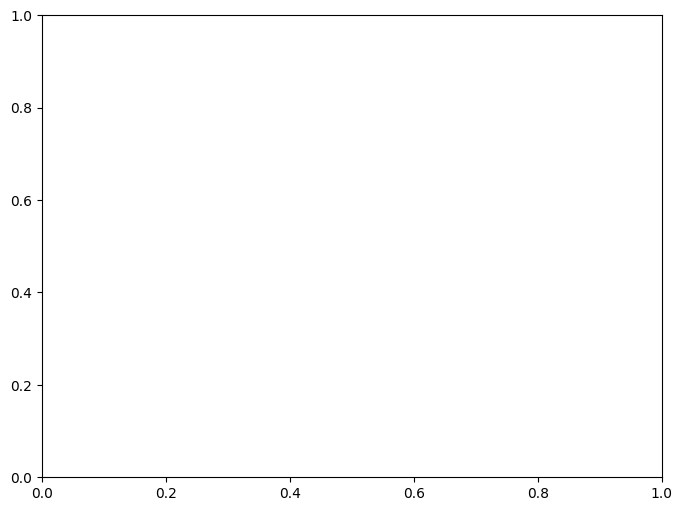

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import joblib

# ÏòàÏãú: Î™®Îç∏ ÏòàÏ∏°Í∞íÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)

# Î†àÏù¥Î∏î ÎîîÏΩîÎçî Î°úÎî© (ÏûàÎã§Î©¥)
label_encoder = joblib.load("label_encoder.pkl")
class_names = label_encoder.classes_

# classification report
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred_labels)
x = np.arange(len(class_names))

plt.figure(figsize=(8, 6))
bar_width = 0.25
plt.bar(x, precision, width=bar_width, label='precision')
plt.bar(x + bar_width, recall, width=bar_width, label='recall')
plt.bar(x + 2*bar_width, f1, width=bar_width, label='f1-score')
plt.xticks(x + bar_width, class_names)
plt.title("Precision / Recall / F1-score by Class")
plt.legend()
plt.tight_layout()
plt.show()


# Î™®Îç∏ Ï†ÄÏû• Î∞è ÏãúÍ∞ÅÌôî

In [1]:
import json
import matplotlib.pyplot as plt

# Î°úÍ∑∏ Ï†ÄÏû• Í≤ΩÎ°ú
log_path = "/media/usou/PortableSSD/mldl_project/models/train_history_log.json"

# history Í∞ùÏ≤¥Î•º JSONÏúºÎ°ú Ï†ÄÏû•
with open(log_path, "w") as f:
    json.dump(history.history, f)
print("‚úÖ ÌïôÏäµ Î°úÍ∑∏ Ï†ÄÏû• ÏôÑÎ£å")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))

# Ï†ïÌôïÎèÑ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'history' is not defined

# .keras Ìè¨Îß∑ ÏúºÎ°ú Ï†ÄÏû•

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/media/usou/PortableSSD/mldl_project/models/best_model_generator.h5")


In [ ]:
model.save("best_model_generator.keras")

# .keras -> .h5 Î°ú Î≥ÄÍ≤Ω

In [3]:
from tensorflow.keras.models import load_model

# 1. Í∏∞Ï°¥ .keras Î™®Îç∏ Í≤ΩÎ°ú
keras_path = "/home/usou/dev_ws/superbad/deeplearning-repo-3/ai/models//voice_emotion_model.keras"

# 2. Ï†ÄÏû•Ìï† .h5 Î™®Îç∏ Í≤ΩÎ°ú
h5_path = "/home/usou/dev_ws/superbad/deeplearning-repo-3/ai/models//voice_emotion_model.h5"

# 3. Î™®Îç∏ Î°úÎìú ÌõÑ Ï†ÄÏû•
model = load_model(keras_path, compile=False)
model.save(h5_path)

print("‚úÖ Î≥ÄÌôò ÏôÑÎ£å: .keras ‚Üí .h5")


‚úÖ Î≥ÄÌôò ÏôÑÎ£å: .keras ‚Üí .h5


# Î™®Îç∏ ÌÖåÏä§Ìä∏

## m4a ‚Üí wav Î≥ÄÌôò

In [ ]:
from pydub import AudioSegment
import os

def convert_to_wav(input_path, output_path=None):
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑÏöî: {input_path}")

    if output_path is None:
        output_path = os.path.splitext(input_path)[0] + ".wav"

    audio = AudioSegment.from_file(input_path, format="m4a")
    audio.export(output_path, format="wav")
    print("‚úÖ Î≥ÄÌôò ÏôÑÎ£å:", output_path)
    return output_path


## m4a, mp3, mp4 -> wav

In [13]:
import os
from pydub import AudioSegment

def convert_to_wav(input_path, output_path=None):
    """
    Ïò§ÎîîÏò§ ÎòêÎäî ÎπÑÎîîÏò§ ÌååÏùºÏùÑ WAVÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    ÏßÄÏõê Ìè¨Îß∑: .wav, .m4a, .mp3, .mp4 Îì±
    ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ffmpegÍ∞Ä ÏÑ§ÏπòÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï©ÎãàÎã§.

    :param input_path: ÏûÖÎ†• ÌååÏùº Í≤ΩÎ°ú
    :param output_path: Ï∂úÎ†• ÌååÏùº Í≤ΩÎ°ú (NoneÏù¥Î©¥ ÏûêÎèô ÏÉùÏÑ±)
    :return: Î≥ÄÌôòÎêú WAV ÌååÏùº Í≤ΩÎ°ú
    """
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏïÑÏöî: {input_path}")

    ext = os.path.splitext(input_path)[1].lower()
    if output_path is None:
        output_path = os.path.splitext(input_path)[0] + ".wav"

    # pydubÏù¥ ffmpegÎ•º ÌÜµÌï¥ Î™®Îì† ÌòïÏãù Ï≤òÎ¶¨Ìï®
    try:
        audio = AudioSegment.from_file(input_path)
        audio.export(output_path, format="wav")
    except Exception as e:
        raise RuntimeError(f"Ïò§ÎîîÏò§ Î≥ÄÌôò Ïã§Ìå®: {e}")

    print("Î≥ÄÌôò ÏôÑÎ£å:", output_path)
    return output_path


## MFCC Ï∂îÏ∂ú(Î™®Îç∏ ÏûÖÎ†• Ï§ÄÎπÑ)

In [14]:
import librosa
import numpy as np

def extract_mfcc(file_path, sr=16000, n_mfcc=40):
    y, sr = librosa.load(file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc = np.expand_dims(mfcc, axis=-1)  # CNN ÏûÖÎ†•ÏùÑ ÏúÑÌï¥ Ï±ÑÎÑê Ï∞®Ïõê Ï∂îÍ∞Ä
    return mfcc


## Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©

In [15]:
import os
import numpy as np
import glob
import pickle
from sklearn.preprocessing import LabelEncoder

# ============================
# 1. ÏÑ§Ï†ï
# ============================
# Î†àÏù¥Î∏î Î∞∞ÏπòÍ∞Ä Ï†ÄÏû•Îêú Í≤ΩÎ°ú
label_dir = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches"

# Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏î Ï†ÄÏû• Í≤ΩÎ°ú
encoded_label_dir = os.path.join(label_dir, "encoded_labels")
os.makedirs(encoded_label_dir, exist_ok=True)

# ============================
# 2. Î™®Îì† Î∞∞Ïπò Î†àÏù¥Î∏î ÏàòÏßë Î∞è 'nan' Ï†úÍ±∞
# ============================
label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

all_labels = []
batch_label_data = []
valid_indices_per_batch = []

for label_file in label_files:
    labels = np.load(label_file, allow_pickle=True)
    
    # 'nan' Î¨∏ÏûêÏó¥ Ï†úÍ±∞
    valid_indices = [i for i, l in enumerate(labels) if str(l).lower() != 'nan']
    valid_labels = [labels[i] for i in valid_indices]

    all_labels.extend(valid_labels)
    batch_label_data.append(valid_labels)
    valid_indices_per_batch.append(valid_indices)

# ============================
# 3. Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
# ============================
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Ïù∏ÏΩîÎçî Ï†ÄÏû•
with open(os.path.join(label_dir, "label_encoder.pkl"), "wb") as f:
    pickle.dump(label_encoder, f)

# ============================
# 4. Ïù∏ÏΩîÎî©Îêú Î†àÏù¥Î∏î Î∞∞ÏπòÎ≥ÑÎ°ú Ï†ÄÏû•
# ============================
for i, labels in enumerate(batch_label_data):
    encoded = label_encoder.transform(labels)
    save_path = os.path.join(encoded_label_dir, f"label_batch_{i}.npy")
    np.save(save_path, encoded)

print(f"Ï¥ù Ïú†Ìö® Î†àÏù¥Î∏î Í∞úÏàò (nan Ï†úÏô∏): {len(all_labels)}")
print(f"Ïù∏ÏΩîÎî©Îêú ÌÅ¥ÎûòÏä§ Î™©Î°ù: {label_encoder.classes_}")
print(f"Ïú†Ìö® Î∞∞Ïπò Ïàò: {len(label_files)}")
print("nan Ï†úÍ±∞ Î∞è Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å")


Ï¥ù Ïú†Ìö® Î†àÏù¥Î∏î Í∞úÏàò (nan Ï†úÏô∏): 530280
Ïù∏ÏΩîÎî©Îêú ÌÅ¥ÎûòÏä§ Î™©Î°ù: ['Angry' 'Anxious' 'Embarrassed' 'Happy' 'Hurt' 'Neutrality' 'Sad']
Ïú†Ìö® Î∞∞Ïπò Ïàò: 82
nan Ï†úÍ±∞ Î∞è Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å


## Í∞êÏ†ï Î∂ÑÏÑù ÏòàÏ∏°

In [16]:
from tensorflow.keras.models import load_model
import numpy as np

# Î™®Îç∏ Î°úÎìú
model_path = "best_model_generator_voice_emotion_analyze.keras"
model = load_model(model_path)

# LabelEncoder Î°úÎìú
import pickle
with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

def predict_emotion(mfcc_data):
    # ÏûÖÎ†• ÌòïÌÉú ÎßûÏ∂îÍ∏∞ (1, time, freq, 1)
    X = np.expand_dims(mfcc_data, axis=0)
    pred = model.predict(X)
    idx = np.argmax(pred)
    label = le.inverse_transform([idx])[0]
    confidence = float(np.max(pred))
    return label, confidence


/home/usou/venv/test_super/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Ï†ÑÏ≤¥ ÌååÏù¥ÌîÑÎùºÏù∏ Ïã§Ìñâ ÏòàÏãú

In [17]:
# 1. ÌååÏùº Î≥ÄÌôò
m4a_path = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/VS1/1.Í∞êÏ†ï/5.ÏÉÅÏ≤ò/0005_G1A3E5S0C0_LJB/0005_G1A3E5S0C0_LJB_000011.wav"

wav_path = convert_to_wav(m4a_path)

# 2. MFCC Ï∂îÏ∂ú
mfcc = extract_mfcc(wav_path)

# 3. Í∞êÏ†ï ÏòàÏ∏°
emotion, score = predict_emotion(mfcc)
print(f"\n Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º: {emotion} ({score:.2%} ÌôïÏã†)")


Î≥ÄÌôò ÏôÑÎ£å: /media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/VS1/1.Í∞êÏ†ï/5.ÏÉÅÏ≤ò/0005_G1A3E5S0C0_LJB/0005_G1A3E5S0C0_LJB_000011.wav
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 412ms/step

 Í∞êÏ†ï Î∂ÑÏÑù Í≤∞Í≥º: Happy (100.00% ÌôïÏã†)


In [10]:
import librosa
import numpy as np
import tensorflow as tf
import pickle

# ÏÑ§Ï†ï
wav_path = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/VS1/1.Í∞êÏ†ï/5.ÏÉÅÏ≤ò/0005_G1A3E5S0C0_LJB/0005_G1A3E5S0C0_LJB_000011.wav"  # Ïòà: ./val_data/sample_001.wav
label_encoder_path = "/media/usou/PortableSSD/mldl_project/data/mfcc_batches/label_encoder.pkl"  # Ïòà: ./label_encoder.pkl
model_path = "best_model_generator_voice_emotion_analyze.keras"


# 1. Î™®Îç∏ Î∞è ÎùºÎ≤® Ïù∏ÏΩîÎçî Î°úÎìú
model = tf.keras.models.load_model(model_path)

with open(label_encoder_path, "rb") as f:
    label_encoder = pickle.load(f)

# 2. wav ÌååÏùºÏóêÏÑú MFCC Ï∂îÏ∂ú
def extract_mfcc(wav_path, sr=16000, n_mfcc=40, max_len=300):
    y, sr = librosa.load(wav_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    
    # Í∏∏Ïù¥ Í≥†Ï†ï (ÏßßÏúºÎ©¥ Ìå®Îî©, Í∏∏Î©¥ ÏûêÎ¶Ñ)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]

    return mfcc

# 3. ÏòàÏ∏°
mfcc = extract_mfcc(wav_path)
mfcc_input = mfcc[np.newaxis, ..., np.newaxis]  # (1, 40, 300, 1) ÌòïÌÉúÎ°ú reshape

y_pred = model.predict(mfcc_input)

# 4. Í≤∞Í≥º Ï∂úÎ†•
pred_index = np.argmax(y_pred)
pred_emotion = label_encoder.inverse_transform([pred_index])[0]

print("Softmax ÌôïÎ•† Î∂ÑÌè¨:", y_pred[0])
print("ÏòàÏ∏°Îêú Í∞êÏ†ï:", pred_emotion)


/home/usou/venv/test_super/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-04-02 12:21:20.363584: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.11 = (f32[1,128,10,75]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,64,10,75]{3,2,1,0} %bitcast.440, f32[128,64,3,3]{3,2,1,0} %bitcast.447, f32[128]{0} %bitcast.449), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_2_1/convolution" source_file="/home/usou/venv/test_super/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_o

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 694ms/step
Softmax ÌôïÎ•† Î∂ÑÌè¨: [6.35206882e-17 7.89071120e-13 1.22968635e-10 1.00000000e+00
 3.78825990e-27 1.18888200e-12 5.54563053e-27 1.00396704e-16]
ÏòàÏ∏°Îêú Í∞êÏ†ï: Happy


## Ïû¨ÌïôÏäµ

-  Í∞êÏ†ï ÌÅ¥ÎûòÏä§ 7 -> 4Í∞ú Ï∂ïÏÜå
- ÌñâÎ≥µ, Ïä¨Ìîî, Î∂ÑÎÖ∏, Ï§ëÎ¶Ω
- Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Î∞è Í∞úÏÑ† Î™®Îç∏ ÌïÑÏöî
- Î™®Îç∏ ÏÑ±Îä• Ìñ•ÏÉÅ Ï†ÑÎûµ
    - Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï + ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù + Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

# Ï†ÑÏ≤¥ ÌùêÎ¶Ñ ÏöîÏïΩ
‚úÖ Ï†ÑÏ≤¥ ÌùêÎ¶Ñ ÏöîÏïΩ

| Îã®Í≥Ñ         | ÏÑ§Î™Ö                                              |
|--------------|---------------------------------------------------|
| 1Îã®Í≥Ñ (ÏôÑÎ£å) | JSON ‚Üí `metadata_cleaned.csv` ÏÉùÏÑ±               |
| 2Îã®Í≥Ñ        | 4Í∞ú Í∞êÏ†ïÎßå ÌïÑÌÑ∞ÎßÅ ‚Üí `metadata_4class.csv` Ï†ÄÏû•   |
| 3Îã®Í≥Ñ        | MFCC Ï∂îÏ∂ú + Ï¶ùÍ∞ï Ï†ÅÏö©                             |
| 4Îã®Í≥Ñ        | Ïù∏ÏΩîÎî© ‚Üí Î∞∞Ïπò Î∂ÑÌï† Ï†ÄÏû•                          |


# 1Îã®Í≥Ñ: JSON ‚Üí DataFrame Î≥ÄÌôò 

In [6]:
import os
import json
import pandas as pd

# ÎùºÎ≤®ÎßÅ JSONÏù¥ ÏúÑÏπòÌïú ÏµúÏÉÅÏúÑ Ìè¥Îçî Í≤ΩÎ°ú
label_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞/"

# Ïã§Ï†ú wav ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÎäî ÏõêÏ≤ú Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
wav_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/"

# Í≤∞Í≥º CSV Î∞è Î°úÍ∑∏Î•º Ï†ÄÏû•Ìï† Ìè¥Îçî Í≤ΩÎ°ú
save_dir = "./data/usou"
os.makedirs(save_dir, exist_ok=True)

# ÏÇ¨Ïö©Ìï† Í∞êÏ†ï 4Í∞úÎßå ÌïÑÌÑ∞ÎßÅ ÎåÄÏÉÅ
target_classes = ['Happy', 'Sad', 'Angry', 'Neutrality']

# Ï†ïÏ†úÎêú Îç∞Ïù¥ÌÑ∞ÏôÄ ÎàÑÎùΩ ÌååÏùº Î°úÍ∑∏Î•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏
data = []
broken_files = []

# Î™®Îì† ÌïòÏúÑ Ìè¥ÎçîÎ•º ÏàúÌöåÌïòÎ©∞ JSON ÌååÏùº ÌÉêÏÉâ
for folder_path, _, files in os.walk(label_root):
    for file_name in files:
        if not file_name.endswith(".json"):
            continue  # JSON ÌååÏùºÎßå Ï≤òÎ¶¨

        json_path = os.path.join(folder_path, file_name)
        try:
            # JSON ÌååÏùº Î°úÎî©
            with open(json_path, 'r', encoding='utf-8') as f:
                content = json.load(f)

            # Í∞êÏ†ï Ï†ïÎ≥¥ Ï∂îÏ∂ú Î∞è ÌïÑÌÑ∞ÎßÅ
            emotion = content["ÌôîÏûêÏ†ïÎ≥¥"]["Emotion"]
            if emotion not in target_classes:
                continue  # ÏßÄÏ†ïÎêú Í∞êÏ†ïÏù¥ ÏïÑÎãå Í≤ΩÏö∞ Ï†úÏô∏

            # Í∑∏ Ïô∏ Î∂ÄÍ∞Ä Ï†ïÎ≥¥ Ï∂îÏ∂ú
            style = content["ÌôîÏûêÏ†ïÎ≥¥"].get("SpeechStyle", "N/A")
            sensitivity = content["ÌôîÏûêÏ†ïÎ≥¥"].get("Sensitivity", "N/A")
            wav_file = content["ÌååÏùºÏ†ïÎ≥¥"]["FileName"]

            # Í≤ΩÎ°ú Î≥ÄÌôò (TL ‚Üí TSÎ°ú ÏàòÏ†ïÌïòÏó¨ wav Í≤ΩÎ°ú Ïû¨Íµ¨ÏÑ±)
            relative_path = os.path.relpath(folder_path, start=label_root)
            relative_path = relative_path.replace("TL", "TS")
            wav_path = os.path.join(wav_root, relative_path, wav_file)

            # wav ÌååÏùº Ï°¥Ïû¨ Ïó¨Î∂Ä ÌôïÏù∏ ÌõÑ Ï†ÄÏû•
            if os.path.exists(wav_path):
                data.append({
                    "wav_path": wav_path,
                    "emotion": emotion,
                    "style": style,
                    "sensitivity": sensitivity
                })
            else:
                broken_files.append(wav_path)
        except Exception as e:
            # JSON Î°úÎî© Ïã§Ìå® ÎòêÎäî ÌååÏã± Ïò§Î•ò Î∞úÏÉù Ïãú Í≤ΩÎ°ú Ï†ÄÏû•
            broken_files.append(json_path)

# ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
df = pd.DataFrame(data)

# Í≤∞Í≥º CSV Ï†ÄÏû•
df.to_csv(os.path.join(save_dir, "metadata_4class.csv"), index=False)

# ÎàÑÎùΩÎêú Í≤ΩÎ°ú Ï†ÄÏû•
with open(os.path.join(save_dir, "broken_files.txt"), "w") as f:
    for path in broken_files:
        f.write(path + "\n")

# ÏµúÏ¢Ö Ï≤òÎ¶¨ Í≤∞Í≥º Ï∂úÎ†•
print("Ï¥ù ÏàòÏßëÎêú ÏÉòÌîå:", len(df))
print("ÏóêÎü¨ Î∞úÏÉù Ïàò:", len(broken_files))


Ï¥ù ÏàòÏßëÎêú ÏÉòÌîå: 300584
ÏóêÎü¨ Î∞úÏÉù Ïàò: 0


# MFCC Ï∂îÏ∂ú + Ï¶ùÍ∞ï

- metadata_4class.csvÏóêÏÑú Í≤ΩÎ°úÏôÄ Í∞êÏ†ï ÏùΩÍ∏∞

- audiomentationsÎ°ú Ï¶ùÍ∞ï (2Î∞∞)

- MFCC Ï∂îÏ∂ú (40 x 300)

- mfcc_data.npy, labels.npy Ï†ÄÏû•

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
from tqdm import tqdm

# 1. ÏûÖÎ†• Î∞è Ï∂úÎ†• Í≤ΩÎ°ú ÏÑ§Ï†ï
csv_path = "./data/usou/metadata_4class.csv"
output_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"
os.makedirs(output_dir, exist_ok=True)

# 2. Ïò§ÎîîÏò§ Î∞è MFCC Í¥ÄÎ†® ÏÑ§Ï†ï
n_mfcc = 40                     # Ï∂îÏ∂úÌï† MFCC Í≥ÑÏàò Ïàò
max_len = 300                  # MFCC Í∏∏Ïù¥ Í≥†Ï†ïÍ∞í
n_augment = 2                  # Ï¶ùÍ∞ï ÌöüÏàò (ÏõêÎ≥∏ Ìè¨Ìï® Ï¥ù 3Î∞∞)
batch_size = 1000              # Î∞∞Ïπò Ï†ÄÏû• Îã®ÏúÑ

# 3. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(csv_path)

# 4. Ï¶ùÍ∞ï ÌååÏù¥ÌîÑÎùºÏù∏ ÏÑ§Ï†ï
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
    TimeStretch(min_rate=0.9, max_rate=1.1, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_shift=-0.2, max_shift=0.2, p=0.5)
])

# 5. MFCC Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò
def extract_mfcc(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# 6. Î∞∞ÏπòÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•ÌïòÍ∏∞ ÏúÑÌïú Î≥ÄÏàò Ï¥àÍ∏∞Ìôî
mfcc_batch = []
label_batch = []
batch_index = 0

# 7. tqdmÏùÑ Ïù¥Ïö©Ìï¥ Ï†ÑÏ≤¥ ÏßÑÌñâ ÏÉÅÌô© ÌëúÏãú
for idx, row in tqdm(df.iterrows(), total=len(df), desc="MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï"):
    wav_path = row["wav_path"]
    emotion = row["emotion"]

    try:
        # ÏõêÎ≥∏ Î°úÎî©
        y, sr = librosa.load(wav_path, sr=16000)

        # ÏõêÎ≥∏ MFCC Ï†ÄÏû•
        mfcc_batch.append(extract_mfcc(y, sr))
        label_batch.append(emotion)

        # Ï¶ùÍ∞ï MFCC Ï†ÄÏû•
        for _ in range(n_augment):
            y_aug = augment(samples=y, sample_rate=sr)
            mfcc_batch.append(extract_mfcc(y_aug, sr))
            label_batch.append(emotion)

        # ÏùºÏ†ï ÌÅ¨Í∏∞Ïùò Î∞∞ÏπòÍ∞Ä Î™®Ïù¥Î©¥ Ï†ÄÏû• ÌõÑ Ï¥àÍ∏∞Ìôî
        if len(mfcc_batch) >= batch_size:
            np.save(os.path.join(output_dir, f"mfcc_batch_{batch_index}.npy"), np.array(mfcc_batch))
            np.save(os.path.join(output_dir, f"label_batch_{batch_index}.npy"), np.array(label_batch, dtype=object))
            print(f"Î∞∞Ïπò {batch_index} Ï†ÄÏû• ÏôÑÎ£å - {len(mfcc_batch)}Í∞ú")
            batch_index += 1
            mfcc_batch.clear()
            label_batch.clear()

    except Exception as e:
        print(f"Ïò§Î•ò Î∞úÏÉù: {wav_path} ‚Üí {e}")
        continue

# 8. ÎßàÏßÄÎßâÏóê ÎÇ®ÏùÄ Î∞∞ÏπòÎèÑ Ï†ÄÏû•
if mfcc_batch:
    np.save(os.path.join(output_dir, f"mfcc_batch_{batch_index}.npy"), np.array(mfcc_batch))
    np.save(os.path.join(output_dir, f"label_batch_{batch_index}.npy"), np.array(label_batch, dtype=object))
    print(f"ÎßàÏßÄÎßâ Î∞∞Ïπò {batch_index} Ï†ÄÏû• ÏôÑÎ£å - {len(mfcc_batch)}Í∞ú")

print("Ï†ÑÏ≤¥ MFCC Ï∂îÏ∂ú Î∞è Ï†ÄÏû• ÏûëÏóÖ ÏôÑÎ£å")


/tmp/ipykernel_4643/3246010131.py:20: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   0%|          | 335/300584 [00:25<7:26:13, 11.21it/s]

Î∞∞Ïπò 0 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   0%|          | 669/300584 [00:52<7:05:35, 11.75it/s]

Î∞∞Ïπò 1 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   0%|          | 1003/300584 [01:19<6:33:32, 12.69it/s]

Î∞∞Ïπò 2 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   0%|          | 1339/300584 [01:45<5:59:34, 13.87it/s]

Î∞∞Ïπò 3 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 1672/300584 [02:12<7:22:27, 11.26it/s]

Î∞∞Ïπò 4 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 2005/300584 [02:39<7:08:27, 11.61it/s]

Î∞∞Ïπò 5 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 2339/300584 [03:09<9:13:48,  8.98it/s] 

Î∞∞Ïπò 6 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 2673/300584 [03:38<7:00:54, 11.80it/s]

Î∞∞Ïπò 7 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 3007/300584 [04:06<7:00:46, 11.79it/s]

Î∞∞Ïπò 8 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 3341/300584 [04:36<10:25:53,  7.92it/s]

Î∞∞Ïπò 9 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|          | 3675/300584 [05:06<8:14:35, 10.01it/s] 

Î∞∞Ïπò 10 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|‚ñè         | 4011/300584 [05:34<5:49:34, 14.14it/s]

Î∞∞Ïπò 11 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   1%|‚ñè         | 4343/300584 [06:02<6:37:31, 12.42it/s] 

Î∞∞Ïπò 12 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 4678/300584 [06:30<6:45:41, 12.16it/s]

Î∞∞Ïπò 13 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 5012/300584 [06:59<6:58:11, 11.78it/s]

Î∞∞Ïπò 14 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 5345/300584 [07:27<7:35:58, 10.79it/s]

Î∞∞Ïπò 15 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 5680/300584 [07:54<6:02:02, 13.58it/s]

Î∞∞Ïπò 16 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 6014/300584 [08:21<6:38:06, 12.33it/s]

Î∞∞Ïπò 17 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 6349/300584 [08:48<6:16:18, 13.03it/s]

Î∞∞Ïπò 18 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 6683/300584 [09:15<6:27:29, 12.64it/s]

Î∞∞Ïπò 19 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 7015/300584 [09:42<7:19:14, 11.14it/s]

Î∞∞Ïπò 20 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   2%|‚ñè         | 7350/300584 [10:09<6:11:35, 13.15it/s]

Î∞∞Ïπò 21 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 7685/300584 [10:36<6:33:22, 12.41it/s]

Î∞∞Ïπò 22 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 8018/300584 [11:03<7:40:19, 10.59it/s]

Î∞∞Ïπò 23 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 8351/300584 [11:28<7:38:08, 10.63it/s]

Î∞∞Ïπò 24 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 8686/300584 [11:55<5:35:51, 14.49it/s]

Î∞∞Ïπò 25 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 9020/300584 [12:22<4:54:02, 16.53it/s]

Î∞∞Ïπò 26 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 9354/300584 [12:48<7:11:23, 11.25it/s]

Î∞∞Ïπò 27 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 9689/300584 [13:14<5:33:36, 14.53it/s]

Î∞∞Ïπò 28 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 10022/300584 [13:41<6:44:33, 11.97it/s]

Î∞∞Ïπò 29 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   3%|‚ñé         | 10357/300584 [14:08<6:08:25, 13.13it/s]

Î∞∞Ïπò 30 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñé         | 10689/300584 [14:34<6:47:13, 11.86it/s]

Î∞∞Ïπò 31 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñé         | 11023/300584 [15:00<6:32:27, 12.30it/s]

Î∞∞Ïπò 32 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 11357/300584 [15:27<6:18:30, 12.74it/s]

Î∞∞Ïπò 33 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 11693/300584 [15:55<7:05:06, 11.33it/s]

Î∞∞Ïπò 34 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 12024/300584 [16:23<6:30:57, 12.30it/s]

Î∞∞Ïπò 35 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 12360/300584 [16:51<6:31:45, 12.26it/s]

Î∞∞Ïπò 36 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 12693/300584 [17:17<6:25:28, 12.45it/s]

Î∞∞Ïπò 37 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 13027/300584 [17:44<8:38:10,  9.25it/s]

Î∞∞Ïπò 38 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   4%|‚ñç         | 13362/300584 [18:11<6:04:20, 13.14it/s]

Î∞∞Ïπò 39 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñç         | 13696/300584 [18:39<7:36:52, 10.47it/s]

Î∞∞Ïπò 40 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñç         | 14029/300584 [19:06<7:31:44, 10.57it/s]

Î∞∞Ïπò 41 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñç         | 14363/300584 [19:33<6:59:13, 11.38it/s]

Î∞∞Ïπò 42 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñç         | 14699/300584 [20:01<6:29:44, 12.23it/s]

Î∞∞Ïπò 43 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñå         | 15031/300584 [20:29<7:42:30, 10.29it/s]

Î∞∞Ïπò 44 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñå         | 15364/300584 [20:57<6:24:02, 12.38it/s]

Î∞∞Ïπò 45 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñå         | 15698/300584 [21:24<6:33:22, 12.07it/s]

Î∞∞Ïπò 46 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñå         | 16034/300584 [21:51<5:45:14, 13.74it/s]

Î∞∞Ïπò 47 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   5%|‚ñå         | 16368/300584 [22:18<6:55:04, 11.41it/s]

Î∞∞Ïπò 48 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 16701/300584 [22:47<6:55:37, 11.38it/s]

Î∞∞Ïπò 49 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 17034/300584 [23:16<7:40:21, 10.27it/s]

Î∞∞Ïπò 50 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 17370/300584 [23:43<7:05:24, 11.10it/s]

Î∞∞Ïπò 51 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 17703/300584 [24:09<7:04:26, 11.11it/s]

Î∞∞Ïπò 52 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 18037/300584 [24:39<6:26:37, 12.18it/s]

Î∞∞Ïπò 53 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 18371/300584 [25:08<8:10:08,  9.60it/s]

Î∞∞Ïπò 54 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñå         | 18706/300584 [25:34<5:56:39, 13.17it/s]

Î∞∞Ïπò 55 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñã         | 19039/300584 [26:03<6:39:39, 11.74it/s]

Î∞∞Ïπò 56 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   6%|‚ñã         | 19374/300584 [26:30<7:01:24, 11.12it/s]

Î∞∞Ïπò 57 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 19707/300584 [26:58<5:38:40, 13.82it/s]

Î∞∞Ïπò 58 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 20041/300584 [27:25<6:55:44, 11.25it/s]

Î∞∞Ïπò 59 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 20375/300584 [27:52<9:08:28,  8.51it/s] 

Î∞∞Ïπò 60 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 20708/300584 [28:24<11:21:42,  6.84it/s]

Î∞∞Ïπò 61 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 21043/300584 [28:53<6:35:56, 11.77it/s] 

Î∞∞Ïπò 62 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 21378/300584 [29:20<6:21:37, 12.19it/s]

Î∞∞Ïπò 63 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 21713/300584 [29:45<5:36:24, 13.82it/s]

Î∞∞Ïπò 64 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 22047/300584 [30:11<5:27:02, 14.20it/s]

Î∞∞Ïπò 65 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   7%|‚ñã         | 22381/300584 [30:38<6:23:49, 12.08it/s]

Î∞∞Ïπò 66 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 22715/300584 [31:03<6:10:05, 12.51it/s]

Î∞∞Ïπò 67 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 23048/300584 [31:31<6:14:15, 12.36it/s]

Î∞∞Ïπò 68 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 23382/300584 [31:59<7:04:44, 10.88it/s]

Î∞∞Ïπò 69 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 23716/300584 [32:25<6:20:27, 12.13it/s] 

Î∞∞Ïπò 70 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 24050/300584 [32:52<5:44:22, 13.38it/s]

Î∞∞Ïπò 71 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 24383/300584 [33:19<6:53:25, 11.13it/s]

Î∞∞Ïπò 72 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 24719/300584 [33:45<5:48:29, 13.19it/s]

Î∞∞Ïπò 73 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 25051/300584 [34:12<7:25:22, 10.31it/s]

Î∞∞Ïπò 74 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   8%|‚ñä         | 25386/300584 [34:40<5:18:55, 14.38it/s]

Î∞∞Ïπò 75 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñä         | 25719/300584 [35:07<6:28:26, 11.79it/s]

Î∞∞Ïπò 76 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñä         | 26053/300584 [35:34<7:16:49, 10.47it/s]

Î∞∞Ïπò 77 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 26386/300584 [36:04<6:30:50, 11.69it/s] 

Î∞∞Ïπò 78 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 26723/300584 [36:30<5:33:30, 13.69it/s]

Î∞∞Ïπò 79 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 27054/300584 [36:58<8:05:43,  9.39it/s]

Î∞∞Ïπò 80 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 27389/300584 [37:29<8:02:09,  9.44it/s] 

Î∞∞Ïπò 81 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 27725/300584 [37:55<6:48:43, 11.13it/s]

Î∞∞Ïπò 82 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 28058/300584 [38:21<5:41:57, 13.28it/s]

Î∞∞Ïπò 83 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:   9%|‚ñâ         | 28392/300584 [38:47<6:44:39, 11.21it/s]

Î∞∞Ïπò 84 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñâ         | 28725/300584 [39:13<5:37:48, 13.41it/s]

Î∞∞Ïπò 85 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñâ         | 29059/300584 [39:40<5:58:31, 12.62it/s]

Î∞∞Ïπò 86 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñâ         | 29395/300584 [40:07<5:41:57, 13.22it/s]

Î∞∞Ïπò 87 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñâ         | 29727/300584 [40:33<6:23:40, 11.77it/s]

Î∞∞Ïπò 88 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñà         | 30062/300584 [40:59<5:44:52, 13.07it/s]

Î∞∞Ïπò 89 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñà         | 30395/300584 [41:27<8:33:38,  8.77it/s]

Î∞∞Ïπò 90 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñà         | 30728/300584 [41:58<6:32:35, 11.46it/s] 

Î∞∞Ïπò 91 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñà         | 31062/300584 [42:26<8:10:57,  9.15it/s]

Î∞∞Ïπò 92 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  10%|‚ñà         | 31397/300584 [42:56<8:03:38,  9.28it/s]

Î∞∞Ïπò 93 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 31732/300584 [43:26<7:46:42,  9.60it/s]

Î∞∞Ïπò 94 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 32064/300584 [43:54<7:16:46, 10.25it/s]

Î∞∞Ïπò 95 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 32401/300584 [44:22<5:59:09, 12.45it/s]

Î∞∞Ïπò 96 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 32732/300584 [44:49<6:10:44, 12.04it/s]

Î∞∞Ïπò 97 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 33068/300584 [45:18<6:16:20, 11.85it/s]

Î∞∞Ïπò 98 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 33401/300584 [45:46<7:26:32,  9.97it/s]

Î∞∞Ïπò 99 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà         | 33736/300584 [46:15<5:53:52, 12.57it/s]

Î∞∞Ïπò 100 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà‚ñè        | 34070/300584 [46:43<6:17:56, 11.75it/s]

Î∞∞Ïπò 101 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  11%|‚ñà‚ñè        | 34403/300584 [47:10<6:59:45, 10.57it/s]

Î∞∞Ïπò 102 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 34738/300584 [47:37<7:14:55, 10.19it/s]

Î∞∞Ïπò 103 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 35073/300584 [48:05<6:38:47, 11.10it/s]

Î∞∞Ïπò 104 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 35404/300584 [48:32<5:53:39, 12.50it/s]

Î∞∞Ïπò 105 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 35739/300584 [49:00<6:34:12, 11.20it/s] 

Î∞∞Ïπò 106 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 36073/300584 [49:28<7:33:03,  9.73it/s]

Î∞∞Ïπò 107 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 36408/300584 [49:56<6:51:10, 10.71it/s]

Î∞∞Ïπò 108 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 36742/300584 [50:25<7:42:21,  9.51it/s]

Î∞∞Ïπò 109 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 37077/300584 [50:53<6:37:57, 11.04it/s]

Î∞∞Ïπò 110 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  12%|‚ñà‚ñè        | 37410/300584 [51:24<7:01:46, 10.40it/s]

Î∞∞Ïπò 111 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 37744/300584 [51:53<6:54:57, 10.56it/s]

Î∞∞Ïπò 112 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 38077/300584 [52:21<6:13:23, 11.72it/s]

Î∞∞Ïπò 113 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 38412/300584 [52:49<8:07:04,  8.97it/s]

Î∞∞Ïπò 114 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 38747/300584 [53:18<6:17:29, 11.56it/s]

Î∞∞Ïπò 115 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 39079/300584 [53:45<8:45:32,  8.29it/s]

Î∞∞Ïπò 116 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 39413/300584 [54:11<6:43:02, 10.80it/s]

Î∞∞Ïπò 117 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 39748/300584 [54:35<6:34:44, 11.01it/s]

Î∞∞Ïπò 118 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 40082/300584 [55:01<5:41:57, 12.70it/s]

Î∞∞Ïπò 119 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  13%|‚ñà‚ñé        | 40416/300584 [55:25<6:54:30, 10.46it/s]

Î∞∞Ïπò 120 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñé        | 40749/300584 [55:53<6:15:25, 11.54it/s] 

Î∞∞Ïπò 121 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñé        | 41085/300584 [56:20<5:37:39, 12.81it/s]

Î∞∞Ïπò 122 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 41419/300584 [56:47<6:52:00, 10.48it/s]

Î∞∞Ïπò 123 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 41751/300584 [57:12<6:04:29, 11.84it/s]

Î∞∞Ïπò 124 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 42085/300584 [57:38<7:05:15, 10.13it/s]

Î∞∞Ïπò 125 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 42420/300584 [58:03<6:33:10, 10.94it/s]

Î∞∞Ïπò 126 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 42754/300584 [58:29<6:14:19, 11.48it/s]

Î∞∞Ïπò 127 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 43088/300584 [58:58<7:13:24,  9.90it/s]

Î∞∞Ïπò 128 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  14%|‚ñà‚ñç        | 43422/300584 [59:27<6:35:31, 10.84it/s]

Î∞∞Ïπò 129 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñç        | 43758/300584 [59:53<5:46:19, 12.36it/s]

Î∞∞Ïπò 130 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñç        | 44089/300584 [1:00:23<7:26:08,  9.58it/s]

Î∞∞Ïπò 131 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñç        | 44423/300584 [1:00:54<7:04:34, 10.06it/s] 

Î∞∞Ïπò 132 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñç        | 44757/300584 [1:01:28<9:09:55,  7.75it/s] 

Î∞∞Ïπò 133 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñå        | 45092/300584 [1:02:04<6:15:40, 11.34it/s] 

Î∞∞Ïπò 134 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñå        | 45424/300584 [1:02:36<13:53:21,  5.10it/s]

Î∞∞Ïπò 135 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñå        | 45759/300584 [1:03:16<9:04:47,  7.80it/s] 

Î∞∞Ïπò 136 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñå        | 46093/300584 [1:03:47<6:46:32, 10.43it/s] 

Î∞∞Ïπò 137 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  15%|‚ñà‚ñå        | 46426/300584 [1:04:20<6:45:12, 10.45it/s] 

Î∞∞Ïπò 138 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 46760/300584 [1:04:54<7:23:27,  9.54it/s] 

Î∞∞Ïπò 139 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 47096/300584 [1:05:25<6:48:10, 10.35it/s]

Î∞∞Ïπò 140 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 47431/300584 [1:05:56<6:27:59, 10.87it/s]

Î∞∞Ïπò 141 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 47763/300584 [1:06:22<6:02:19, 11.63it/s]

Î∞∞Ïπò 142 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 48099/300584 [1:06:50<5:00:54, 13.98it/s]

Î∞∞Ïπò 143 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 48432/300584 [1:07:17<5:43:21, 12.24it/s]

Î∞∞Ïπò 144 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñå        | 48766/300584 [1:07:43<5:45:38, 12.14it/s]

Î∞∞Ïπò 145 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñã        | 49100/300584 [1:08:09<6:57:47, 10.03it/s]

Î∞∞Ïπò 146 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  16%|‚ñà‚ñã        | 49434/300584 [1:08:37<6:23:28, 10.92it/s]

Î∞∞Ïπò 147 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 49768/300584 [1:09:04<6:40:14, 10.44it/s]

Î∞∞Ïπò 148 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 50102/300584 [1:09:33<6:23:46, 10.88it/s] 

Î∞∞Ïπò 149 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 50435/300584 [1:10:00<5:48:35, 11.96it/s]

Î∞∞Ïπò 150 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 50770/300584 [1:10:29<5:57:33, 11.64it/s]

Î∞∞Ïπò 151 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 51104/300584 [1:10:59<6:21:36, 10.90it/s]

Î∞∞Ïπò 152 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 51439/300584 [1:11:29<5:59:10, 11.56it/s]

Î∞∞Ïπò 153 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 51772/300584 [1:11:56<7:16:43,  9.50it/s]

Î∞∞Ïπò 154 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 52106/300584 [1:12:25<6:47:22, 10.17it/s]

Î∞∞Ïπò 155 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  17%|‚ñà‚ñã        | 52438/300584 [1:12:53<6:14:11, 11.05it/s]

Î∞∞Ïπò 156 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 52775/300584 [1:13:23<5:11:48, 13.25it/s]

Î∞∞Ïπò 157 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 53108/300584 [1:13:53<5:45:59, 11.92it/s]

Î∞∞Ïπò 158 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 53442/300584 [1:14:26<6:29:56, 10.56it/s]

Î∞∞Ïπò 159 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 53776/300584 [1:14:56<6:44:11, 10.18it/s]

Î∞∞Ïπò 160 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 54108/300584 [1:15:25<7:19:08,  9.35it/s]

Î∞∞Ïπò 161 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 54444/300584 [1:15:57<7:44:17,  8.84it/s] 

Î∞∞Ïπò 162 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 54777/300584 [1:16:27<7:33:52,  9.03it/s]

Î∞∞Ïπò 163 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 55112/300584 [1:16:57<7:29:39,  9.10it/s]

Î∞∞Ïπò 164 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  18%|‚ñà‚ñä        | 55446/300584 [1:17:27<6:01:05, 11.31it/s]

Î∞∞Ïπò 165 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñä        | 55780/300584 [1:17:57<8:08:32,  8.35it/s]

Î∞∞Ïπò 166 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñä        | 56113/300584 [1:18:27<6:50:55,  9.92it/s]

Î∞∞Ïπò 167 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 56447/300584 [1:18:57<5:27:02, 12.44it/s]

Î∞∞Ïπò 168 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 56782/300584 [1:19:26<5:48:00, 11.68it/s]

Î∞∞Ïπò 169 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 57116/300584 [1:19:51<5:34:26, 12.13it/s]

Î∞∞Ïπò 170 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 57449/300584 [1:20:17<5:10:20, 13.06it/s]

Î∞∞Ïπò 171 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 57785/300584 [1:20:43<6:08:23, 10.98it/s]

Î∞∞Ïπò 172 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 58117/300584 [1:21:08<5:32:21, 12.16it/s]

Î∞∞Ïπò 173 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  19%|‚ñà‚ñâ        | 58453/300584 [1:21:34<5:10:34, 12.99it/s]

Î∞∞Ïπò 174 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñâ        | 58785/300584 [1:22:00<5:49:39, 11.53it/s]

Î∞∞Ïπò 175 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñâ        | 59120/300584 [1:22:27<5:39:20, 11.86it/s]

Î∞∞Ïπò 176 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñâ        | 59454/300584 [1:22:53<5:10:38, 12.94it/s] 

Î∞∞Ïπò 177 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñâ        | 59789/300584 [1:23:17<5:00:42, 13.35it/s]

Î∞∞Ïπò 178 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñà        | 60121/300584 [1:23:43<6:06:59, 10.92it/s]

Î∞∞Ïπò 179 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñà        | 60455/300584 [1:24:07<5:23:11, 12.38it/s]

Î∞∞Ïπò 180 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñà        | 60790/300584 [1:24:33<5:39:15, 11.78it/s]

Î∞∞Ïπò 181 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñà        | 61125/300584 [1:25:02<5:48:50, 11.44it/s]

Î∞∞Ïπò 182 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  20%|‚ñà‚ñà        | 61458/300584 [1:25:28<6:04:02, 10.95it/s]

Î∞∞Ïπò 183 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 61791/300584 [1:25:54<5:44:17, 11.56it/s]

Î∞∞Ïπò 184 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 62127/300584 [1:26:21<5:26:07, 12.19it/s]

Î∞∞Ïπò 185 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 62458/300584 [1:26:53<10:27:15,  6.33it/s]

Î∞∞Ïπò 186 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 62792/300584 [1:27:26<7:45:13,  8.52it/s] 

Î∞∞Ïπò 187 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 63127/300584 [1:27:55<9:00:55,  7.32it/s]

Î∞∞Ïπò 188 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 63461/300584 [1:28:24<6:29:54, 10.14it/s]

Î∞∞Ïπò 189 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà        | 63794/300584 [1:28:53<5:50:52, 11.25it/s]

Î∞∞Ïπò 190 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà‚ñè       | 64129/300584 [1:29:25<6:05:26, 10.78it/s] 

Î∞∞Ïπò 191 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  21%|‚ñà‚ñà‚ñè       | 64463/300584 [1:29:56<6:40:46,  9.82it/s]

Î∞∞Ïπò 192 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 64797/300584 [1:30:22<5:29:50, 11.91it/s]

Î∞∞Ïπò 193 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 65132/300584 [1:30:47<5:54:34, 11.07it/s]

Î∞∞Ïπò 194 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 65464/300584 [1:31:12<6:21:28, 10.27it/s]

Î∞∞Ïπò 195 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 65799/300584 [1:31:36<4:24:49, 14.78it/s]

Î∞∞Ïπò 196 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 66133/300584 [1:32:01<5:01:06, 12.98it/s]

Î∞∞Ïπò 197 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 66468/300584 [1:32:22<4:04:16, 15.97it/s]

Î∞∞Ïπò 198 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 66804/300584 [1:32:43<3:49:20, 16.99it/s]

Î∞∞Ïπò 199 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 67135/300584 [1:33:05<5:10:15, 12.54it/s]

Î∞∞Ïπò 200 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  22%|‚ñà‚ñà‚ñè       | 67469/300584 [1:33:27<5:13:52, 12.38it/s]

Î∞∞Ïπò 201 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 67804/300584 [1:33:49<4:14:17, 15.26it/s]

Î∞∞Ïπò 202 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 68137/300584 [1:34:13<4:06:39, 15.71it/s]

Î∞∞Ïπò 203 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 68472/300584 [1:34:36<4:15:29, 15.14it/s]

Î∞∞Ïπò 204 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 68807/300584 [1:34:57<4:22:59, 14.69it/s]

Î∞∞Ïπò 205 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 69140/300584 [1:35:19<4:30:31, 14.26it/s]

Î∞∞Ïπò 206 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 69472/300584 [1:35:41<5:08:33, 12.48it/s]

Î∞∞Ïπò 207 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 69809/300584 [1:36:02<4:11:58, 15.26it/s]

Î∞∞Ïπò 208 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 70142/300584 [1:36:24<3:44:43, 17.09it/s]

Î∞∞Ïπò 209 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  23%|‚ñà‚ñà‚ñé       | 70476/300584 [1:36:44<3:44:15, 17.10it/s]

Î∞∞Ïπò 210 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñé       | 70812/300584 [1:37:04<4:01:13, 15.88it/s]

Î∞∞Ïπò 211 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñé       | 71145/300584 [1:37:25<4:31:36, 14.08it/s]

Î∞∞Ïπò 212 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 71477/300584 [1:37:45<6:41:12,  9.52it/s]

Î∞∞Ïπò 213 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 71812/300584 [1:38:06<3:58:55, 15.96it/s]

Î∞∞Ïπò 214 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 72146/300584 [1:38:29<6:14:31, 10.17it/s]

Î∞∞Ïπò 215 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 72481/300584 [1:38:52<4:20:51, 14.57it/s]

Î∞∞Ïπò 216 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 72814/300584 [1:39:14<5:04:47, 12.46it/s]

Î∞∞Ïπò 217 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 73149/300584 [1:39:35<3:26:51, 18.32it/s]

Î∞∞Ïπò 218 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  24%|‚ñà‚ñà‚ñç       | 73480/300584 [1:39:57<5:04:41, 12.42it/s]

Î∞∞Ïπò 219 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñç       | 73817/300584 [1:40:18<3:20:04, 18.89it/s]

Î∞∞Ïπò 220 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñç       | 74149/300584 [1:40:41<5:14:40, 11.99it/s] 

Î∞∞Ïπò 221 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñç       | 74486/300584 [1:41:01<3:29:21, 18.00it/s]

Î∞∞Ïπò 222 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñç       | 74819/300584 [1:41:22<4:17:38, 14.60it/s]

Î∞∞Ïπò 223 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñå       | 75153/300584 [1:41:42<3:49:47, 16.35it/s]

Î∞∞Ïπò 224 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñå       | 75485/300584 [1:42:04<5:33:40, 11.24it/s]

Î∞∞Ïπò 225 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñå       | 75821/300584 [1:42:25<3:05:27, 20.20it/s]

Î∞∞Ïπò 226 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñå       | 76156/300584 [1:42:46<3:19:16, 18.77it/s]

Î∞∞Ïπò 227 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  25%|‚ñà‚ñà‚ñå       | 76488/300584 [1:43:07<3:14:00, 19.25it/s]

Î∞∞Ïπò 228 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 76821/300584 [1:43:29<5:32:30, 11.22it/s]

Î∞∞Ïπò 229 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 77156/300584 [1:43:51<3:53:18, 15.96it/s]

Î∞∞Ïπò 230 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 77490/300584 [1:44:13<5:59:30, 10.34it/s]

Î∞∞Ïπò 231 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 77824/300584 [1:44:36<4:39:51, 13.27it/s]

Î∞∞Ïπò 232 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 78159/300584 [1:44:58<4:25:26, 13.97it/s]

Î∞∞Ïπò 233 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 78494/300584 [1:45:20<3:53:16, 15.87it/s]

Î∞∞Ïπò 234 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñå       | 78825/300584 [1:45:43<4:02:14, 15.26it/s]

Î∞∞Ïπò 235 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñã       | 79161/300584 [1:46:04<5:04:26, 12.12it/s]

Î∞∞Ïπò 236 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  26%|‚ñà‚ñà‚ñã       | 79495/300584 [1:46:26<4:44:33, 12.95it/s]

Î∞∞Ïπò 237 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 79830/300584 [1:46:48<3:44:16, 16.41it/s]

Î∞∞Ïπò 238 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 80160/300584 [1:47:10<4:33:14, 13.45it/s]

Î∞∞Ïπò 239 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 80496/300584 [1:47:32<3:42:58, 16.45it/s]

Î∞∞Ïπò 240 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 80830/300584 [1:47:56<4:17:38, 14.22it/s]

Î∞∞Ïπò 241 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 81165/300584 [1:48:18<4:35:53, 13.26it/s]

Î∞∞Ïπò 242 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 81498/300584 [1:48:40<4:02:10, 15.08it/s]

Î∞∞Ïπò 243 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 81833/300584 [1:49:04<4:28:43, 13.57it/s]

Î∞∞Ïπò 244 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 82167/300584 [1:49:26<4:12:07, 14.44it/s]

Î∞∞Ïπò 245 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  27%|‚ñà‚ñà‚ñã       | 82500/300584 [1:49:49<5:29:21, 11.04it/s]

Î∞∞Ïπò 246 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 82835/300584 [1:50:10<5:09:16, 11.73it/s]

Î∞∞Ïπò 247 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 83169/300584 [1:50:30<3:43:05, 16.24it/s]

Î∞∞Ïπò 248 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 83504/300584 [1:50:51<3:42:11, 16.28it/s]

Î∞∞Ïπò 249 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 83836/300584 [1:51:12<4:01:33, 14.96it/s]

Î∞∞Ïπò 250 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 84170/300584 [1:51:32<4:36:59, 13.02it/s]

Î∞∞Ïπò 251 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 84503/300584 [1:51:52<4:40:47, 12.83it/s]

Î∞∞Ïπò 252 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 84839/300584 [1:52:15<4:30:41, 13.28it/s]

Î∞∞Ïπò 253 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 85173/300584 [1:52:36<3:55:54, 15.22it/s]

Î∞∞Ïπò 254 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  28%|‚ñà‚ñà‚ñä       | 85506/300584 [1:52:57<4:11:08, 14.27it/s]

Î∞∞Ïπò 255 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñä       | 85841/300584 [1:53:19<3:35:13, 16.63it/s]

Î∞∞Ïπò 256 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñä       | 86175/300584 [1:53:42<4:30:28, 13.21it/s]

Î∞∞Ïπò 257 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 86507/300584 [1:54:04<5:03:18, 11.76it/s]

Î∞∞Ïπò 258 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 86844/300584 [1:54:25<3:01:38, 19.61it/s]

Î∞∞Ïπò 259 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 87175/300584 [1:54:45<3:30:41, 16.88it/s]

Î∞∞Ïπò 260 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 87511/300584 [1:55:08<4:28:13, 13.24it/s]

Î∞∞Ïπò 261 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 87844/300584 [1:55:30<3:58:19, 14.88it/s]

Î∞∞Ïπò 262 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 88177/300584 [1:55:52<4:17:27, 13.75it/s]

Î∞∞Ïπò 263 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  29%|‚ñà‚ñà‚ñâ       | 88511/300584 [1:56:14<3:48:21, 15.48it/s]

Î∞∞Ïπò 264 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñâ       | 88846/300584 [1:56:35<4:41:21, 12.54it/s]

Î∞∞Ïπò 265 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñâ       | 89181/300584 [1:56:57<3:09:24, 18.60it/s]

Î∞∞Ïπò 266 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñâ       | 89513/300584 [1:57:19<5:09:11, 11.38it/s]

Î∞∞Ïπò 267 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñâ       | 89847/300584 [1:57:42<3:59:50, 14.64it/s]

Î∞∞Ïπò 268 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñà       | 90183/300584 [1:58:07<5:12:29, 11.22it/s]

Î∞∞Ïπò 269 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñà       | 90516/300584 [1:58:32<3:57:18, 14.75it/s]

Î∞∞Ïπò 270 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñà       | 90850/300584 [1:58:54<5:18:26, 10.98it/s]

Î∞∞Ïπò 271 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñà       | 91184/300584 [1:59:16<3:35:56, 16.16it/s]

Î∞∞Ïπò 272 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  30%|‚ñà‚ñà‚ñà       | 91519/300584 [1:59:37<4:00:02, 14.52it/s]

Î∞∞Ïπò 273 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 91852/300584 [2:00:00<4:29:04, 12.93it/s]

Î∞∞Ïπò 274 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 92187/300584 [2:00:24<4:04:46, 14.19it/s]

Î∞∞Ïπò 275 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 92521/300584 [2:00:46<3:49:19, 15.12it/s]

Î∞∞Ïπò 276 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 92853/300584 [2:01:08<5:29:33, 10.51it/s]

Î∞∞Ïπò 277 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 93187/300584 [2:01:30<3:40:42, 15.66it/s]

Î∞∞Ïπò 278 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 93524/300584 [2:01:53<3:42:45, 15.49it/s]

Î∞∞Ïπò 279 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà       | 93856/300584 [2:02:15<3:15:40, 17.61it/s]

Î∞∞Ïπò 280 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà‚ñè      | 94190/300584 [2:02:39<3:58:11, 14.44it/s]

Î∞∞Ïπò 281 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  31%|‚ñà‚ñà‚ñà‚ñè      | 94524/300584 [2:03:01<4:28:58, 12.77it/s]

Î∞∞Ïπò 282 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 94859/300584 [2:03:24<3:58:18, 14.39it/s]

Î∞∞Ïπò 283 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 95192/300584 [2:03:46<4:41:13, 12.17it/s]

Î∞∞Ïπò 284 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 95528/300584 [2:04:12<4:14:14, 13.44it/s]

Î∞∞Ïπò 285 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 95861/300584 [2:04:41<4:58:48, 11.42it/s]

Î∞∞Ïπò 286 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 96193/300584 [2:05:08<4:28:02, 12.71it/s]

Î∞∞Ïπò 287 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 96526/300584 [2:05:37<7:14:53,  7.82it/s]

Î∞∞Ïπò 288 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 96862/300584 [2:06:04<3:51:11, 14.69it/s]

Î∞∞Ïπò 289 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 97195/300584 [2:06:29<4:57:17, 11.40it/s]

Î∞∞Ïπò 290 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  32%|‚ñà‚ñà‚ñà‚ñè      | 97530/300584 [2:06:55<4:29:48, 12.54it/s]

Î∞∞Ïπò 291 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 97864/300584 [2:07:22<4:28:48, 12.57it/s]

Î∞∞Ïπò 292 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 98197/300584 [2:07:48<5:14:29, 10.73it/s]

Î∞∞Ïπò 293 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 98531/300584 [2:08:15<6:08:32,  9.14it/s]

Î∞∞Ïπò 294 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 98864/300584 [2:08:43<5:13:33, 10.72it/s]

Î∞∞Ïπò 295 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 99198/300584 [2:09:14<5:54:05,  9.48it/s]

Î∞∞Ïπò 296 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 99532/300584 [2:09:44<5:26:52, 10.25it/s]

Î∞∞Ïπò 297 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 99866/300584 [2:10:13<6:02:04,  9.24it/s]

Î∞∞Ïπò 298 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 100201/300584 [2:10:44<6:50:08,  8.14it/s]

Î∞∞Ïπò 299 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  33%|‚ñà‚ñà‚ñà‚ñé      | 100536/300584 [2:11:16<4:08:11, 13.43it/s]

Î∞∞Ïπò 300 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñé      | 100872/300584 [2:11:42<4:28:46, 12.38it/s]

Î∞∞Ïπò 301 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñé      | 101203/300584 [2:12:09<7:23:45,  7.49it/s]

Î∞∞Ïπò 302 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 101537/300584 [2:12:36<4:37:54, 11.94it/s]

Î∞∞Ïπò 303 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 101871/300584 [2:13:04<4:43:39, 11.68it/s]

Î∞∞Ïπò 304 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 102205/300584 [2:13:33<5:00:15, 11.01it/s]

Î∞∞Ïπò 305 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 102540/300584 [2:14:01<4:18:28, 12.77it/s]

Î∞∞Ïπò 306 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 102875/300584 [2:14:27<4:00:07, 13.72it/s]

Î∞∞Ïπò 307 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 103207/300584 [2:14:53<4:54:52, 11.16it/s]

Î∞∞Ïπò 308 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  34%|‚ñà‚ñà‚ñà‚ñç      | 103542/300584 [2:15:21<4:52:44, 11.22it/s]

Î∞∞Ïπò 309 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñç      | 103876/300584 [2:15:48<5:16:08, 10.37it/s]

Î∞∞Ïπò 310 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñç      | 104210/300584 [2:16:18<5:46:32,  9.44it/s]

Î∞∞Ïπò 311 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñç      | 104543/300584 [2:16:46<10:10:12,  5.35it/s]

Î∞∞Ïπò 312 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñç      | 104879/300584 [2:17:20<4:52:49, 11.14it/s] 

Î∞∞Ïπò 313 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñå      | 105211/300584 [2:17:53<7:03:48,  7.68it/s]

Î∞∞Ïπò 314 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñå      | 105546/300584 [2:18:25<4:05:32, 13.24it/s]

Î∞∞Ïπò 315 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñå      | 105879/300584 [2:18:56<7:43:28,  7.00it/s]

Î∞∞Ïπò 316 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñå      | 106212/300584 [2:19:27<4:49:17, 11.20it/s]

Î∞∞Ïπò 317 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  35%|‚ñà‚ñà‚ñà‚ñå      | 106548/300584 [2:19:59<4:29:53, 11.98it/s]

Î∞∞Ïπò 318 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 106881/300584 [2:20:25<5:11:04, 10.38it/s]

Î∞∞Ïπò 319 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 107217/300584 [2:20:50<5:17:11, 10.16it/s]

Î∞∞Ïπò 320 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 107550/300584 [2:21:16<5:11:42, 10.32it/s]

Î∞∞Ïπò 321 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 107884/300584 [2:21:44<5:30:36,  9.71it/s]

Î∞∞Ïπò 322 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 108218/300584 [2:22:11<4:25:07, 12.09it/s]

Î∞∞Ïπò 323 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 108552/300584 [2:22:38<4:38:24, 11.50it/s]

Î∞∞Ïπò 324 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñå      | 108885/300584 [2:23:04<4:48:45, 11.06it/s]

Î∞∞Ïπò 325 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñã      | 109220/300584 [2:23:30<5:58:15,  8.90it/s]

Î∞∞Ïπò 326 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  36%|‚ñà‚ñà‚ñà‚ñã      | 109553/300584 [2:23:57<4:37:28, 11.47it/s]

Î∞∞Ïπò 327 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 109887/300584 [2:24:24<6:13:12,  8.52it/s]

Î∞∞Ïπò 328 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 110222/300584 [2:24:50<4:18:20, 12.28it/s]

Î∞∞Ïπò 329 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 110556/300584 [2:25:17<4:25:11, 11.94it/s]

Î∞∞Ïπò 330 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 110889/300584 [2:25:43<3:45:15, 14.04it/s]

Î∞∞Ïπò 331 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 111224/300584 [2:26:10<4:02:07, 13.03it/s]

Î∞∞Ïπò 332 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 111558/300584 [2:26:36<3:40:20, 14.30it/s]

Î∞∞Ïπò 333 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 111893/300584 [2:27:06<6:02:06,  8.69it/s]

Î∞∞Ïπò 334 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 112225/300584 [2:27:38<6:34:00,  7.97it/s]

Î∞∞Ïπò 335 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  37%|‚ñà‚ñà‚ñà‚ñã      | 112560/300584 [2:28:08<3:58:33, 13.14it/s]

Î∞∞Ïπò 336 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 112894/300584 [2:28:38<4:19:15, 12.07it/s]

Î∞∞Ïπò 337 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 113227/300584 [2:29:08<4:45:10, 10.95it/s]

Î∞∞Ïπò 338 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 113563/300584 [2:29:38<4:41:38, 11.07it/s]

Î∞∞Ïπò 339 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 113895/300584 [2:30:08<6:42:32,  7.73it/s]

Î∞∞Ïπò 340 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 114231/300584 [2:30:40<5:24:33,  9.57it/s]

Î∞∞Ïπò 341 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 114565/300584 [2:31:11<5:17:55,  9.75it/s]

Î∞∞Ïπò 342 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 114898/300584 [2:31:38<4:43:30, 10.92it/s]

Î∞∞Ïπò 343 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 115231/300584 [2:32:07<4:57:58, 10.37it/s]

Î∞∞Ïπò 344 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  38%|‚ñà‚ñà‚ñà‚ñä      | 115565/300584 [2:32:34<4:27:11, 11.54it/s]

Î∞∞Ïπò 345 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñä      | 115900/300584 [2:33:02<3:42:18, 13.85it/s]

Î∞∞Ïπò 346 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñä      | 116232/300584 [2:33:31<5:20:55,  9.57it/s]

Î∞∞Ïπò 347 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 116567/300584 [2:34:05<5:21:50,  9.53it/s]

Î∞∞Ïπò 348 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 116901/300584 [2:34:42<8:26:47,  6.04it/s]

Î∞∞Ïπò 349 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 117236/300584 [2:35:16<5:48:12,  8.78it/s]

Î∞∞Ïπò 350 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 117570/300584 [2:35:49<4:52:50, 10.42it/s]

Î∞∞Ïπò 351 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 117903/300584 [2:36:23<5:44:05,  8.85it/s]

Î∞∞Ïπò 352 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 118239/300584 [2:37:00<5:25:34,  9.33it/s]

Î∞∞Ïπò 353 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  39%|‚ñà‚ñà‚ñà‚ñâ      | 118572/300584 [2:37:33<5:14:15,  9.65it/s]

Î∞∞Ïπò 354 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñâ      | 118906/300584 [2:38:03<5:53:42,  8.56it/s]

Î∞∞Ïπò 355 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñâ      | 119240/300584 [2:38:27<3:42:36, 13.58it/s]

Î∞∞Ïπò 356 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñâ      | 119572/300584 [2:38:48<3:13:43, 15.57it/s]

Î∞∞Ïπò 357 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñâ      | 119907/300584 [2:39:14<4:42:18, 10.67it/s]

Î∞∞Ïπò 358 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñà      | 120241/300584 [2:39:38<5:49:25,  8.60it/s]

Î∞∞Ïπò 359 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñà      | 120577/300584 [2:40:02<3:46:50, 13.23it/s]

Î∞∞Ïπò 360 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñà      | 120910/300584 [2:40:26<4:47:32, 10.41it/s]

Î∞∞Ïπò 361 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñà      | 121244/300584 [2:40:49<3:32:20, 14.08it/s]

Î∞∞Ïπò 362 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  40%|‚ñà‚ñà‚ñà‚ñà      | 121578/300584 [2:41:11<5:51:05,  8.50it/s]

Î∞∞Ïπò 363 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 121912/300584 [2:41:34<4:14:45, 11.69it/s]

Î∞∞Ïπò 364 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 122246/300584 [2:41:57<3:40:12, 13.50it/s]

Î∞∞Ïπò 365 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 122579/300584 [2:42:21<4:14:19, 11.67it/s]

Î∞∞Ïπò 366 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 122914/300584 [2:42:45<5:16:19,  9.36it/s]

Î∞∞Ïπò 367 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 123249/300584 [2:43:08<3:32:56, 13.88it/s]

Î∞∞Ïπò 368 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 123584/300584 [2:43:33<4:25:21, 11.12it/s]

Î∞∞Ïπò 369 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà      | 123916/300584 [2:43:58<4:16:05, 11.50it/s]

Î∞∞Ïπò 370 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 124250/300584 [2:44:21<3:18:26, 14.81it/s]

Î∞∞Ïπò 371 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 124584/300584 [2:44:46<4:19:28, 11.30it/s]

Î∞∞Ïπò 372 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 124918/300584 [2:45:12<4:37:41, 10.54it/s]

Î∞∞Ïπò 373 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 125253/300584 [2:45:37<3:46:26, 12.90it/s]

Î∞∞Ïπò 374 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 125585/300584 [2:46:01<4:37:19, 10.52it/s]

Î∞∞Ïπò 375 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 125921/300584 [2:46:25<2:54:51, 16.65it/s]

Î∞∞Ïπò 376 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 126255/300584 [2:46:48<4:27:38, 10.86it/s]

Î∞∞Ïπò 377 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 126587/300584 [2:47:13<5:33:05,  8.71it/s]

Î∞∞Ïπò 378 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 126922/300584 [2:47:37<3:28:45, 13.87it/s]

Î∞∞Ïπò 379 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 127256/300584 [2:48:01<4:35:02, 10.50it/s]

Î∞∞Ïπò 380 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 127591/300584 [2:48:25<4:19:50, 11.10it/s]

Î∞∞Ïπò 381 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 127924/300584 [2:48:50<3:41:20, 13.00it/s]

Î∞∞Ïπò 382 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 128257/300584 [2:49:14<4:01:30, 11.89it/s]

Î∞∞Ïπò 383 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 128591/300584 [2:49:40<3:59:05, 11.99it/s]

Î∞∞Ïπò 384 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 128927/300584 [2:50:03<2:33:02, 18.69it/s]

Î∞∞Ïπò 385 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 129260/300584 [2:50:26<4:33:55, 10.42it/s]

Î∞∞Ïπò 386 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 129593/300584 [2:50:52<4:08:05, 11.49it/s]

Î∞∞Ïπò 387 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 129928/300584 [2:51:17<4:01:35, 11.77it/s]

Î∞∞Ïπò 388 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 130261/300584 [2:51:41<4:28:27, 10.57it/s]

Î∞∞Ïπò 389 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 130596/300584 [2:52:05<2:36:55, 18.05it/s]

Î∞∞Ïπò 390 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 130931/300584 [2:52:26<2:56:20, 16.04it/s]

Î∞∞Ïπò 391 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 131264/300584 [2:52:47<3:24:57, 13.77it/s]

Î∞∞Ïπò 392 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 131598/300584 [2:53:07<2:22:58, 19.70it/s]

Î∞∞Ïπò 393 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 131933/300584 [2:53:29<2:44:53, 17.05it/s]

Î∞∞Ïπò 394 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 132266/300584 [2:53:50<4:06:35, 11.38it/s]

Î∞∞Ïπò 395 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 132601/300584 [2:54:12<3:10:51, 14.67it/s]

Î∞∞Ïπò 396 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 132935/300584 [2:54:33<2:51:52, 16.26it/s]

Î∞∞Ïπò 397 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 133267/300584 [2:54:53<3:21:25, 13.84it/s]

Î∞∞Ïπò 398 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 133604/300584 [2:55:12<2:30:32, 18.49it/s]

Î∞∞Ïπò 399 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 133936/300584 [2:55:33<3:13:17, 14.37it/s]

Î∞∞Ïπò 400 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 134270/300584 [2:55:53<2:52:42, 16.05it/s]

Î∞∞Ïπò 401 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 134603/300584 [2:56:13<2:49:38, 16.31it/s]

Î∞∞Ïπò 402 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 134938/300584 [2:56:34<3:11:37, 14.41it/s]

Î∞∞Ïπò 403 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 135273/300584 [2:56:54<3:31:50, 13.01it/s]

Î∞∞Ïπò 404 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 135608/300584 [2:57:14<2:47:28, 16.42it/s]

Î∞∞Ïπò 405 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 135939/300584 [2:57:35<3:09:57, 14.45it/s]

Î∞∞Ïπò 406 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 136274/300584 [2:57:55<3:08:44, 14.51it/s]

Î∞∞Ïπò 407 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 136610/300584 [2:58:17<2:46:35, 16.40it/s]

Î∞∞Ïπò 408 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 136943/300584 [2:58:37<3:02:09, 14.97it/s]

Î∞∞Ïπò 409 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 137276/300584 [2:58:59<3:06:36, 14.59it/s]

Î∞∞Ïπò 410 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 137610/300584 [2:59:19<3:00:21, 15.06it/s]

Î∞∞Ïπò 411 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 137945/300584 [2:59:39<3:20:54, 13.49it/s]

Î∞∞Ïπò 412 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 138279/300584 [3:00:00<2:53:22, 15.60it/s]

Î∞∞Ïπò 413 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 138612/300584 [3:00:20<3:15:49, 13.79it/s]

Î∞∞Ïπò 414 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 138947/300584 [3:00:42<3:30:07, 12.82it/s]

Î∞∞Ïπò 415 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 139280/300584 [3:01:01<2:44:24, 16.35it/s]

Î∞∞Ïπò 416 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 139614/300584 [3:01:22<2:28:04, 18.12it/s]

Î∞∞Ïπò 417 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 139948/300584 [3:01:41<2:39:52, 16.75it/s]

Î∞∞Ïπò 418 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 140282/300584 [3:02:01<3:10:47, 14.00it/s]

Î∞∞Ïπò 419 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 140617/300584 [3:02:20<3:03:09, 14.56it/s]

Î∞∞Ïπò 420 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 140949/300584 [3:02:39<2:37:38, 16.88it/s]

Î∞∞Ïπò 421 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 141284/300584 [3:02:59<2:58:47, 14.85it/s]

Î∞∞Ïπò 422 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 141618/300584 [3:03:18<2:06:28, 20.95it/s]

Î∞∞Ïπò 423 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 141952/300584 [3:03:38<2:45:51, 15.94it/s]

Î∞∞Ïπò 424 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 142286/300584 [3:03:58<2:59:25, 14.70it/s]

Î∞∞Ïπò 425 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 142618/300584 [3:04:20<3:20:57, 13.10it/s]

Î∞∞Ïπò 426 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 142955/300584 [3:04:42<3:16:48, 13.35it/s]

Î∞∞Ïπò 427 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 143287/300584 [3:05:03<3:13:38, 13.54it/s]

Î∞∞Ïπò 428 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 143622/300584 [3:05:24<2:43:55, 15.96it/s]

Î∞∞Ïπò 429 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 143957/300584 [3:05:45<2:47:32, 15.58it/s]

Î∞∞Ïπò 430 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 144289/300584 [3:06:04<3:08:00, 13.85it/s]

Î∞∞Ïπò 431 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 144625/300584 [3:06:25<3:17:30, 13.16it/s]

Î∞∞Ïπò 432 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 144957/300584 [3:06:46<3:07:40, 13.82it/s]

Î∞∞Ïπò 433 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 145294/300584 [3:07:06<2:35:12, 16.67it/s]

Î∞∞Ïπò 434 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 145626/300584 [3:07:25<2:38:41, 16.28it/s]

Î∞∞Ïπò 435 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 145960/300584 [3:07:47<2:59:46, 14.34it/s]

Î∞∞Ïπò 436 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 146294/300584 [3:08:08<3:19:57, 12.86it/s]

Î∞∞Ïπò 437 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 146629/300584 [3:08:28<2:45:18, 15.52it/s]

Î∞∞Ïπò 438 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 146963/300584 [3:08:48<2:23:30, 17.84it/s]

Î∞∞Ïπò 439 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 147297/300584 [3:09:09<2:19:16, 18.34it/s]

Î∞∞Ïπò 440 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 147630/300584 [3:09:32<3:24:57, 12.44it/s]

Î∞∞Ïπò 441 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 147963/300584 [3:09:58<4:58:54,  8.51it/s]

Î∞∞Ïπò 442 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 148298/300584 [3:10:24<3:39:18, 11.57it/s]

Î∞∞Ïπò 443 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 148634/300584 [3:10:46<2:44:52, 15.36it/s]

Î∞∞Ïπò 444 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 148965/300584 [3:11:10<2:59:00, 14.12it/s]

Î∞∞Ïπò 445 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 149300/300584 [3:11:33<3:46:43, 11.12it/s]

Î∞∞Ïπò 446 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 149635/300584 [3:11:55<3:12:52, 13.04it/s]

Î∞∞Ïπò 447 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 149968/300584 [3:12:16<3:08:00, 13.35it/s]

Î∞∞Ïπò 448 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 150303/300584 [3:12:37<2:54:13, 14.38it/s]

Î∞∞Ïπò 449 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 150635/300584 [3:12:57<2:45:13, 15.13it/s]

Î∞∞Ïπò 450 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 150970/300584 [3:13:18<2:51:01, 14.58it/s]

Î∞∞Ïπò 451 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 151304/300584 [3:13:39<2:26:25, 16.99it/s]

Î∞∞Ïπò 452 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 151637/300584 [3:13:59<2:53:25, 14.31it/s]

Î∞∞Ïπò 453 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 151972/300584 [3:14:20<3:17:08, 12.56it/s]

Î∞∞Ïπò 454 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 152307/300584 [3:14:41<2:23:06, 17.27it/s]

Î∞∞Ïπò 455 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 152640/300584 [3:15:00<2:20:58, 17.49it/s]

Î∞∞Ïπò 456 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 152975/300584 [3:15:21<2:45:23, 14.87it/s]

Î∞∞Ïπò 457 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 153309/300584 [3:15:42<2:25:12, 16.90it/s]

Î∞∞Ïπò 458 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 153643/300584 [3:16:02<2:33:11, 15.99it/s]

Î∞∞Ïπò 459 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 153975/300584 [3:16:24<2:51:30, 14.25it/s]

Î∞∞Ïπò 460 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 154310/300584 [3:16:45<2:32:14, 16.01it/s]

Î∞∞Ïπò 461 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 154644/300584 [3:17:06<2:37:08, 15.48it/s]

Î∞∞Ïπò 462 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 154978/300584 [3:17:29<2:44:00, 14.80it/s]

Î∞∞Ïπò 463 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 155314/300584 [3:17:49<2:02:30, 19.76it/s]

Î∞∞Ïπò 464 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 155647/300584 [3:18:10<2:15:34, 17.82it/s]

Î∞∞Ïπò 465 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 155979/300584 [3:18:30<3:03:55, 13.10it/s]

Î∞∞Ïπò 466 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 156313/300584 [3:18:50<2:39:16, 15.10it/s]

Î∞∞Ïπò 467 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 156648/300584 [3:19:10<2:50:57, 14.03it/s]

Î∞∞Ïπò 468 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 156983/300584 [3:19:30<2:19:08, 17.20it/s]

Î∞∞Ïπò 469 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 157317/300584 [3:19:49<2:02:29, 19.49it/s]

Î∞∞Ïπò 470 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 157649/300584 [3:20:10<3:08:53, 12.61it/s]

Î∞∞Ïπò 471 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 157984/300584 [3:20:32<3:27:44, 11.44it/s]

Î∞∞Ïπò 472 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 158318/300584 [3:20:54<2:36:01, 15.20it/s]

Î∞∞Ïπò 473 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 158649/300584 [3:21:15<1:54:07, 20.73it/s]

Î∞∞Ïπò 474 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 158988/300584 [3:21:36<2:25:02, 16.27it/s]

Î∞∞Ïπò 475 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 159320/300584 [3:22:00<2:25:49, 16.15it/s]

Î∞∞Ïπò 476 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 159653/300584 [3:22:22<3:16:00, 11.98it/s]

Î∞∞Ïπò 477 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 159989/300584 [3:22:43<2:59:41, 13.04it/s]

Î∞∞Ïπò 478 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 160323/300584 [3:23:05<2:38:35, 14.74it/s]

Î∞∞Ïπò 479 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 160656/300584 [3:23:26<2:34:19, 15.11it/s]

Î∞∞Ïπò 480 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 160989/300584 [3:23:46<2:33:39, 15.14it/s]

Î∞∞Ïπò 481 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 161323/300584 [3:24:08<2:55:59, 13.19it/s]

Î∞∞Ïπò 482 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 161659/300584 [3:24:29<2:42:37, 14.24it/s]

Î∞∞Ïπò 483 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 161992/300584 [3:24:52<2:35:32, 14.85it/s]

Î∞∞Ïπò 484 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 162326/300584 [3:25:17<3:16:19, 11.74it/s]

Î∞∞Ïπò 485 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 162660/300584 [3:25:39<3:28:13, 11.04it/s]

Î∞∞Ïπò 486 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 162993/300584 [3:26:02<3:22:31, 11.32it/s]

Î∞∞Ïπò 487 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 163328/300584 [3:26:25<2:17:21, 16.65it/s]

Î∞∞Ïπò 488 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 163661/300584 [3:26:47<2:36:50, 14.55it/s]

Î∞∞Ïπò 489 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 163997/300584 [3:27:08<2:18:42, 16.41it/s]

Î∞∞Ïπò 490 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 164329/300584 [3:27:29<1:58:02, 19.24it/s]

Î∞∞Ïπò 491 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 164664/300584 [3:27:49<2:03:03, 18.41it/s]

Î∞∞Ïπò 492 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 164997/300584 [3:28:08<2:21:02, 16.02it/s]

Î∞∞Ïπò 493 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 165334/300584 [3:28:29<1:58:17, 19.06it/s]

Î∞∞Ïπò 494 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 165665/300584 [3:28:49<2:28:25, 15.15it/s]

Î∞∞Ïπò 495 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 166000/300584 [3:29:11<2:32:08, 14.74it/s]

Î∞∞Ïπò 496 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 166335/300584 [3:29:31<2:39:00, 14.07it/s]

Î∞∞Ïπò 497 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 166668/300584 [3:29:51<1:57:30, 19.00it/s]

Î∞∞Ïπò 498 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 167002/300584 [3:30:12<2:13:36, 16.66it/s]

Î∞∞Ïπò 499 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 167336/300584 [3:30:33<2:51:30, 12.95it/s]

Î∞∞Ïπò 500 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 167672/300584 [3:30:54<2:13:19, 16.61it/s]

Î∞∞Ïπò 501 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 168005/300584 [3:31:13<2:03:43, 17.86it/s]

Î∞∞Ïπò 502 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 168338/300584 [3:31:34<2:10:35, 16.88it/s]

Î∞∞Ïπò 503 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 168672/300584 [3:31:56<2:40:38, 13.69it/s]

Î∞∞Ïπò 504 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 169007/300584 [3:32:20<2:33:36, 14.28it/s]

Î∞∞Ïπò 505 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 169340/300584 [3:32:42<2:46:08, 13.17it/s]

Î∞∞Ïπò 506 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 169674/300584 [3:33:08<3:34:35, 10.17it/s]

Î∞∞Ïπò 507 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 170008/300584 [3:33:35<3:58:30,  9.12it/s]

Î∞∞Ïπò 508 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 170343/300584 [3:34:01<2:49:24, 12.81it/s]

Î∞∞Ïπò 509 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 170675/300584 [3:34:26<2:37:54, 13.71it/s]

Î∞∞Ïπò 510 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 171009/300584 [3:34:54<3:03:14, 11.79it/s]

Î∞∞Ïπò 511 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 171343/300584 [3:35:20<2:40:22, 13.43it/s]

Î∞∞Ïπò 512 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 171677/300584 [3:35:47<2:58:00, 12.07it/s]

Î∞∞Ïπò 513 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 172011/300584 [3:36:14<3:42:54,  9.61it/s]

Î∞∞Ïπò 514 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 172345/300584 [3:36:40<2:42:39, 13.14it/s]

Î∞∞Ïπò 515 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 172679/300584 [3:37:07<3:25:43, 10.36it/s]

Î∞∞Ïπò 516 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 173013/300584 [3:37:37<4:20:06,  8.17it/s]

Î∞∞Ïπò 517 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 173348/300584 [3:38:09<2:48:36, 12.58it/s]

Î∞∞Ïπò 518 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 173683/300584 [3:38:38<2:43:21, 12.95it/s]

Î∞∞Ïπò 519 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 174017/300584 [3:39:04<2:32:43, 13.81it/s]

Î∞∞Ïπò 520 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 174349/300584 [3:39:32<3:25:18, 10.25it/s]

Î∞∞Ïπò 521 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 174683/300584 [3:40:02<3:24:20, 10.27it/s]

Î∞∞Ïπò 522 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 175018/300584 [3:40:30<3:22:23, 10.34it/s]

Î∞∞Ïπò 523 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 175351/300584 [3:40:59<3:04:19, 11.32it/s]

Î∞∞Ïπò 524 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 175687/300584 [3:41:29<3:03:16, 11.36it/s]

Î∞∞Ïπò 525 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 176019/300584 [3:41:58<2:55:55, 11.80it/s]

Î∞∞Ïπò 526 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 176354/300584 [3:42:26<2:55:48, 11.78it/s]

Î∞∞Ïπò 527 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 176688/300584 [3:42:52<2:39:03, 12.98it/s]

Î∞∞Ïπò 528 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 177024/300584 [3:43:19<2:30:54, 13.65it/s]

Î∞∞Ïπò 529 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 177356/300584 [3:43:44<2:38:48, 12.93it/s]

Î∞∞Ïπò 530 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 177690/300584 [3:44:11<3:18:37, 10.31it/s]

Î∞∞Ïπò 531 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 178024/300584 [3:44:38<3:12:02, 10.64it/s]

Î∞∞Ïπò 532 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 178357/300584 [3:45:04<3:40:42,  9.23it/s]

Î∞∞Ïπò 533 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 178692/300584 [3:45:31<3:51:42,  8.77it/s]

Î∞∞Ïπò 534 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 179026/300584 [3:45:57<3:00:18, 11.24it/s]

Î∞∞Ïπò 535 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 179358/300584 [3:46:22<2:48:43, 11.97it/s]

Î∞∞Ïπò 536 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 179695/300584 [3:46:50<2:30:04, 13.43it/s]

Î∞∞Ïπò 537 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 180026/300584 [3:47:18<2:41:23, 12.45it/s]

Î∞∞Ïπò 538 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 180361/300584 [3:47:45<3:43:36,  8.96it/s]

Î∞∞Ïπò 539 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 180696/300584 [3:48:14<3:51:10,  8.64it/s]

Î∞∞Ïπò 540 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 181029/300584 [3:48:40<3:20:15,  9.95it/s]

Î∞∞Ïπò 541 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 181364/300584 [3:49:06<3:12:32, 10.32it/s]

Î∞∞Ïπò 542 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 181696/300584 [3:49:34<3:54:50,  8.44it/s]

Î∞∞Ïπò 543 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 182031/300584 [3:50:02<2:58:23, 11.08it/s]

Î∞∞Ïπò 544 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 182364/300584 [3:50:30<6:00:51,  5.46it/s]

Î∞∞Ïπò 545 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 182702/300584 [3:50:58<3:06:15, 10.55it/s]

Î∞∞Ïπò 546 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 183033/300584 [3:51:25<3:18:11,  9.89it/s]

Î∞∞Ïπò 547 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 183369/300584 [3:51:52<3:11:43, 10.19it/s]

Î∞∞Ïπò 548 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 183703/300584 [3:52:22<3:34:21,  9.09it/s]

Î∞∞Ïπò 549 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 184036/300584 [3:52:51<4:01:59,  8.03it/s]

Î∞∞Ïπò 550 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 184370/300584 [3:53:21<3:33:51,  9.06it/s]

Î∞∞Ïπò 551 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 184704/300584 [3:53:52<3:35:45,  8.95it/s]

Î∞∞Ïπò 552 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 185037/300584 [3:54:20<4:13:52,  7.59it/s]

Î∞∞Ïπò 553 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 185371/300584 [3:54:50<3:37:42,  8.82it/s]

Î∞∞Ïπò 554 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 185705/300584 [3:55:22<3:43:37,  8.56it/s]

Î∞∞Ïπò 555 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 186039/300584 [3:55:51<2:09:02, 14.79it/s]

Î∞∞Ïπò 556 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 186374/300584 [3:56:18<2:16:37, 13.93it/s]

Î∞∞Ïπò 557 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 186708/300584 [3:56:45<2:45:59, 11.43it/s]

Î∞∞Ïπò 558 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 187043/300584 [3:57:12<2:15:04, 14.01it/s]

Î∞∞Ïπò 559 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 187376/300584 [3:57:37<2:26:04, 12.92it/s]

Î∞∞Ïπò 560 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 187711/300584 [3:58:04<2:19:41, 13.47it/s]

Î∞∞Ïπò 561 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 188044/300584 [3:58:31<2:20:16, 13.37it/s]

Î∞∞Ïπò 562 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 188378/300584 [3:58:57<2:07:10, 14.70it/s]

Î∞∞Ïπò 563 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 188711/300584 [3:59:23<3:03:54, 10.14it/s]

Î∞∞Ïπò 564 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 189046/300584 [3:59:48<2:21:13, 13.16it/s]

Î∞∞Ïπò 565 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 189378/300584 [4:00:13<2:47:51, 11.04it/s]

Î∞∞Ïπò 566 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 189714/300584 [4:00:40<2:11:35, 14.04it/s]

Î∞∞Ïπò 567 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 190048/300584 [4:01:04<1:54:16, 16.12it/s]

Î∞∞Ïπò 568 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 190382/300584 [4:01:30<2:23:23, 12.81it/s]

Î∞∞Ïπò 569 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 190717/300584 [4:01:59<1:53:42, 16.10it/s]

Î∞∞Ïπò 570 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 191049/300584 [4:02:25<3:03:17,  9.96it/s]

Î∞∞Ïπò 571 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 191386/300584 [4:02:50<2:14:04, 13.57it/s]

Î∞∞Ïπò 572 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 191718/300584 [4:03:19<2:47:13, 10.85it/s]

Î∞∞Ïπò 573 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 192051/300584 [4:03:48<3:37:16,  8.33it/s]

Î∞∞Ïπò 574 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 192387/300584 [4:04:17<2:24:42, 12.46it/s]

Î∞∞Ïπò 575 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 192721/300584 [4:04:45<2:19:23, 12.90it/s]

Î∞∞Ïπò 576 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 193053/300584 [4:05:11<2:39:13, 11.26it/s]

Î∞∞Ïπò 577 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 193387/300584 [4:05:37<2:31:19, 11.81it/s]

Î∞∞Ïπò 578 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 193722/300584 [4:06:05<2:32:16, 11.70it/s]

Î∞∞Ïπò 579 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 194056/300584 [4:06:30<2:16:10, 13.04it/s]

Î∞∞Ïπò 580 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 194388/300584 [4:06:56<2:35:46, 11.36it/s]

Î∞∞Ïπò 581 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 194722/300584 [4:07:26<2:08:48, 13.70it/s]

Î∞∞Ïπò 582 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 195056/300584 [4:07:55<3:30:22,  8.36it/s]

Î∞∞Ïπò 583 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 195391/300584 [4:08:22<2:42:12, 10.81it/s]

Î∞∞Ïπò 584 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 195726/300584 [4:08:51<2:48:38, 10.36it/s]

Î∞∞Ïπò 585 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 196060/300584 [4:09:18<2:07:17, 13.69it/s]

Î∞∞Ïπò 586 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 196393/300584 [4:09:42<2:01:34, 14.28it/s]

Î∞∞Ïπò 587 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 196726/300584 [4:10:07<2:10:40, 13.25it/s]

Î∞∞Ïπò 588 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 197062/300584 [4:10:32<2:18:29, 12.46it/s]

Î∞∞Ïπò 589 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 197397/300584 [4:10:55<1:52:08, 15.34it/s]

Î∞∞Ïπò 590 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 197731/300584 [4:11:16<1:55:14, 14.88it/s]

Î∞∞Ïπò 591 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 198063/300584 [4:11:39<2:07:59, 13.35it/s]

Î∞∞Ïπò 592 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 198398/300584 [4:12:00<2:12:27, 12.86it/s]

Î∞∞Ïπò 593 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 198731/300584 [4:12:19<2:20:20, 12.10it/s]

Î∞∞Ïπò 594 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 199066/300584 [4:12:39<1:50:07, 15.36it/s]

Î∞∞Ïπò 595 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 199400/300584 [4:13:01<2:16:37, 12.34it/s]

Î∞∞Ïπò 596 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 199736/300584 [4:13:20<1:40:11, 16.78it/s]

Î∞∞Ïπò 597 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 200068/300584 [4:13:42<2:26:57, 11.40it/s]

Î∞∞Ïπò 598 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 200403/300584 [4:14:01<1:51:50, 14.93it/s]

Î∞∞Ïπò 599 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 200738/300584 [4:14:19<1:54:25, 14.54it/s]

Î∞∞Ïπò 600 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 201070/300584 [4:14:37<1:37:35, 17.00it/s]

Î∞∞Ïπò 601 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 201403/300584 [4:14:56<2:23:07, 11.55it/s]

Î∞∞Ïπò 602 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 201739/300584 [4:15:16<1:38:44, 16.68it/s]

Î∞∞Ïπò 603 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 202074/300584 [4:15:37<1:51:14, 14.76it/s]

Î∞∞Ïπò 604 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 202406/300584 [4:15:57<2:05:58, 12.99it/s]

Î∞∞Ïπò 605 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 202739/300584 [4:16:18<2:01:45, 13.39it/s]

Î∞∞Ïπò 606 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 203075/300584 [4:16:41<1:53:30, 14.32it/s]

Î∞∞Ïπò 607 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 203408/300584 [4:17:02<2:10:01, 12.46it/s]

Î∞∞Ïπò 608 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 203742/300584 [4:17:26<2:02:05, 13.22it/s]

Î∞∞Ïπò 609 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 204077/300584 [4:17:48<1:51:54, 14.37it/s]

Î∞∞Ïπò 610 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 204410/300584 [4:18:12<2:04:11, 12.91it/s]

Î∞∞Ïπò 611 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 204745/300584 [4:18:34<1:40:41, 15.86it/s]

Î∞∞Ïπò 612 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 205077/300584 [4:18:55<2:18:20, 11.51it/s]

Î∞∞Ïπò 613 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 205411/300584 [4:19:19<2:16:48, 11.59it/s]

Î∞∞Ïπò 614 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 205745/300584 [4:19:43<2:38:53,  9.95it/s]

Î∞∞Ïπò 615 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 206080/300584 [4:20:06<2:08:05, 12.30it/s]

Î∞∞Ïπò 616 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 206415/300584 [4:20:32<1:41:22, 15.48it/s]

Î∞∞Ïπò 617 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 206748/300584 [4:20:52<1:37:12, 16.09it/s]

Î∞∞Ïπò 618 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 207084/300584 [4:21:12<2:06:39, 12.30it/s]

Î∞∞Ïπò 619 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 207415/300584 [4:21:32<2:11:09, 11.84it/s]

Î∞∞Ïπò 620 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 207749/300584 [4:21:54<1:44:08, 14.86it/s]

Î∞∞Ïπò 621 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 208083/300584 [4:22:15<1:50:46, 13.92it/s]

Î∞∞Ïπò 622 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 208419/300584 [4:22:37<1:34:25, 16.27it/s]

Î∞∞Ïπò 623 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 208751/300584 [4:22:56<1:18:22, 19.53it/s]

Î∞∞Ïπò 624 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 209086/300584 [4:23:17<1:48:30, 14.05it/s]

Î∞∞Ïπò 625 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 209420/300584 [4:23:42<2:05:08, 12.14it/s]

Î∞∞Ïπò 626 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 209752/300584 [4:24:07<1:28:08, 17.17it/s]

Î∞∞Ïπò 627 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 210087/300584 [4:24:32<2:14:56, 11.18it/s]

Î∞∞Ïπò 628 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 210422/300584 [4:24:58<2:44:32,  9.13it/s]

Î∞∞Ïπò 629 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 210756/300584 [4:25:23<2:47:45,  8.92it/s]

Î∞∞Ïπò 630 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 211089/300584 [4:25:45<2:38:01,  9.44it/s]

Î∞∞Ïπò 631 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 211425/300584 [4:26:08<1:48:35, 13.68it/s]

Î∞∞Ïπò 632 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 211757/300584 [4:26:34<2:16:54, 10.81it/s]

Î∞∞Ïπò 633 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 212092/300584 [4:27:03<2:22:31, 10.35it/s]

Î∞∞Ïπò 634 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 212425/300584 [4:27:28<1:42:44, 14.30it/s]

Î∞∞Ïπò 635 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 212759/300584 [4:27:50<1:48:20, 13.51it/s]

Î∞∞Ïπò 636 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 213095/300584 [4:28:10<1:21:51, 17.81it/s]

Î∞∞Ïπò 637 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 213429/300584 [4:28:31<1:30:11, 16.11it/s]

Î∞∞Ïπò 638 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 213761/300584 [4:28:53<1:45:39, 13.69it/s]

Î∞∞Ïπò 639 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 214098/300584 [4:29:15<1:26:30, 16.66it/s]

Î∞∞Ïπò 640 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 214429/300584 [4:29:38<2:06:55, 11.31it/s]

Î∞∞Ïπò 641 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 214766/300584 [4:29:59<1:15:39, 18.90it/s]

Î∞∞Ïπò 642 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 215099/300584 [4:30:20<1:29:04, 16.00it/s]

Î∞∞Ïπò 643 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 215430/300584 [4:30:43<2:02:00, 11.63it/s]

Î∞∞Ïπò 644 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 215766/300584 [4:31:06<2:07:54, 11.05it/s]

Î∞∞Ïπò 645 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 216101/300584 [4:31:28<1:32:15, 15.26it/s]

Î∞∞Ïπò 646 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 216434/300584 [4:31:52<1:29:22, 15.69it/s]

Î∞∞Ïπò 647 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 216767/300584 [4:32:13<1:27:09, 16.03it/s]

Î∞∞Ïπò 648 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 217104/300584 [4:32:33<1:27:12, 15.96it/s]

Î∞∞Ïπò 649 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 217434/300584 [4:32:58<1:46:32, 13.01it/s]

Î∞∞Ïπò 650 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 217769/300584 [4:33:23<1:49:50, 12.57it/s]

Î∞∞Ïπò 651 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 218105/300584 [4:33:47<1:50:48, 12.41it/s]

Î∞∞Ïπò 652 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 218437/300584 [4:34:12<1:55:14, 11.88it/s]

Î∞∞Ïπò 653 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 218771/300584 [4:34:36<1:54:51, 11.87it/s]

Î∞∞Ïπò 654 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 219105/300584 [4:35:02<2:06:10, 10.76it/s]

Î∞∞Ïπò 655 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 219440/300584 [4:35:33<1:55:53, 11.67it/s]

Î∞∞Ïπò 656 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 219773/300584 [4:36:00<2:28:42,  9.06it/s]

Î∞∞Ïπò 657 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 220107/300584 [4:36:26<1:44:18, 12.86it/s]

Î∞∞Ïπò 658 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 220441/300584 [4:36:54<2:08:20, 10.41it/s]

Î∞∞Ïπò 659 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 220775/300584 [4:37:19<1:36:44, 13.75it/s]

Î∞∞Ïπò 660 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 221109/300584 [4:37:42<1:33:01, 14.24it/s]

Î∞∞Ïπò 661 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 221443/300584 [4:38:08<1:39:49, 13.21it/s]

Î∞∞Ïπò 662 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 221779/300584 [4:38:31<1:16:28, 17.18it/s]

Î∞∞Ïπò 663 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 222111/300584 [4:38:54<2:01:45, 10.74it/s]

Î∞∞Ïπò 664 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 222446/300584 [4:39:19<1:23:42, 15.56it/s]

Î∞∞Ïπò 665 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 222779/300584 [4:39:39<1:46:12, 12.21it/s]

Î∞∞Ïπò 666 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 223114/300584 [4:40:03<1:37:10, 13.29it/s]

Î∞∞Ïπò 667 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 223447/300584 [4:40:26<1:29:31, 14.36it/s]

Î∞∞Ïπò 668 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 223784/300584 [4:40:49<1:12:55, 17.55it/s]

Î∞∞Ïπò 669 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 224117/300584 [4:41:11<1:06:19, 19.21it/s]

Î∞∞Ïπò 670 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 224450/300584 [4:41:35<1:32:56, 13.65it/s]

Î∞∞Ïπò 671 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 224784/300584 [4:41:57<1:36:33, 13.08it/s]

Î∞∞Ïπò 672 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 225118/300584 [4:42:18<1:24:45, 14.84it/s]

Î∞∞Ïπò 673 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 225452/300584 [4:42:42<1:18:18, 15.99it/s]

Î∞∞Ïπò 674 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 225785/300584 [4:43:06<1:44:41, 11.91it/s]

Î∞∞Ïπò 675 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 226119/300584 [4:43:29<2:02:59, 10.09it/s]

Î∞∞Ïπò 676 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 226454/300584 [4:43:52<1:15:57, 16.27it/s]

Î∞∞Ïπò 677 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 226789/300584 [4:44:13<1:18:58, 15.57it/s]

Î∞∞Ïπò 678 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 227121/300584 [4:44:33<1:40:48, 12.15it/s]

Î∞∞Ïπò 679 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 227455/300584 [4:44:57<1:43:14, 11.80it/s]

Î∞∞Ïπò 680 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 227790/300584 [4:45:22<1:25:29, 14.19it/s]

Î∞∞Ïπò 681 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 228125/300584 [4:45:46<1:27:52, 13.74it/s]

Î∞∞Ïπò 682 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 228458/300584 [4:46:09<1:15:47, 15.86it/s]

Î∞∞Ïπò 683 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 228795/300584 [4:46:28<55:43, 21.47it/s]  

Î∞∞Ïπò 684 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 229126/300584 [4:46:47<1:11:25, 16.67it/s]

Î∞∞Ïπò 685 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 229461/300584 [4:47:09<1:19:27, 14.92it/s]

Î∞∞Ïπò 686 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 229794/300584 [4:47:30<1:04:11, 18.38it/s]

Î∞∞Ïπò 687 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 230130/300584 [4:47:50<1:22:49, 14.18it/s]

Î∞∞Ïπò 688 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 230462/300584 [4:48:14<1:19:20, 14.73it/s]

Î∞∞Ïπò 689 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 230796/300584 [4:48:35<1:22:06, 14.17it/s]

Î∞∞Ïπò 690 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 231130/300584 [4:48:57<1:25:19, 13.57it/s]

Î∞∞Ïπò 691 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 231464/300584 [4:49:21<1:40:40, 11.44it/s]

Î∞∞Ïπò 692 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 231798/300584 [4:49:44<1:32:05, 12.45it/s]

Î∞∞Ïπò 693 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 232131/300584 [4:50:10<1:28:13, 12.93it/s]

Î∞∞Ïπò 694 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 232466/300584 [4:50:34<1:20:49, 14.05it/s]

Î∞∞Ïπò 695 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 232800/300584 [4:50:55<1:16:47, 14.71it/s]

Î∞∞Ïπò 696 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 233133/300584 [4:51:17<1:38:09, 11.45it/s]

Î∞∞Ïπò 697 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 233467/300584 [4:51:42<1:33:16, 11.99it/s]

Î∞∞Ïπò 698 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 233801/300584 [4:52:05<1:34:31, 11.77it/s]

Î∞∞Ïπò 699 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 234135/300584 [4:52:30<1:48:14, 10.23it/s]

Î∞∞Ïπò 700 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 234470/300584 [4:52:56<1:32:33, 11.90it/s]

Î∞∞Ïπò 701 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 234803/300584 [4:53:17<1:27:26, 12.54it/s]

Î∞∞Ïπò 702 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 235138/300584 [4:53:39<1:12:27, 15.05it/s]

Î∞∞Ïπò 703 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 235473/300584 [4:54:04<1:03:35, 17.06it/s]

Î∞∞Ïπò 704 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 235805/300584 [4:54:28<1:16:59, 14.02it/s]

Î∞∞Ïπò 705 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 236138/300584 [4:54:52<1:24:46, 12.67it/s]

Î∞∞Ïπò 706 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 236473/300584 [4:55:15<1:10:33, 15.15it/s]

Î∞∞Ïπò 707 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 236808/300584 [4:55:35<1:12:35, 14.64it/s]

Î∞∞Ïπò 708 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 237142/300584 [4:55:57<1:25:00, 12.44it/s]

Î∞∞Ïπò 709 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 237477/300584 [4:56:21<1:04:49, 16.22it/s]

Î∞∞Ïπò 710 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 237810/300584 [4:56:43<1:06:04, 15.84it/s]

Î∞∞Ïπò 711 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 238142/300584 [4:57:09<1:17:52, 13.36it/s]

Î∞∞Ïπò 712 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 238477/300584 [4:57:32<58:45, 17.61it/s]  

Î∞∞Ïπò 713 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 238811/300584 [4:57:51<1:08:41, 14.99it/s]

Î∞∞Ïπò 714 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 239147/300584 [4:58:12<59:59, 17.07it/s]  

Î∞∞Ïπò 715 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 239479/300584 [4:58:36<1:33:38, 10.88it/s]

Î∞∞Ïπò 716 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 239815/300584 [4:58:59<1:08:42, 14.74it/s]

Î∞∞Ïπò 717 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 240148/300584 [4:59:24<1:27:17, 11.54it/s]

Î∞∞Ïπò 718 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 240481/300584 [4:59:47<1:17:51, 12.87it/s]

Î∞∞Ïπò 719 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 240816/300584 [5:00:08<1:21:32, 12.22it/s]

Î∞∞Ïπò 720 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 241150/300584 [5:00:31<1:07:28, 14.68it/s]

Î∞∞Ïπò 721 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 241482/300584 [5:00:56<1:28:56, 11.07it/s]

Î∞∞Ïπò 722 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 241818/300584 [5:01:21<58:53, 16.63it/s]  

Î∞∞Ïπò 723 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 242152/300584 [5:01:46<1:14:22, 13.10it/s]

Î∞∞Ïπò 724 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 242486/300584 [5:02:11<1:10:38, 13.71it/s]

Î∞∞Ïπò 725 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 242820/300584 [5:02:33<1:09:00, 13.95it/s]

Î∞∞Ïπò 726 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 243153/300584 [5:02:58<1:28:33, 10.81it/s]

Î∞∞Ïπò 727 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 243487/300584 [5:03:25<1:27:40, 10.85it/s]

Î∞∞Ïπò 728 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 243823/300584 [5:03:49<1:02:27, 15.14it/s]

Î∞∞Ïπò 729 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 244156/300584 [5:04:16<1:18:16, 12.02it/s]

Î∞∞Ïπò 730 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 244491/300584 [5:04:38<54:40, 17.10it/s]  

Î∞∞Ïπò 731 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 244826/300584 [5:04:58<52:21, 17.75it/s]  

Î∞∞Ïπò 732 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 245157/300584 [5:05:18<1:04:46, 14.26it/s]

Î∞∞Ïπò 733 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 245492/300584 [5:05:40<56:47, 16.17it/s]  

Î∞∞Ïπò 734 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 245827/300584 [5:06:02<55:52, 16.33it/s]  

Î∞∞Ïπò 735 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 246159/300584 [5:06:25<1:15:16, 12.05it/s]

Î∞∞Ïπò 736 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 246493/300584 [5:06:47<52:32, 17.16it/s]  

Î∞∞Ïπò 737 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 246829/300584 [5:07:08<46:09, 19.41it/s]  

Î∞∞Ïπò 738 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 247161/300584 [5:07:29<1:14:44, 11.91it/s]

Î∞∞Ïπò 739 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 247495/300584 [5:07:53<1:08:55, 12.84it/s]

Î∞∞Ïπò 740 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 247830/300584 [5:08:14<1:01:41, 14.25it/s]

Î∞∞Ïπò 741 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 248163/300584 [5:08:38<1:16:49, 11.37it/s]

Î∞∞Ïπò 742 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 248499/300584 [5:08:58<57:10, 15.18it/s]  

Î∞∞Ïπò 743 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 248832/300584 [5:09:17<56:10, 15.35it/s]  

Î∞∞Ïπò 744 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 249166/300584 [5:09:37<51:13, 16.73it/s]  

Î∞∞Ïπò 745 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 249499/300584 [5:10:00<57:11, 14.89it/s]  

Î∞∞Ïπò 746 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 249833/300584 [5:10:21<1:04:26, 13.13it/s]

Î∞∞Ïπò 747 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 250168/300584 [5:10:45<1:06:43, 12.59it/s]

Î∞∞Ïπò 748 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 250503/300584 [5:11:07<52:38, 15.86it/s]  

Î∞∞Ïπò 749 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 250837/300584 [5:11:28<1:03:03, 13.15it/s]

Î∞∞Ïπò 750 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 251170/300584 [5:11:49<1:03:25, 12.99it/s]

Î∞∞Ïπò 751 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 251504/300584 [5:12:13<1:11:33, 11.43it/s]

Î∞∞Ïπò 752 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 251837/300584 [5:12:35<1:03:58, 12.70it/s]

Î∞∞Ïπò 753 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 252171/300584 [5:13:00<1:45:20,  7.66it/s]

Î∞∞Ïπò 754 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 252505/300584 [5:13:35<2:08:59,  6.21it/s]

Î∞∞Ïπò 755 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 252840/300584 [5:14:03<1:00:41, 13.11it/s]

Î∞∞Ïπò 756 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 253174/300584 [5:14:29<1:05:46, 12.01it/s]

Î∞∞Ïπò 757 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 253508/300584 [5:14:57<1:00:06, 13.05it/s]

Î∞∞Ïπò 758 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 253841/300584 [5:15:24<1:25:51,  9.07it/s]

Î∞∞Ïπò 759 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 254176/300584 [5:15:52<1:10:30, 10.97it/s]

Î∞∞Ïπò 760 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 254509/300584 [5:16:17<59:16, 12.95it/s]  

Î∞∞Ïπò 761 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 254843/300584 [5:16:41<1:05:26, 11.65it/s]

Î∞∞Ïπò 762 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 255179/300584 [5:17:06<1:55:08,  6.57it/s]

Î∞∞Ïπò 763 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 255511/300584 [5:17:32<1:06:32, 11.29it/s]

Î∞∞Ïπò 764 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 255845/300584 [5:17:58<1:40:52,  7.39it/s]

Î∞∞Ïπò 765 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 256180/300584 [5:18:25<1:12:04, 10.27it/s]

Î∞∞Ïπò 766 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 256515/300584 [5:18:52<1:12:34, 10.12it/s]

Î∞∞Ïπò 767 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 256848/300584 [5:19:18<1:17:23,  9.42it/s]

Î∞∞Ïπò 768 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 257181/300584 [5:19:45<1:13:30,  9.84it/s]

Î∞∞Ïπò 769 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 257516/300584 [5:20:15<1:15:46,  9.47it/s]

Î∞∞Ïπò 770 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 257850/300584 [5:20:44<1:18:00,  9.13it/s]

Î∞∞Ïπò 771 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 258183/300584 [5:21:14<1:08:51, 10.26it/s]

Î∞∞Ïπò 772 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 258519/300584 [5:21:42<53:09, 13.19it/s]  

Î∞∞Ïπò 773 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 258851/300584 [5:22:09<1:05:11, 10.67it/s]

Î∞∞Ïπò 774 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 259186/300584 [5:22:39<1:05:00, 10.61it/s]

Î∞∞Ïπò 775 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 259519/300584 [5:23:09<1:34:41,  7.23it/s]

Î∞∞Ïπò 776 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 259852/300584 [5:23:38<1:16:29,  8.88it/s]

Î∞∞Ïπò 777 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 260187/300584 [5:24:09<1:17:27,  8.69it/s]

Î∞∞Ïπò 778 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 260520/300584 [5:24:39<55:38, 12.00it/s]  

Î∞∞Ïπò 779 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 260855/300584 [5:25:10<1:28:39,  7.47it/s]

Î∞∞Ïπò 780 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 261189/300584 [5:25:39<1:01:52, 10.61it/s]

Î∞∞Ïπò 781 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 261524/300584 [5:26:08<50:14, 12.96it/s]  

Î∞∞Ïπò 782 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 261860/300584 [5:26:36<55:48, 11.57it/s]  

Î∞∞Ïπò 783 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 262191/300584 [5:27:04<1:34:47,  6.75it/s]

Î∞∞Ïπò 784 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 262525/300584 [5:27:37<1:24:19,  7.52it/s]

Î∞∞Ïπò 785 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 262859/300584 [5:28:10<1:19:51,  7.87it/s]

Î∞∞Ïπò 786 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 263193/300584 [5:28:42<52:01, 11.98it/s]  

Î∞∞Ïπò 787 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 263528/300584 [5:29:08<44:30, 13.88it/s]  

Î∞∞Ïπò 788 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 263862/300584 [5:29:31<42:19, 14.46it/s]

Î∞∞Ïπò 789 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 264196/300584 [5:29:55<48:25, 12.52it/s]

Î∞∞Ïπò 790 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 264531/300584 [5:30:21<51:21, 11.70it/s]  

Î∞∞Ïπò 791 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 264864/300584 [5:30:47<43:41, 13.63it/s]  

Î∞∞Ïπò 792 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 265198/300584 [5:31:12<41:53, 14.08it/s]  

Î∞∞Ïπò 793 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 265533/300584 [5:31:36<58:07, 10.05it/s]  

Î∞∞Ïπò 794 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 265867/300584 [5:32:00<47:09, 12.27it/s]

Î∞∞Ïπò 795 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 266202/300584 [5:32:23<44:17, 12.94it/s]

Î∞∞Ïπò 796 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 266533/300584 [5:32:46<43:55, 12.92it/s]

Î∞∞Ïπò 797 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 266869/300584 [5:33:08<38:54, 14.44it/s]

Î∞∞Ïπò 798 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 267204/300584 [5:33:30<36:15, 15.34it/s]

Î∞∞Ïπò 799 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 267537/300584 [5:33:50<39:56, 13.79it/s]

Î∞∞Ïπò 800 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 267869/300584 [5:34:09<36:10, 15.07it/s]

Î∞∞Ïπò 801 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 268204/300584 [5:34:30<46:38, 11.57it/s]

Î∞∞Ïπò 802 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 268538/300584 [5:34:54<54:13,  9.85it/s]

Î∞∞Ïπò 803 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 268873/300584 [5:35:17<38:54, 13.58it/s]

Î∞∞Ïπò 804 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 269207/300584 [5:35:40<38:17, 13.66it/s]

Î∞∞Ïπò 805 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 269540/300584 [5:36:02<36:20, 14.24it/s]

Î∞∞Ïπò 806 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 269875/300584 [5:36:24<36:54, 13.87it/s]  

Î∞∞Ïπò 807 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 270209/300584 [5:36:46<40:28, 12.51it/s]

Î∞∞Ïπò 808 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 270541/300584 [5:37:07<37:54, 13.21it/s]

Î∞∞Ïπò 809 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 270876/300584 [5:37:28<28:54, 17.13it/s]

Î∞∞Ïπò 810 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 271212/300584 [5:37:49<33:43, 14.52it/s]

Î∞∞Ïπò 811 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 271543/300584 [5:38:08<32:56, 14.69it/s]

Î∞∞Ïπò 812 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 271879/300584 [5:38:28<29:22, 16.29it/s]

Î∞∞Ïπò 813 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 272211/300584 [5:38:49<37:31, 12.60it/s]

Î∞∞Ïπò 814 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 272544/300584 [5:39:14<53:17,  8.77it/s]

Î∞∞Ïπò 815 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 272879/300584 [5:39:37<37:00, 12.48it/s]

Î∞∞Ïπò 816 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 273214/300584 [5:39:58<27:15, 16.74it/s]

Î∞∞Ïπò 817 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 273549/300584 [5:40:19<41:27, 10.87it/s]

Î∞∞Ïπò 818 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 273881/300584 [5:40:40<32:19, 13.76it/s]

Î∞∞Ïπò 819 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 274217/300584 [5:41:00<28:45, 15.28it/s]

Î∞∞Ïπò 820 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 274551/300584 [5:41:19<29:21, 14.78it/s]

Î∞∞Ïπò 821 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 274885/300584 [5:41:42<39:14, 10.91it/s]  

Î∞∞Ïπò 822 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 275218/300584 [5:42:05<26:48, 15.77it/s]

Î∞∞Ïπò 823 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 275552/300584 [5:42:28<36:45, 11.35it/s]

Î∞∞Ïπò 824 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 275887/300584 [5:42:53<29:00, 14.19it/s]

Î∞∞Ïπò 825 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 276220/300584 [5:43:15<29:27, 13.79it/s]

Î∞∞Ïπò 826 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 276554/300584 [5:43:38<28:51, 13.88it/s]

Î∞∞Ïπò 827 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 276887/300584 [5:44:02<29:02, 13.60it/s]

Î∞∞Ïπò 828 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 277222/300584 [5:44:25<30:20, 12.83it/s]

Î∞∞Ïπò 829 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 277555/300584 [5:44:51<29:21, 13.07it/s]

Î∞∞Ïπò 830 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 277889/300584 [5:45:15<33:05, 11.43it/s]

Î∞∞Ïπò 831 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 278223/300584 [5:45:37<30:45, 12.12it/s]

Î∞∞Ïπò 832 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 278559/300584 [5:45:59<27:02, 13.58it/s]

Î∞∞Ïπò 833 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 278892/300584 [5:46:21<24:11, 14.94it/s]

Î∞∞Ïπò 834 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 279226/300584 [5:46:44<33:05, 10.75it/s]

Î∞∞Ïπò 835 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 279560/300584 [5:47:05<24:00, 14.60it/s]

Î∞∞Ïπò 836 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 279895/300584 [5:47:25<22:42, 15.18it/s]

Î∞∞Ïπò 837 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 280228/300584 [5:47:45<20:18, 16.70it/s]

Î∞∞Ïπò 838 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 280563/300584 [5:48:05<21:07, 15.80it/s]

Î∞∞Ïπò 839 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 280894/300584 [5:48:26<21:17, 15.42it/s]

Î∞∞Ïπò 840 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 281230/300584 [5:48:49<24:32, 13.14it/s]

Î∞∞Ïπò 841 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 281564/300584 [5:49:13<31:13, 10.15it/s]

Î∞∞Ïπò 842 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 281898/300584 [5:49:36<21:39, 14.38it/s]

Î∞∞Ïπò 843 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 282233/300584 [5:49:58<20:02, 15.27it/s]

Î∞∞Ïπò 844 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 282567/300584 [5:50:19<19:26, 15.44it/s]

Î∞∞Ïπò 845 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 282899/300584 [5:50:43<21:15, 13.87it/s]

Î∞∞Ïπò 846 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 283232/300584 [5:51:08<33:27,  8.64it/s]

Î∞∞Ïπò 847 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 283567/300584 [5:51:34<22:27, 12.63it/s]

Î∞∞Ïπò 848 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 283901/300584 [5:51:58<26:00, 10.69it/s]

Î∞∞Ïπò 849 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 284236/300584 [5:52:23<28:45,  9.48it/s]

Î∞∞Ïπò 850 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 284569/300584 [5:52:47<22:25, 11.90it/s]

Î∞∞Ïπò 851 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 284905/300584 [5:53:08<17:46, 14.70it/s]

Î∞∞Ïπò 852 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 285238/300584 [5:53:28<16:48, 15.21it/s]

Î∞∞Ïπò 853 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 285573/300584 [5:53:49<16:12, 15.43it/s]

Î∞∞Ïπò 854 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 285906/300584 [5:54:08<17:41, 13.83it/s]

Î∞∞Ïπò 855 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 286240/300584 [5:54:28<14:58, 15.96it/s]

Î∞∞Ïπò 856 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 286574/300584 [5:54:47<17:08, 13.62it/s]

Î∞∞Ïπò 857 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 286907/300584 [5:55:08<15:47, 14.44it/s]

Î∞∞Ïπò 858 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 287241/300584 [5:55:31<21:13, 10.48it/s]

Î∞∞Ïπò 859 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 287577/300584 [5:55:53<12:43, 17.03it/s]

Î∞∞Ïπò 860 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 287910/300584 [5:56:14<18:05, 11.68it/s]

Î∞∞Ïπò 861 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 288244/300584 [5:56:35<12:00, 17.13it/s]

Î∞∞Ïπò 862 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 288577/300584 [5:56:54<13:46, 14.53it/s]

Î∞∞Ïπò 863 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 288913/300584 [5:57:16<14:42, 13.22it/s]

Î∞∞Ïπò 864 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 289246/300584 [5:57:38<13:29, 14.00it/s]

Î∞∞Ïπò 865 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 289580/300584 [5:58:00<14:15, 12.86it/s]

Î∞∞Ïπò 866 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 289915/300584 [5:58:22<12:19, 14.42it/s]

Î∞∞Ïπò 867 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 290250/300584 [5:58:43<10:16, 16.75it/s]

Î∞∞Ïπò 868 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 290582/300584 [5:59:04<10:17, 16.19it/s]

Î∞∞Ïπò 869 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 290917/300584 [5:59:25<10:19, 15.61it/s]

Î∞∞Ïπò 870 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 291251/300584 [5:59:46<08:43, 17.84it/s]

Î∞∞Ïπò 871 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 291584/300584 [6:00:08<10:29, 14.30it/s]

Î∞∞Ïπò 872 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 291918/300584 [6:00:28<08:03, 17.91it/s]

Î∞∞Ïπò 873 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 292252/300584 [6:00:49<10:11, 13.62it/s]

Î∞∞Ïπò 874 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 292586/300584 [6:01:10<10:18, 12.93it/s]

Î∞∞Ïπò 875 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 292921/300584 [6:01:31<07:51, 16.26it/s]

Î∞∞Ïπò 876 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 293253/300584 [6:01:51<08:14, 14.82it/s]

Î∞∞Ïπò 877 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 293589/300584 [6:02:12<06:47, 17.16it/s]

Î∞∞Ïπò 878 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 293923/300584 [6:02:32<06:43, 16.52it/s]

Î∞∞Ïπò 879 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 294257/300584 [6:02:52<06:36, 15.94it/s]

Î∞∞Ïπò 880 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 294591/300584 [6:03:12<07:03, 14.16it/s]

Î∞∞Ïπò 881 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 294922/300584 [6:03:36<06:22, 14.81it/s]

Î∞∞Ïπò 882 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 295258/300584 [6:04:00<07:26, 11.92it/s]

Î∞∞Ïπò 883 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 295592/300584 [6:04:23<05:22, 15.47it/s]

Î∞∞Ïπò 884 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 295927/300584 [6:04:42<03:58, 19.53it/s]

Î∞∞Ïπò 885 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 296259/300584 [6:05:01<04:19, 16.66it/s]

Î∞∞Ïπò 886 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 296596/300584 [6:05:20<03:36, 18.43it/s]

Î∞∞Ïπò 887 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 296927/300584 [6:05:42<04:29, 13.57it/s]

Î∞∞Ïπò 888 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 297261/300584 [6:06:03<04:17, 12.92it/s]

Î∞∞Ïπò 889 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 297596/300584 [6:06:25<03:35, 13.88it/s]

Î∞∞Ïπò 890 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 297929/300584 [6:06:46<02:31, 17.51it/s]

Î∞∞Ïπò 891 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 298265/300584 [6:07:07<02:55, 13.24it/s]

Î∞∞Ïπò 892 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 298598/300584 [6:07:28<02:20, 14.13it/s]

Î∞∞Ïπò 893 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 298931/300584 [6:07:50<01:47, 15.36it/s]

Î∞∞Ïπò 894 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 299266/300584 [6:08:12<01:28, 14.92it/s]

Î∞∞Ïπò 895 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 299600/300584 [6:08:35<01:12, 13.63it/s]

Î∞∞Ïπò 896 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 299934/300584 [6:08:57<00:41, 15.83it/s]

Î∞∞Ïπò 897 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 300268/300584 [6:09:19<00:24, 12.92it/s]

Î∞∞Ïπò 898 Ï†ÄÏû• ÏôÑÎ£å - 1002Í∞ú


MFCC Ï∂îÏ∂ú Î∞è Ï¶ùÍ∞ï: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 300584/300584 [6:09:40<00:00, 13.55it/s]

ÎßàÏßÄÎßâ Î∞∞Ïπò 899 Ï†ÄÏû• ÏôÑÎ£å - 954Í∞ú
Ï†ÑÏ≤¥ MFCC Ï∂îÏ∂ú Î∞è Ï†ÄÏû• ÏûëÏóÖ ÏôÑÎ£å


# Validation

## JSON -> DataFrame

In [2]:
import os
import json
import pandas as pd

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïùò JSON Ìè¥Îçî Í≤ΩÎ°ú (Î≥ÄÍ≤Ω ÌïÑÏöî)
label_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞/"
wav_root   = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/"

save_dir = "./data/usou"
os.makedirs(save_dir, exist_ok=True)

target_classes = ['Happy', 'Sad', 'Angry', 'Neutrality']

data = []
broken_files = []

for folder_path, _, files in os.walk(label_root):
    for file_name in files:
        if not file_name.endswith(".json"):
            continue
        json_path = os.path.join(folder_path, file_name)
        try:
            with open(json_path, 'r', encoding='utf-8') as f:
                content = json.load(f)

            emotion = content["ÌôîÏûêÏ†ïÎ≥¥"]["Emotion"]
            if emotion not in target_classes:
                continue

            style = content["ÌôîÏûêÏ†ïÎ≥¥"].get("SpeechStyle", "N/A")
            sensitivity = content["ÌôîÏûêÏ†ïÎ≥¥"].get("Sensitivity", "N/A")
            wav_file = content["ÌååÏùºÏ†ïÎ≥¥"]["FileName"]

            relative_path = os.path.relpath(folder_path, start=label_root)
            relative_path = relative_path.replace("TL", "TS")
            wav_path = os.path.join(wav_root, relative_path, wav_file)

            if os.path.exists(wav_path):
                data.append({
                    "wav_path": wav_path,
                    "emotion": emotion,
                    "style": style,
                    "sensitivity": sensitivity
                })
            else:
                broken_files.append(wav_path)
        except Exception as e:
            broken_files.append(json_path)

df = pd.DataFrame(data)
df.to_csv(os.path.join(save_dir, "metadata_4class_val.csv"), index=False)

with open(os.path.join(save_dir, "broken_files_val.txt"), "w") as f:
    for path in broken_files:
        f.write(path + "\n")

print("Ï¥ù ÏàòÏßëÎêú Í≤ÄÏ¶ù ÏÉòÌîå Ïàò:", len(df))
print("ÏóêÎü¨ Î∞úÏÉù Ïàò:", len(broken_files))


Ï¥ù ÏàòÏßëÎêú Í≤ÄÏ¶ù ÏÉòÌîå Ïàò: 300584
ÏóêÎü¨ Î∞úÏÉù Ïàò: 0


# Í≤ÄÏ¶ùÏö© MFCC Ï∂îÏ∂ú

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tqdm import tqdm
import glob

# ‚úÖ CNN Î™®Îç∏ Ï†ïÏùò Ìï®Ïàò Ìò∏Ï∂ú
model = build_cnn_model()

# ‚úÖ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
BATCH_SIZE = 64
EPOCHS = 300
PATIENCE = 30

# ‚úÖ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
train_mfcc_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"
train_label_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"

# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∞∞Ïπò ÌååÏùºÎì§Ïù¥ Ï†ÄÏû•Îêú Í≤ΩÎ°ú
val_dir = "/media/usou/PortableSSD/mldl_project/data4class_val_batches"
val_mfcc_files = sorted(glob.glob(os.path.join(val_dir, "mfcc_val_batch_*.npy")))
val_label_files = sorted(glob.glob(os.path.join(val_dir, "label_val_batch_*.npy")))

# ‚úÖ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎî©
val_x = np.concatenate([np.load(f) for f in val_mfcc_files], axis=0)
val_y = np.concatenate([np.load(f) for f in val_label_files], axis=0)

# ‚úÖ ÌïôÏäµÏö© Î∞∞Ïπò Ï†úÎÑàÎ†àÏù¥ÌÑ∞
def data_generator(mfcc_dir, label_dir, batch_size):
    mfcc_files = sorted(glob.glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
    label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

    while True:
        for mfcc_file, label_file in zip(mfcc_files, label_files):
            x = np.load(mfcc_file)
            y = np.load(label_file)
            for i in range(0, len(x), batch_size):
                yield x[i:i+batch_size], y[i:i+batch_size]

# ‚úÖ ÏΩúÎ∞± ÏÑ§Ï†ï
checkpoint_path = "/media/usou/PortableSSD/mldl_project/model_ckpt/best_model_voice_emotion_analysis.keras"
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=PATIENCE, restore_best_weights=True),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True)
]

# ‚úÖ Ï†ÑÏ≤¥ ÌïôÏäµ Ïä§ÌÖù Í≥ÑÏÇ∞
train_steps = sum([np.load(f).shape[0] for f in glob.glob(os.path.join(train_label_dir, "label_batch_*.npy"))]) // BATCH_SIZE

# ‚úÖ Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
model.fit(
    data_generator(train_mfcc_dir, train_label_dir, BATCH_SIZE),
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=(val_x, val_y),
    callbacks=callbacks
)


##  Train, Validation ÎùºÎ≤® Ïù∏ÏΩîÎî© 

- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò Î™®Îì† Î∞∞Ïπò Î†àÏù¥Î∏îÏùÑ Î™®ÏïÑÏÑú LabelEncoderÎ•º fit Ìï©ÎãàÎã§.
- label_encoder.pklÎ°ú Ï†ÄÏû•ÌïòÏó¨ ÎÇòÏ§ëÏóê Î≥µÏõê Í∞ÄÎä•ÌïòÍ≤å Ìï©ÎãàÎã§.
- ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î™®Îëê ÎèôÏùºÌïú Ïù∏ÏΩîÎçîÎ°ú Ïù∏ÏΩîÎî©ÌïòÏó¨ ÏùºÍ¥ÄÏÑ± Ïú†ÏßÄÌï©ÎãàÎã§.

In [5]:
import os
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Í≤ΩÎ°ú ÏÑ§Ï†ï
train_label_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"
val_label_dir = "/media/usou/PortableSSD/mldl_project/data4class_val_batches"
encoder_save_path = os.path.join(train_label_dir, "voice_label_encoder.pkl")

# ÌïôÏäµÏö© Î†àÏù¥Î∏î Î°úÎî©
label_files = sorted([
    f for f in os.listdir(train_label_dir)
    if f.startswith("label_batch_") and f.endswith(".npy")
])

all_labels = []
label_batches = []

for f in tqdm(label_files, desc="ÌïôÏäµ Î†àÏù¥Î∏î ÏàòÏßë"):
    labels = np.load(os.path.join(train_label_dir, f), allow_pickle=True)
    label_batches.append(labels)
    all_labels.extend(labels)

# LabelEncoder ÌïôÏäµ Î∞è Ï†ÄÏû•
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

with open(encoder_save_path, "wb") as f:
    pickle.dump(label_encoder, f)

print("LabelEncoder Ï†ÄÏû• ÏôÑÎ£å:", encoder_save_path)
print("ÌÅ¥ÎûòÏä§ Î™©Î°ù:", label_encoder.classes_)

# ÌïôÏäµÏö© Ïù∏ÏΩîÎî© Ï†ÄÏû•
for i, labels in enumerate(label_batches):
    encoded = label_encoder.transform(labels)
    np.save(os.path.join(train_label_dir, f"label_batch_{i}.npy"), encoded)

print("ÌïôÏäµÏö© Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å")

# Í≤ÄÏ¶ùÏö© Ïù∏ÏΩîÎî©
val_label_files = sorted([
    f for f in os.listdir(val_label_dir)
    if f.startswith("label_val_batch_") and f.endswith(".npy")
])

for i, f in enumerate(val_label_files):
    path = os.path.join(val_label_dir, f)
    labels = np.load(path, allow_pickle=True)

    # Î∞∞Ïó¥ Ï†ÑÏ≤¥Ïùò dtypeÏúºÎ°ú ÌåêÎã® (Î≥¥Îã§ ÏïàÏ†ÑÌïòÍ≤å Ï≤òÎ¶¨)
    if np.issubdtype(labels.dtype, np.str_):
        try:
            encoded = label_encoder.transform(labels)
            np.save(path, encoded)
        except Exception as e:
            print(f"‚ö†Ô∏è Í≤ÄÏ¶ù Î∞∞Ïπò {i} Ïù∏ÏΩîÎî© Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    else:
        print(f"Í≤ÄÏ¶ù Î∞∞Ïπò {i}Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ")

print("Í≤ÄÏ¶ùÏö© Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å")


ÌïôÏäµ Î†àÏù¥Î∏î ÏàòÏßë:   0%|          | 0/900 [00:00<?, ?it/s]

ÌïôÏäµ Î†àÏù¥Î∏î ÏàòÏßë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 900/900 [00:00<00:00, 6233.83it/s]


LabelEncoder Ï†ÄÏû• ÏôÑÎ£å: /media/usou/PortableSSD/mldl_project/data4class_batches/voice_label_encoder.pkl
ÌÅ¥ÎûòÏä§ Î™©Î°ù: [0 1 2 3]
ÌïôÏäµÏö© Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å
Í≤ÄÏ¶ù Î∞∞Ïπò 0Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 1Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 2Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 3Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 4Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 5Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 6Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 7Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 8Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 9Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í≤ÄÏ¶ù Î∞∞Ïπò 10Îäî Ïù¥ÎØ∏ Ïà´ÏûêÌòïÏúºÎ°ú Ïù∏ÏΩîÎî©ÎêòÏñ¥ ÏûàÏñ¥ Í±¥ÎÑàÎúÄ
Í

# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import glob

# GPU Î©îÎ™®Î¶¨ Í≥ºÎèÑÌï†Îãπ Î∞©ÏßÄ ÏÑ§Ï†ï
# GPU Î©îÎ™®Î¶¨Î•º ÏÇ¨Ïö©Ìï† ÎßåÌÅºÎßå Ï†êÏßÑÏ†ÅÏúºÎ°ú Ìï†ÎãπÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌïòÏó¨ OOM Î∞©ÏßÄ
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï
BATCH_SIZE = 64           # Ìïú Î∞∞ÏπòÏóê Îì§Ïñ¥Í∞ÄÎäî ÏÉòÌîå Ïàò
EPOCHS = 300              # ÌïôÏäµ Î∞òÎ≥µ ÌöüÏàò
PATIENCE = 30             # EarlyStoppingÏù¥ Ï∞∏Ï°∞Ìï† patience Í∞í

# Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï
train_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"           # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∞∞Ïπò Í≤ΩÎ°ú
val_dir = "/media/usou/PortableSSD/mldl_project/data4class_val_batches"         # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∞∞Ïπò Í≤ΩÎ°ú

# Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú ÏÑ§Ï†ï
checkpoint_path = "/media/usou/PortableSSD/mldl_project/model_ckpt/best_model_voice_emotion_analysis.keras"


## TensorFlow CNN Î™®Îç∏ Ï†ïÏùò Î∞è Ïª¥ÌååÏùº

In [6]:
from tensorflow.keras import layers, models

def build_cnn_model(input_shape=(40, 300, 1), num_classes=4):
    """
    CNN Í∏∞Î∞ò ÏùåÏÑ± Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.

    Parameters:
        input_shape (tuple): ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú (MFCCÏùò ÎÜíÏù¥, ÎÑàÎπÑ, Ï±ÑÎÑê Ïàò)
        num_classes (int): Î∂ÑÎ•òÌï† Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Ïàò

    Returns:
        model (tf.keras.Model): Ïª¥ÌååÏùºÎêú CNN Î™®Îç∏
    """
    model = models.Sequential()

    # Ï≤´ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Îëê Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # ÏÑ∏ Î≤àÏß∏ Ïª®Î≥ºÎ£®ÏÖò Î∏îÎ°ù
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Í≥ºÏ†ÅÌï© Î∞©ÏßÄÏö© ÎìúÎ°≠ÏïÑÏõÉ
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Î™®Îç∏ Ïª¥ÌååÏùº
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Î™®Îç∏ ÏÉùÏÑ±
model = build_cnn_model()


/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï†ïÏùò

In [7]:
import glob
import numpy as np
import os

def data_generator(mfcc_dir, label_dir, batch_size):
    """
    ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Î°úÎìúÌïòÎäî Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ìï®ÏàòÏûÖÎãàÎã§.

    Parameters:
        mfcc_dir (str): MFCC Î∞∞Ïπò ÌååÏùº ÎîîÎ†âÌÜ†Î¶¨
        label_dir (str): ÎùºÎ≤® Î∞∞Ïπò ÌååÏùº ÎîîÎ†âÌÜ†Î¶¨
        batch_size (int): Î∞∞Ïπò ÌÅ¨Í∏∞

    Yields:
        Tuple of (x_batch, y_batch): Î∞∞Ïπò Îã®ÏúÑÏùò ÏûÖÎ†•Í≥º Ï†ïÎãµ
    """
    mfcc_files = sorted(glob.glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
    label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

    while True:
        for mfcc_file, label_file in zip(mfcc_files, label_files):
            x = np.load(mfcc_file)
            y = np.load(label_file)

            # Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞ (Î∂àÏùºÏπò Î∞©ÏßÄ)
            min_len = min(len(x), len(y))
            x = x[:min_len]
            y = y[:min_len]

            # Ï±ÑÎÑê Ï∞®Ïõê Ï∂îÍ∞Ä
            x = x[..., np.newaxis]  # (batch, 40, 300, 1)

            for i in range(0, min_len, batch_size):
                yield x[i:i+batch_size], y[i:i+batch_size]


## Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎî©

In [8]:
import glob

# ÏÖÄ 4. ÏïàÏ†ïÏ†ÅÏù∏ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎî©

val_mfcc_files = sorted(glob.glob(os.path.join(val_dir, "mfcc_val_batch_*.npy")))
val_label_files = sorted(glob.glob(os.path.join(val_dir, "label_val_batch_*.npy")))

val_x_list, val_y_list = [], []

# ÎÑàÎ¨¥ ÎßéÏùÄ ÌååÏùºÏùÑ Ìïú Î≤àÏóê Î°úÎìúÌïòÏßÄ ÏïäÎèÑÎ°ù Ï†úÌïú
max_files = 3  # Ïö∞ÏÑ† 3Í∞ú ÌååÏùºÎ°ú ÌÖåÏä§Ìä∏ ‚Üí Ï†êÏßÑÏ†ÅÏúºÎ°ú ÎäòÎ¶¥ Ïàò ÏûàÏùå

for mfcc_file, label_file in zip(val_mfcc_files[:max_files], val_label_files[:max_files]):
    x = np.load(mfcc_file, mmap_mode='r')[..., np.newaxis]  # Î©îÎ™®Î¶¨ Îß§ÌïëÏúºÎ°ú Î°úÎî© Ìö®Ïú® Í∞úÏÑ†
    y = np.load(label_file, allow_pickle=True)
    
    val_x_list.append(x)
    val_y_list.append(y)

val_x = np.concatenate(val_x_list, axis=0)
val_y = np.concatenate(val_y_list, axis=0)

print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ shape:", val_x.shape, val_y.shape)


Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ shape: (3000, 40, 300, 1) (3000,)


## Î™®Îç∏ ÌïôÏäµ

In [9]:
# Ï†ÑÏ≤¥ ÌïôÏäµ Ïä§ÌÖù Ïàò Í≥ÑÏÇ∞
# ‚Üí Í∞Å Î∞∞Ïπò ÌååÏùºÏùò ÏÉòÌîå ÏàòÎ•º Î™®Îëê ÎçîÌïú ÌõÑ, Î∞∞Ïπò ÌÅ¨Í∏∞Î°ú ÎÇòÎàÑÏñ¥ steps_per_epoch Í≥ÑÏÇ∞
train_steps = sum([
    np.load(f).shape[0] 
    for f in glob.glob(os.path.join(train_dir, "label_batch_*.npy"))
]) // BATCH_SIZE

# ÏΩúÎ∞± Ï†ïÏùò
# ‚Üí ÏÑ±Îä•Ïù¥ Í∞úÏÑ†ÎêòÏßÄ ÏïäÏúºÎ©¥ Ï°∞Í∏∞ Ï¢ÖÎ£å, ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏Îßå Ï†ÄÏû•
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',          # Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú
        patience=PATIENCE,               # patience Í∏∞Í∞Ñ ÏÑ§Ï†ï
        restore_best_weights=True        # Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•Ïùò Í∞ÄÏ§ëÏπò Î≥µÏõê
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,        # Î™®Îç∏ Ï†ÄÏû• Í≤ΩÎ°ú
        monitor='val_accuracy',          # Î™®ÎãàÌÑ∞ÎßÅ Í∏∞Ï§Ä
        save_best_only=True              # ÏµúÍ≥† ÏÑ±Îä•Îßå Ï†ÄÏû•
    )
]

# Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
# ‚Üí Î∞∞Ïπò Ï†úÎÑàÎ†àÏù¥ÌÑ∞Î°ú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Í≥µÍ∏âÌïòÍ≥†, Î©îÎ™®Î¶¨Ïóê Ïò¨Î¶∞ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©
model.fit(
    data_generator(train_dir, train_dir, BATCH_SIZE),  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞
    steps_per_epoch=train_steps,                       # ÏóêÌè≠Îãπ Ïä§ÌÖù Ïàò
    epochs=EPOCHS,                                     # Ï¥ù ÏóêÌè≠ Ïàò
    validation_data=(val_x, val_y),                    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞
    callbacks=callbacks                                # Ï°∞Í∏∞ Ï¢ÖÎ£å Î∞è Ï≤¥ÌÅ¨Ìè¨Ïù∏Ìä∏
)


Epoch 1/300


I0000 00:00:1743682332.209154   26837 service.cc:152] XLA service 0x7fd1dc002220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743682332.209578   26837 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-04-03 21:12:12.298548: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1743682332.669803   26837 cuda_dnn.cc:529] Loaded cuDNN version 90800
2025-04-03 21:12:13.096315: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.9 = (f32[64,32,40,300]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,1,40,300]{3,2,1,0} %bitcast.6075, f32[32,1,3,3]{3,2,1,0} %bitcast.6082, f32[32]{0} %bitcast.7058), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="_

    5/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8:36 37ms/step - accuracy: 0.6218 - loss: 1.2386 

I0000 00:00:1743682337.550856   26837 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


   15/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7:25 32ms/step - accuracy: 0.8168 - loss: 0.6000

2025-04-03 21:12:18.649738: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.9 = (f32[42,32,40,300]{3,2,1,0}, u8[0]{0}) custom-call(f32[42,1,40,300]{3,2,1,0} %bitcast.6075, f32[32,1,3,3]{3,2,1,0} %bitcast.6082, f32[32]{0} %bitcast.7058), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-03 21:12:18.662184: I external/local_xla/xla/service/gpu/autotuning/conv_a

12765/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 37s 28ms/step - accuracy: 0.4891 - loss: 4.3896

2025-04-03 21:18:18.906775: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.9 = (f32[58,32,40,300]{3,2,1,0}, u8[0]{0}) custom-call(f32[58,1,40,300]{3,2,1,0} %bitcast.6075, f32[32,1,3,3]{3,2,1,0} %bitcast.6082, f32[32]{0} %bitcast.7058), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-03 21:18:18.940993: I external/local_xla/xla/service/gpu/autotuning/conv_a

14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.4829 - loss: 4.2140

2025-04-03 21:19:03.321099: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{k25=2} for conv %cudnn-conv-bias-activation.9 = (f32[32,32,40,300]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,40,300]{3,2,1,0} %bitcast.658, f32[32,1,3,3]{3,2,1,0} %bitcast.665, f32[32]{0} %bitcast.667), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="sequential_1/conv2d_1/convolution" source_file="/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-04-03 21:19:03.330652: I external/local_xla/xla/service/gpu/autotuning/conv_algo

14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 416s 29ms/step - accuracy: 0.4829 - loss: 4.2138 - val_accuracy: 0.0000e+00 - val_loss: 1.1736
Epoch 2/300
14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 393s 28ms/step - accuracy: 0.4244 - loss: 1.3382 - val_accuracy: 0.3333 - val_loss: 1.1441
Epoch 3/300
14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 392s 28ms/step - accuracy: 0.4067 - loss: 1.3278 - val_accuracy: 0.6667 - val_loss: 1.1410
Epoch 4/300
14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 380s 27ms/step - accuracy: 0.3746 - loss: 1.3312 - val_accuracy: 0.0000e+00 - val_loss: 1.2207
Epoch 5/300
14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 367s 26ms/step - accuracy: 0.3768 - loss: 1.3111 - val_accuracy: 0.0000e+00 - val_loss: 1.3933
Epoch 6/300
14089/14089 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 367s 26ms/step - accuracy: 0.3552 -

KeyboardInterrupt: 

## Î¨∏Ï†ú Î∞úÏÉù

- val_accuracyÍ∞Ä 0.3333, 0.6667ÏóêÏÑú Î∞òÎ≥µÎê® ‚Üí ÌäπÏ†ï ÌÅ¥ÎûòÏä§Îßå ÏòàÏ∏°ÎêòÍ≥† ÏûàÎäî Î¨∏Ï†ú Í∞ÄÎä•ÏÑ±

- lossÎäî Ï§ÑÍ∏¥ ÌïòÏßÄÎßå Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï†ïÏ≤¥ ÏÉÅÌÉú

- accuracyÍ∞Ä Ï†êÏ†ê ÎÇÆÏïÑÏßÄÎäî Í≤ΩÌñ•ÎèÑ Î≥¥ÏûÑ

- ÏïΩ 80Î∂Ñ Ìà¨ÏûêÌñàÏßÄÎßå, EarlyStopping Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÏßÄ Î™ªÌïòÍ≥† Í∏¥ ÌïôÏäµ ÏòàÏÉÅ

## Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†Ìòï ÌôïÏù∏Ïö© ÏΩîÎìú
- Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í∞êÏ†ï ÎùºÎ≤® Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥ÏÑú, ÌäπÏ†ï Í∞êÏ†ïÏù¥ ÎÑàÎ¨¥ ÎßéÍ±∞ÎÇò Ï†ÅÏùÄ Í≤ΩÏö∞ Î™®Îç∏Ïù¥ Í∑∏ Í∞êÏ†ïÏúºÎ°úÎßå ÏòàÏ∏°Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Î∞òÎìúÏãú Ï≤¥ÌÅ¨Ìï¥Ïïº Ìï©ÎãàÎã§.

ÎùºÎ≤® Î∂ÑÌè¨: Counter({0: 245001, 1: 235755, 3: 228996, 2: 192000})


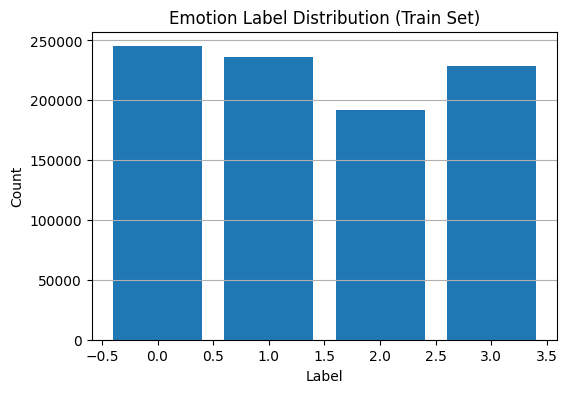

In [10]:
import numpy as np
import glob
import os
from collections import Counter
import matplotlib.pyplot as plt

# ÎùºÎ≤® Î∞∞Ïπò ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
label_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"
label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

# Ï†ÑÏ≤¥ ÎùºÎ≤® ÏàòÏßë
all_labels = []

for file in label_files:
    labels = np.load(file, allow_pickle=True)
    all_labels.extend(labels.tolist())

# ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏
label_counts = Counter(all_labels)
print("ÎùºÎ≤® Î∂ÑÌè¨:", label_counts)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Emotion Label Distribution (Train Set)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


# Í∞êÏ†ï ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÌôïÏù∏ ÏΩîÎìú

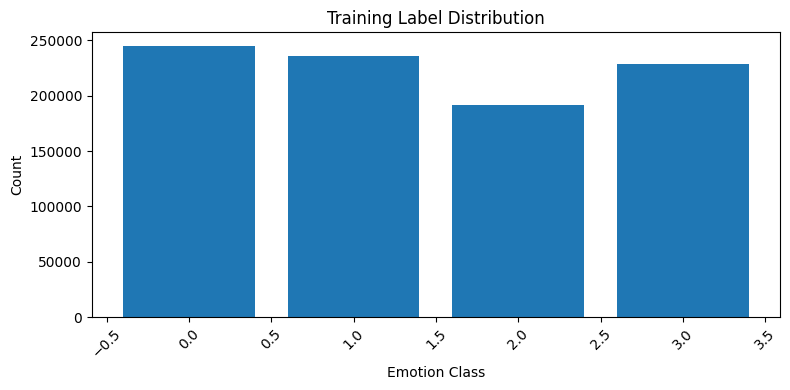

In [1]:
import os
import numpy as np
import glob
import matplotlib.pyplot as plt
from collections import Counter

# ÎùºÎ≤® Î∞∞Ïπò Í≤ΩÎ°ú
label_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"
label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

# Î™®Îì† ÎùºÎ≤® Î°úÎî©
all_labels = []
for file in label_files:
    labels = np.load(file, allow_pickle=True)
    all_labels.extend(labels)

# ÎùºÎ≤® Î∂ÑÌè¨ ÌôïÏù∏
label_counter = Counter(all_labels)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
plt.bar(label_counter.keys(), label_counter.values())
plt.title("Training Label Distribution")
plt.xlabel("Emotion Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- class_weight Ï†ÅÏö©

- Ï¶ùÍ∞ï Ïû¨Ï°∞Ï†ï

- ÎòêÎäî RandomUnderSampler, SMOTE Îì± ÎåÄÏïà Í≥†Î†§

## 1. class-weight Ï†ÅÏö©
- ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î¨∏Ï†úÎ•º ÏôÑÌôîÌïòÍ∏∞ ÏúÑÌï¥ Í∞Å ÌÅ¥ÎûòÏä§Ïóê Ïó≠ÎπÑÎ°Ä Í∞ÄÏ§ëÏπòÎ•º Ï†ÅÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏïÑÎûòÎäî Ï†ÑÏ≤¥ ÎùºÎ≤®ÏùÑ Î∂ÑÏÑùÌïòÍ≥† class_weightÏùÑ ÏûêÎèôÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî ÏΩîÎìú

In [2]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ï†ÑÏ≤¥ ÎùºÎ≤®ÏùÑ Ïà´ÏûêÎ°ú Ïù∏ÏΩîÎî©Ìïú Î¶¨Ïä§Ìä∏ÎùºÍ≥† Í∞ÄÏ†ï (Ïòà: [0, 1, 0, 2, 3, 1, ...])
all_labels_array = np.array(all_labels)

# Í≥†Ïú† ÌÅ¥ÎûòÏä§ Î™©Î°ù
classes = np.unique(all_labels_array)

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
weights = compute_class_weight(class_weight='balanced', classes=classes, y=all_labels_array)
class_weights = dict(zip(classes, weights))

print("Ï†ÅÏö©Ìï† class_weight:", class_weights)


Ï†ÅÏö©Ìï† class_weight: {0: 0.9201513463210355, 1: 0.9562384679009989, 2: 1.17415625, 3: 0.9844626107006236}


## 2. Î™®Îç∏ ÌïôÏäµ ÏΩîÎìú Í∞úÏÑ†
- ÏßÄÍ∏àÍπåÏßÄ Í∞úÏÑ†ÏÇ¨Ìï≠ÏùÑ Î∞òÏòÅÌïòÏó¨, Í∞Å ÏÖÄÏóê ÎßûÍ≤å Íµ¨ÏÑ±Ìï¥ÎìúÎ¶ΩÎãàÎã§. (class_weight Ï†ÅÏö© Ìè¨Ìï®)

### ÏÖÄ 1. ÌôòÍ≤Ω Î∞è Í≤ΩÎ°ú ÏÑ§Ï†ï

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, models
import glob
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

# GPU Î©îÎ™®Î¶¨ Ï†êÏßÑÏ†Å Ìï†Îãπ
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
BATCH_SIZE = 64
EPOCHS = 300
PATIENCE = 30

# Í≤ΩÎ°ú ÏÑ§Ï†ï
train_dir = "/media/usou/PortableSSD/mldl_project/data4class_batches"
val_dir = "/media/usou/PortableSSD/mldl_project/data4class_val_batches"
checkpoint_path = "/media/usou/PortableSSD/mldl_project/model_ckpt/best_model_voice_emotion_analysis.keras"


2025-04-03 23:59:16.882290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743692356.950121   44334 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743692356.973294   44334 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743692357.116733   44334 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743692357.116793   44334 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743692357.116796   44334 computation_placer.cc:177] computation placer alr

### ÏÖÄ 2. CNN Î™®Îç∏ Ï†ïÏùò

In [4]:
def build_cnn_model(input_shape=(40, 300, 1), num_classes=4):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn_model()


/home/usou/dev_ws/superbad/deeplearning-repo-3/dolbom_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-03 23:59:22.700145: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1743692362.700595   44334 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4738 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5


### ÏÖÄ 3. Îç∞Ïù¥ÌÑ∞ Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Î∞è ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞

In [5]:
def data_generator(mfcc_dir, label_dir, batch_size):
    mfcc_files = sorted(glob.glob(os.path.join(mfcc_dir, "mfcc_batch_*.npy")))
    label_files = sorted(glob.glob(os.path.join(label_dir, "label_batch_*.npy")))

    while True:
        for mfcc_file, label_file in zip(mfcc_files, label_files):
            x = np.load(mfcc_file)
            y = np.load(label_file, allow_pickle=True)

            min_len = min(len(x), len(y))
            x = x[:min_len][..., np.newaxis]
            y = y[:min_len]

            for i in range(0, min_len, batch_size):
                yield x[i:i+batch_size], y[i:i+batch_size]

# Ï†ÑÏ≤¥ ÎùºÎ≤®ÏùÑ Î™®ÏïÑÏÑú class_weight Í≥ÑÏÇ∞
all_labels = []
for f in glob.glob(os.path.join(train_dir, "label_batch_*.npy")):
    labels = np.load(f, allow_pickle=True)
    all_labels.extend(labels)

classes = np.unique(all_labels)
weights = compute_class_weight('balanced', classes=classes, y=all_labels)
class_weights = dict(zip(classes, weights))

print("Ï†ÅÏö©Ìï† ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò:", class_weights)


Ï†ÅÏö©Ìï† ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {0: 0.9201513463210355, 1: 0.9562384679009989, 2: 1.17415625, 3: 0.9844626107006236}


### ÏÖÄ 4. Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î°úÎî©

In [8]:
import glob
import os
import numpy as np

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ Î∞∞Ïπò ÌååÏùº Î™©Î°ù
val_mfcc_files = sorted(glob.glob(os.path.join(val_dir, "mfcc_val_batch_*.npy")))
val_label_files = sorted(glob.glob(os.path.join(val_dir, "label_val_batch_*.npy")))

# ÏµúÎåÄ Î°úÎî©Ìï† ÏÉòÌîå Ïàò Ï†úÌïú (Ïòà: 5000Í∞ú)
max_samples = 5000
loaded = 0

val_x_list, val_y_list = [], []

for mfcc_file, label_file in zip(val_mfcc_files, val_label_files):
    # Í∞Å Î∞∞Ïπò ÌååÏùº Î°úÎî©
    x = np.load(mfcc_file)[..., np.newaxis]  # (Î∞∞Ïπò, 40, 300, 1)
    y = np.load(label_file, allow_pickle=True)

    # ÎÇ®ÏùÄ Í∞úÏàò Í≥ÑÏÇ∞ ÌõÑ ÏùºÎ∂ÄÎßå ÏÇ¨Ïö© (Í≥ºÎèÑÌïú Î©îÎ™®Î¶¨ ÏÇ¨Ïö© Î∞©ÏßÄ)
    remaining = max_samples - loaded
    if len(x) > remaining:
        x = x[:remaining]
        y = y[:remaining]

    val_x_list.append(x)
    val_y_list.append(y)
    loaded += len(x)

    if loaded >= max_samples:
        break

# ÏµúÏ¢Ö Î∞∞Ïó¥Î°ú Î≥ëÌï©
val_x = np.concatenate(val_x_list, axis=0)
val_y = np.concatenate(val_y_list, axis=0)

print("Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ shape:", val_x.shape, val_y.shape)


Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ shape: (5000, 40, 300, 1) (5000,)


In [10]:
# Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Îß§Ìïë (Ïòà: Í∞êÏ†ï Î†àÏù¥Î∏îÏù¥ strÏù∏ Í≤ΩÏö∞)
if val_y.dtype.type is np.str_ or val_y.dtype.type is np.object_:
    unique_labels = sorted(set(val_y))
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    val_y = np.array([label_to_index[label] for label in val_y])


TypeError: '<' not supported between instances of 'str' and 'int'

In [9]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(val_y)
class_weights = dict(enumerate(compute_class_weight('balanced', classes=classes, y=val_y)))


TypeError: '<' not supported between instances of 'str' and 'int'

In [6]:
import numpy as np
import glob
import os
from sklearn.utils.class_weight import compute_class_weight

# Í≤ÄÏ¶ù ÎùºÎ≤® Î∞∞Ïπò ÌååÏùº Í≤ΩÎ°ú
val_label_files = sorted(glob.glob(os.path.join(val_dir, "label_val_batch_*.npy")))

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞Ïö© ÎùºÎ≤®Îßå Î©îÎ™®Î¶¨Ïóê Ï†êÏßÑÏ†ÅÏúºÎ°ú Î°úÎî©
val_labels = []

for label_file in val_label_files:
    y = np.load(label_file, allow_pickle=True)
    val_labels.extend(y)

val_y_raw = np.array(val_labels)

# Î¨∏ÏûêÏó¥ ÎùºÎ≤®Ïù¥Î©¥ Ïà´Ïûê Ïù∏Îç±Ïä§Î°ú Ïù∏ÏΩîÎî©
if val_y_raw.dtype.type is np.str_ or val_y_raw.dtype.type is np.object_:
    unique_labels = sorted(set(val_y_raw))
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    val_y = np.array([label_to_index[label] for label in val_y_raw])
else:
    val_y = val_y_raw.copy()

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
classes = np.unique(val_y)
class_weights = dict(enumerate(compute_class_weight(class_weight='balanced', classes=classes, y=val_y)))

# Í≤∞Í≥º Ï∂úÎ†•
print("ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò:", class_weights)


ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {0: 25.048666666666666, 1: 2.087388888888889, 2: 0.6288341889782888, 3: 0.8134664826391708, 4: 0.8491073446327684, 5: 0.6739672460492565}


In [22]:
import tensorflow as tf
import numpy as np
import glob
import os

def val_data_generator(val_mfcc_dir, val_label_dir, batch_size):
    """
    Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïπò Îã®ÏúÑÎ°ú Î∂àÎü¨Ïò§Îäî Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ìï®ÏàòÏûÖÎãàÎã§.
    - Î©îÎ™®Î¶¨ Ïù¥ÏäàÎ•º ÌîºÌïòÍ∏∞ ÏúÑÌï¥ Î∞∞Ïπò Îã®ÏúÑÎ°ú Î∂àÎü¨ÏòµÎãàÎã§.
    
    Parameters:
        val_mfcc_dir (str): MFCC Í≤ÄÏ¶ù Î∞∞Ïπò ÌååÏùº Í≤ΩÎ°ú
        val_label_dir (str): ÎùºÎ≤® Í≤ÄÏ¶ù Î∞∞Ïπò ÌååÏùº Í≤ΩÎ°ú
        batch_size (int): Î∞∞Ïπò ÌÅ¨Í∏∞

    Yields:
        Tuple[np.ndarray, np.ndarray]: (x_batch, y_batch)
    """
    mfcc_files = sorted(glob.glob(os.path.join(val_mfcc_dir, "mfcc_val_batch_*.npy")))
    label_files = sorted(glob.glob(os.path.join(val_label_dir, "label_val_batch_*.npy")))

    while True:
        for mfcc_file, label_file in zip(mfcc_files, label_files):
            x = np.load(mfcc_file)[..., np.newaxis]  # (batch, 40, 300, 1)
            y_raw = np.load(label_file, allow_pickle=True)

            # Î¨∏ÏûêÏó¥ Î†àÏù¥Î∏îÏù¥Î©¥ Ïà´ÏûêÎ°ú Î≥ÄÌôò
            if y_raw.dtype.type is np.str_ or y_raw.dtype.type is np.object_:
                unique_labels = sorted(set(y_raw))
                label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
                y = np.array([label_to_index[label] for label in y_raw])
            else:
                y = y_raw.copy()

            min_len = min(len(x), len(y))
            x = x[:min_len]
            y = y[:min_len]

            for i in range(0, min_len, batch_size):
                yield x[i:i+batch_size], y[i:i+batch_size]


In [23]:
# Í≤ÄÏ¶ù Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
val_generator = val_data_generator(val_dir, val_dir, BATCH_SIZE)


In [24]:
# Í≤ÄÏ¶ù Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
val_generator = val_data_generator(val_dir, val_dir, BATCH_SIZE)

# ÌïôÏäµ Ïä§ÌÖù Ïàò Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ ÌïôÏäµ ÏÉòÌîå Ïàò / Î∞∞Ïπò ÌÅ¨Í∏∞)
train_steps = sum([
    np.load(f).shape[0]
    for f in glob.glob(os.path.join(train_dir, "label_batch_*.npy"))
]) // BATCH_SIZE

# Í≤ÄÏ¶ù Ïä§ÌÖù Ïàò Í≥ÑÏÇ∞ (Ï†ÑÏ≤¥ Í≤ÄÏ¶ù ÏÉòÌîå Ïàò / Î∞∞Ïπò ÌÅ¨Í∏∞)
val_steps = sum([
    np.load(f, allow_pickle=True).shape[0]
    for f in glob.glob(os.path.join(val_dir, "label_val_batch_*.npy"))
]) // BATCH_SIZE

# ÏΩúÎ∞± Ï†ïÏùò
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=PATIENCE,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor='val_accuracy',
        save_best_only=True
    )
]

# Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ
history = model.fit(
    data_generator(train_dir, train_dir, BATCH_SIZE),  # ÌïôÏäµÏö© Ï†úÎÑàÎ†àÏù¥ÌÑ∞
    steps_per_epoch=train_steps,
    epochs=EPOCHS,
    validation_data=val_generator,                    # Í≤ÄÏ¶ùÏö© Ï†úÎÑàÎ†àÏù¥ÌÑ∞
    validation_steps=val_steps,
    callbacks=callbacks,
    class_weight=class_weights                        # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
)


ValueError: Argument `class_weight` is not supported for Python generator inputs. Received: class_weight={0: 25.048666666666666, 1: 2.087388888888889, 2: 0.6288341889782888, 3: 0.8134664826391708, 4: 0.8491073446327684, 5: 0.6739672460492565}

- Ïò§Î•òÏùò ÏõêÏù∏ÏùÄ class_weight Ïù∏ÏûêÎäî Python Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Í∏∞Î∞ò ÏûÖÎ†•Ïóê ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏

In [1]:
import os
import json
import pandas as pd

# ÏÑ§Ï†ï
json_dir = "/media/usou/PortableSSD/mldl_project/json_data"
output_csv_path = "./data/usou/metadata_4class.csv"
target_emotions = {"angry", "happy", "neutrality", "sad"}

data = []
for root, _, files in os.walk(json_dir):
    for fname in files:
        if fname.endswith(".json"):
            with open(os.path.join(root, fname), "r", encoding="utf-8") as f:
                content = json.load(f)
                if content["emotion"] in target_emotions:
                    data.append({"wav_path": content["wav_path"], "emotion": content["emotion"]})

df = pd.DataFrame(data)
df.to_csv(output_csv_path, index=False)
print(f"‚úÖ 4ÌÅ¥ÎûòÏä§ ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å: {len(df)}Í∞ú ‚Üí {output_csv_path}")


‚úÖ 4ÌÅ¥ÎûòÏä§ ÌïÑÌÑ∞ÎßÅ ÏôÑÎ£å: 0Í∞ú ‚Üí ./data/usou/metadata_4class.csv


## class_weight Ìö®Í≥ºÎ•º Î∞òÏòÅÌïú Îç∞Ïù¥ÌÑ∞ Ïò§Î≤ÑÏÉòÌîåÎßÅ ÏßÑÌñâ

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
from collections import Counter
from sklearn.utils import resample
from tqdm import tqdm

# 1. Í≤ΩÎ°ú ÏÑ§Ï†ï
csv_path = "./data/usou/metadata_4class.csv"
output_dir = "/media/usou/PortableSSD/mldl_project/data4class_oversampled_batches"
os.makedirs(output_dir, exist_ok=True)

# 2. MFCC ÏÑ§Ï†ï
n_mfcc = 40
max_len = 300
batch_size = 1000

# 3. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(csv_path)

# 4. ÌÅ¥ÎûòÏä§Î≥Ñ Î∂ÑÌè¨ ÌôïÏù∏
label_counts = df['emotion'].value_counts()
max_count = label_counts.max()

# 5. Ïò§Î≤ÑÏÉòÌîåÎßÅ ÏàòÌñâ
oversampled_df = pd.DataFrame()

for emotion, group in df.groupby('emotion'):
    # ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÏµúÎåÄ ÏàòÎßåÌÅº Ïò§Î≤ÑÏÉòÌîåÎßÅ
    group_oversampled = resample(group, replace=True, n_samples=max_count, random_state=42)
    oversampled_df = pd.concat([oversampled_df, group_oversampled])

# 6. MFCC Ï∂îÏ∂ú Ìï®Ïàò
def extract_mfcc(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len:
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

# 7. Î∞∞Ïπò Ï†ÄÏû•
mfcc_batch = []
label_batch = []
batch_index = 0

for _, row in tqdm(oversampled_df.iterrows(), total=len(oversampled_df), desc="Ïò§Î≤ÑÏÉòÌîåÎßÅÎêú MFCC Ï∂îÏ∂ú"):
    try:
        y, sr = librosa.load(row["wav_path"], sr=16000)
        mfcc = extract_mfcc(y, sr)
        mfcc_batch.append(mfcc)
        label_batch.append(row["emotion"])

        if len(mfcc_batch) >= batch_size:
            np.save(os.path.join(output_dir, f"mfcc_batch_{batch_index}.npy"), np.array(mfcc_batch))
            np.save(os.path.join(output_dir, f"label_batch_{batch_index}.npy"), np.array(label_batch, dtype=object))
            print(f"Î∞∞Ïπò {batch_index} Ï†ÄÏû• ÏôÑÎ£å - {len(mfcc_batch)}Í∞ú")
            batch_index += 1
            mfcc_batch.clear()
            label_batch.clear()

    except Exception as e:
        print(f"Ïò§Î•ò: {row['wav_path']} ‚Üí {e}")
        continue

# 8. ÎßàÏßÄÎßâ Î∞∞Ïπò Ï†ÄÏû•
if mfcc_batch:
    np.save(os.path.join(output_dir, f"mfcc_batch_{batch_index}.npy"), np.array(mfcc_batch))
    np.save(os.path.join(output_dir, f"label_batch_{batch_index}.npy"), np.array(label_batch, dtype=object))
    print(f"ÎßàÏßÄÎßâ Î∞∞Ïπò {batch_index} Ï†ÄÏû• ÏôÑÎ£å - {len(mfcc_batch)}Í∞ú")

print("Ïò§Î≤ÑÏÉòÌîåÎßÅ Í∏∞Î∞ò MFCC Ï∂îÏ∂ú ÏôÑÎ£å")


/tmp/ipykernel_5428/2753053002.py:20: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
Ïò§Î≤ÑÏÉòÌîåÎßÅÎêú MFCC Ï∂îÏ∂ú:   0%|          | 12/326668 [00:01<12:16:51,  7.39it/s]


KeyboardInterrupt: 

# ÎùºÎ≤® Ïù∏ÏΩîÎî©

In [2]:
import os
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from glob import glob
from tqdm import tqdm

# 1. Í≤ΩÎ°ú ÏÑ§Ï†ï
label_path = "/media/usou/PortableSSD/mldl_project/data4class_oversampled_batches/label_batch_*.npy"
save_dir = "/media/usou/PortableSSD/mldl_project/models"
os.makedirs(save_dir, exist_ok=True)

# 2. Ï†ÑÏ≤¥ ÎùºÎ≤® ÏàòÏßë
all_labels = []
for label_file in tqdm(sorted(glob(label_path)), desc="Ï†ÑÏ≤¥ ÎùºÎ≤® Î°úÎî©"):
    labels = np.load(label_file, allow_pickle=True)
    all_labels.extend(labels)

# 3. ÎùºÎ≤® Ïù∏ÏΩîÎçî ÌïôÏäµ Î∞è Ï†ÄÏû•
le = LabelEncoder()
le.fit(all_labels)

encoder_path = os.path.join(save_dir, "label_encoder_4class.pkl")
with open(encoder_path, "wb") as f:
    pickle.dump(le, f)

print("‚úÖ LabelEncoder ÌïôÏäµ Î∞è Ï†ÄÏû• ÏôÑÎ£å:", encoder_path)
print("ÌÅ¥ÎûòÏä§ Î™©Î°ù:", le.classes_)


Ï†ÑÏ≤¥ ÎùºÎ≤® Î°úÎî©:   0%|          | 0/327 [00:00<?, ?it/s]

Ï†ÑÏ≤¥ ÎùºÎ≤® Î°úÎî©: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 327/327 [00:01<00:00, 321.24it/s]


‚úÖ LabelEncoder ÌïôÏäµ Î∞è Ï†ÄÏû• ÏôÑÎ£å: /media/usou/PortableSSD/mldl_project/models/label_encoder_4class.pkl
ÌÅ¥ÎûòÏä§ Î™©Î°ù: ['Angry' 'Happy' 'Neutrality' 'Sad']


## Î∞∞Ïπò Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï†ïÏùò 

In [3]:
import numpy as np
import os
import pickle
from tensorflow.keras.utils import Sequence

class MFCCBatchGenerator(Sequence):
    def __init__(self, data_dir, encoder_path, batch_size=32, shuffle=True):
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.shuffle = shuffle

        # ÌååÏùº Î™©Î°ù
        self.mfcc_files = sorted([f for f in os.listdir(data_dir) if f.startswith("mfcc_batch_")])
        self.label_files = sorted([f for f in os.listdir(data_dir) if f.startswith("label_batch_")])
        self.indexes = np.arange(len(self.mfcc_files))

        # ÎùºÎ≤® Ïù∏ÏΩîÎçî Î°úÎìú
        with open(encoder_path, "rb") as f:
            self.encoder = pickle.load(f)

        if shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return len(self.mfcc_files)

    def __getitem__(self, idx):
        i = self.indexes[idx]
        mfcc_path = os.path.join(self.data_dir, self.mfcc_files[i])
        label_path = os.path.join(self.data_dir, self.label_files[i])

        X = np.load(mfcc_path)
        y = np.load(label_path, allow_pickle=True)
        y_encoded = self.encoder.transform(y)

        return X[..., np.newaxis], y_encoded

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)


2025-04-04 17:24:28.947118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743755068.995799    5428 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743755069.009420    5428 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743755069.127231    5428 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743755069.127250    5428 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743755069.127251    5428 computation_placer.cc:177] computation placer alr

: 

## Î™®Îç∏ Íµ¨Ï°∞ Ï∂îÏ≤ú (ÏÑ±Îä• Ï¢ãÏùÄ CNN Í∏∞Î∞ò)
- Í∏∞Ï°¥Î≥¥Îã§ Ï°∞Í∏à Îçî ÍπäÍ≥†, BatchNormalization, Dropout Îì±ÏùÑ ÎÑ£Ïñ¥ÏÑú ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Îäî Íµ¨Ï°∞ÏûÖÎãàÎã§.

- Ïª§ÎÑê Í≥ºÎ∂ÄÌïòÎ•º ÎßâÍ∏∞ ÏúÑÌï¥ ÌååÎùºÎØ∏ÌÑ∞ ÏàòÎ•º 100Îßå Ïù¥ÌïòÎ°ú Ï†úÌïúÌñàÏäµÎãàÎã§.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_cnn_model(input_shape=(40, 300, 1), num_classes=4):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


# ÌïôÏäµ 

In [20]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pickle

# Í≤ΩÎ°ú ÏÑ§Ï†ï
train_data_dir = "/media/usou/PortableSSD/mldl_project/data4class_oversampled_batches"
model_save_path = "./ai/models/voice_emotion_model_4class.keras"
history_save_path = "./ai/models/history_4class.pkl"

# Î∞∞Ïπò Ï†úÎÑàÎ†àÏù¥ÌÑ∞ ÏÉùÏÑ±
train_generator = MFCCBatchGenerator(data_dir=train_data_dir, batch_size=64, shuffle=True)

# Î™®Îç∏ ÎπåÎìú
model = build_cnn_model(input_shape=(40, 300, 1), num_classes=4)

# ÏΩúÎ∞± ÏÑ§Ï†ï
callbacks = [
    EarlyStopping(monitor='loss', patience=60, restore_best_weights=True, verbose=1),
    ModelCheckpoint(model_save_path, monitor='loss', save_best_only=True, verbose=1)
]

# ÌïôÏäµ
history = model.fit(
    train_generator,
    epochs=300,
    callbacks=callbacks,
    verbose=1
)

# ÌïôÏäµ Ïù¥Î†• Ï†ÄÏû•
with open(history_save_path, "wb") as f:
    pickle.dump(history.history, f)

print("‚úÖ ÌïôÏäµ ÏôÑÎ£å Î∞è Î™®Îç∏/Ïù¥Î†• Ï†ÄÏû• ÏôÑÎ£å")


TypeError: MFCCBatchGenerator.__init__() missing 1 required positional argument: 'encoder_path'

# Îã§Ïãú ÏãúÏûë 
# JSON -> DataFrame Î≥ÄÌôò(4Í∞ú Í∞êÏ†ïÎßå ÌïÑÌÑ∞ÎßÅ)

In [2]:
import os
import json
import pandas as pd
from tqdm import tqdm

# ÏÇ¨Ïö©Ìï† Í∞êÏ†ï 4Ï¢Ö
target_emotions = {"neutral", "angry", "happy", "sad"}

# JSON Î∞è WAV ÏµúÏÉÅÏúÑ Í≤ΩÎ°ú
label_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞/"
wav_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/1.Training/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/"

# Í≤∞Í≥º Ï†ÄÏû• Í≤ΩÎ°ú: Ïô∏Ïû• ÌïòÎìú mldl_4class Ìè¥Îçî
save_dir = "/media/usou/PortableSSD/mldl_4class"
os.makedirs(save_dir, exist_ok=True)

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Î¶¨Ïä§Ìä∏
data = []
broken_files = []

# JSON ÌÉêÏÉâ Î∞è Ï≤òÎ¶¨
for folder_path, _, files in tqdm(os.walk(label_root), desc="JSON ÌååÏùº ÌÉêÏÉâ"):
    for file_name in files:
        if file_name.endswith(".json"):
            json_path = os.path.join(folder_path, file_name)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    content = json.load(f)

                emotion = content["ÌôîÏûêÏ†ïÎ≥¥"]["Emotion"]
                if emotion.lower() not in target_emotions:
                    continue

                style = content["ÌôîÏûêÏ†ïÎ≥¥"].get("SpeechStyle", "N/A")
                sensitivity = content["ÌôîÏûêÏ†ïÎ≥¥"].get("Sensitivity", "N/A")
                wav_file = content["ÌååÏùºÏ†ïÎ≥¥"]["FileName"]

                relative_path = os.path.relpath(folder_path, start=label_root).replace("TL", "TS")
                wav_path = os.path.join(wav_root, relative_path, wav_file)

                if os.path.exists(wav_path):
                    data.append({
                        "wav_path": wav_path,
                        "emotion": emotion.lower(),
                        "style": style,
                        "sensitivity": sensitivity
                    })
                else:
                    print(f"[WAV ÏóÜÏùå] {wav_path}")
                    broken_files.append(wav_path)

            except Exception as e:
                print(f"[JSON Ïò§Î•ò] {json_path}: {e}")
                broken_files.append(json_path)

# DataFrame Ï†ÄÏû•
df = pd.DataFrame(data)
df.to_csv(os.path.join(save_dir, "metadata_cleaned.csv"), index=False)

# Ïò§Î•ò Î°úÍ∑∏ Ï†ÄÏû•
with open(os.path.join(save_dir, "broken_files.txt"), "w") as f:
    for path in broken_files:
        f.write(path + "\n")

print(f"‚úÖ Ï†ïÏÉÅ Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"‚ö†Ô∏è Ïò§Î•ò Ïàò: {len(broken_files)}")


JSON ÌååÏùº ÌÉêÏÉâ: 449it [02:39,  2.82it/s]


‚úÖ Ï†ïÏÉÅ Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ Ïàò: 236584
‚ö†Ô∏è Ïò§Î•ò Ïàò: 0


# MFCC Ï∂îÏ∂ú

In [3]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict

# ============================
# 1. Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌÅ¥ÎûòÏä§ Í∑†Ìòï ÎßûÏ∂§
# ============================
csv_path = "/media/usou/PortableSSD/mldl_4class/metadata_cleaned.csv"
df = pd.read_csv(csv_path)

# ÌÅ¥ÎûòÏä§Î≥Ñ Í∞úÏàò ÌååÏïÖ
min_class_count = df['emotion'].value_counts().min()

# ÌÅ¥ÎûòÏä§Î≥Ñ Í∑†Ìòï ÎßûÏ∂§
balanced_df = df.groupby('emotion', group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42)).reset_index(drop=True)

print("Í∞Å ÌÅ¥ÎûòÏä§ Í∑†Ìòï ÏÉòÌîå Ïàò:", min_class_count)

# ============================
# 2. ÏÑ§Ï†ïÍ∞í Ï†ïÏùò
# ============================
sample_rate = 16000
max_duration = 5.0
save_interval = 10000

# Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
save_dir = "/media/usou/PortableSSD/mldl_4class/mfcc_batches"
os.makedirs(save_dir, exist_ok=True)

# ============================
# 3. MFCC Ï∂îÏ∂ú Î£®ÌîÑ (Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ïä§ÌÉÄÏùº)
# ============================
mfcc_features = []
labels = []
error_files = []
save_counter = 0

for idx, row in tqdm(balanced_df.iterrows(), total=len(balanced_df), desc="MFCC Ï∂îÏ∂ú Ï§ë"):
    wav_path = row["wav_path"]
    try:
        y, sr = librosa.load(wav_path, sr=sample_rate, duration=max_duration)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_features.append(mfcc.T)
        labels.append(row["emotion"])
    except Exception as e:
        print(f"Error processing {wav_path}: {e}")
        error_files.append(wav_path)

    if len(mfcc_features) >= save_interval:
        np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
        np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))
        save_counter += 1
        mfcc_features = []
        labels = []

# ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
if mfcc_features:
    np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
    np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))

# ============================
# 4. ÏóêÎü¨ Î°úÍ∑∏ Ï†ÄÏû•
# ============================
error_path = "/media/usou/PortableSSD/mldl_4class/broken_audio_files.txt"
with open(error_path, "w") as f:
    for path in error_files:
        f.write(path + "\n")

# ============================
# 5. ÏöîÏïΩ Ï∂úÎ†•
# ============================
print(f"‚úÖ Ï†ÄÏû•Îêú MFCC Î∞∞Ïπò Ïàò: {save_counter + 1}")
print(f"‚ö†Ô∏è Ïã§Ìå®Ìïú ÌååÏùº Ïàò: {len(error_files)}")


/tmp/ipykernel_5551/4277833996.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)
/tmp/ipykernel_5551/4277833996.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('emotion', group_keys=False).apply(lambda x: x.sample(min_class_count, random_state=42)).reset_index(drop=True)


Í∞Å ÌÅ¥ÎûòÏä§ Í∑†Ìòï ÏÉòÌîå Ïàò: 76332


MFCC Ï∂îÏ∂ú Ï§ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 228996/228996 [44:48<00:00, 85.17it/s] 

‚úÖ Ï†ÄÏû•Îêú MFCC Î∞∞Ïπò Ïàò: 23
‚ö†Ô∏è Ïã§Ìå®Ìïú ÌååÏùº Ïàò: 0


# Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©(Train Îç∞Ïù¥ÌÑ∞)

In [7]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle
from tqdm import tqdm

# ===============================
# 1. Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú
# ===============================
csv_path = "/media/usou/PortableSSD/mldl_4class/metadata_cleaned.csv"
df = pd.read_csv(csv_path)

# ===============================
# 2. Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©
# ===============================
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df["emotion"])  # 'happy' ‚Üí 0, ...

# ===============================
# 3. Ïù∏ÏΩîÎçî Ï†ÄÏû• (ÎÇòÏ§ëÏóê Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©)
# ===============================
encoder_path = "./label_encoder.pkl"  # ÌòÑÏû¨ ÏΩîÎìú Ìè¥ÎçîÏóê Ï†ÄÏû•
with open(encoder_path, "wb") as f:
    pickle.dump(encoder, f)

# ===============================
# 4. ÎùºÎ≤®ÏùÑ MFCC Î∞∞Ïπò Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÎ¶¨ Ï†ÄÏû•
# ===============================

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò MFCC Î∞∞Ïπò Ïàò ÌôïÏù∏
mfcc_dir = "/media/usou/PortableSSD/mldl_4class/mfcc_batches"
mfcc_batches = sorted([f for f in os.listdir(mfcc_dir) if f.startswith("mfcc_batch")])
label_save_dir = os.path.join(mfcc_dir, "encoded_labels")
os.makedirs(label_save_dir, exist_ok=True)

start_idx = 0
for i, batch_name in enumerate(mfcc_batches):
    mfcc_path = os.path.join(mfcc_dir, batch_name)
    batch_mfcc = np.load(mfcc_path, allow_pickle=True)
    end_idx = start_idx + len(batch_mfcc)
    batch_labels = encoded_labels[start_idx:end_idx]
    
    # Ï†ÄÏû•
    np.save(os.path.join(label_save_dir, f"label_batch_{i}.npy"), batch_labels)
    start_idx = end_idx

print("‚úÖ Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ï†ÄÏû•")
print("üì¶ Ï†ÄÏû• Í≤ΩÎ°ú:", label_save_dir)


/tmp/ipykernel_5551/2700387088.py:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


‚úÖ Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ï†ÄÏû•
üì¶ Ï†ÄÏû• Í≤ΩÎ°ú: /media/usou/PortableSSD/mldl_4class/mfcc_batches/encoded_labels


## Validation Ï†ÑÏ≤òÎ¶¨ (Train Í≥º ÎèôÏùº)

In [5]:
import os
import json
import pandas as pd
from tqdm import tqdm

# ========================================
# 1. Í≤ΩÎ°ú ÏÑ§Ï†ï
# ========================================

label_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÎùºÎ≤®ÎßÅÎç∞Ïù¥ÌÑ∞/VL1"
wav_root = "/media/usou/PortableSSD/mldl/015.Í∞êÏÑ± Î∞è Î∞úÌôî Ïä§ÌÉÄÏùºÎ≥Ñ ÏùåÏÑ±Ìï©ÏÑ± Îç∞Ïù¥ÌÑ∞/01.Îç∞Ïù¥ÌÑ∞/2.Validation/ÏõêÏ≤úÎç∞Ïù¥ÌÑ∞/VS1"
save_dir = "/media/usou/PortableSSD/mldl_4class/validation"
os.makedirs(save_dir, exist_ok=True)

# ========================================
# 2. ÌïÑÌÑ∞ÎßÅ Í∞êÏ†ï Ï†ïÏùò Î∞è Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
# ========================================

target_emotions = {"neutral", "angry", "happy", "sad"}
data = []
broken_files = []

# ========================================
# 3. JSON ÌÉêÏÉâ Î∞è ÌïÑÌÑ∞ÎßÅ Ï≤òÎ¶¨
# ========================================

for folder_path, _, files in tqdm(os.walk(label_root), desc="Validation JSON ÌÉêÏÉâ"):
    for file_name in files:
        if file_name.endswith(".json"):
            json_path = os.path.join(folder_path, file_name)
            try:
                with open(json_path, 'r', encoding='utf-8') as f:
                    content = json.load(f)

                emotion = content["ÌôîÏûêÏ†ïÎ≥¥"]["Emotion"].lower()
                if emotion not in target_emotions:
                    continue

                style = content["ÌôîÏûêÏ†ïÎ≥¥"].get("SpeechStyle", "N/A")
                sensitivity = content["ÌôîÏûêÏ†ïÎ≥¥"].get("Sensitivity", "N/A")
                wav_file = content["ÌååÏùºÏ†ïÎ≥¥"]["FileName"]

                relative_path = os.path.relpath(folder_path, start=label_root)
                wav_path = os.path.join(wav_root, relative_path, wav_file)

                if os.path.exists(wav_path):
                    data.append({
                        "wav_path": wav_path,
                        "emotion": emotion,
                        "style": style,
                        "sensitivity": sensitivity
                    })
                else:
                    print(f"WAV ÌååÏùº ÏóÜÏùå: {wav_path}")
                    broken_files.append(wav_path)

            except Exception as e:
                print(f"JSON ÏùΩÍ∏∞ Ïò§Î•ò: {json_path}, ÏóêÎü¨: {e}")
                broken_files.append(json_path)

# ========================================
# 4. Í≤∞Í≥º Ï†ÄÏû•
# ========================================

df = pd.DataFrame(data)
df.to_csv(os.path.join(save_dir, "metadata_cleaned_val.csv"), index=False)

with open(os.path.join(save_dir, "broken_val_files.txt"), "w") as f:
    for path in broken_files:
        f.write(path + "\n")

print(f"‚úÖ Validation Îç∞Ïù¥ÌÑ∞ Ïàò: {len(df)}")
print(f"‚ö†Ô∏è Ïò§Î•ò ÌååÏùº Ïàò: {len(broken_files)}")


Validation JSON ÌÉêÏÉâ: 0it [00:00, ?it/s]

Validation JSON ÌÉêÏÉâ: 88it [00:05, 15.21it/s]


‚úÖ Validation Îç∞Ïù¥ÌÑ∞ Ïàò: 36207
‚ö†Ô∏è Ïò§Î•ò ÌååÏùº Ïàò: 0


## MFCC Ï∂îÏ∂ú (ValidationÏö©, ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Ï°∞Ï†ï ÏóÜÏù¥ Ï†ÑÏ≤¥ Ï∂îÏ∂ú)

In [6]:
import os
import librosa
import pandas as pd
import numpy as np
from tqdm import tqdm

# ========================================
# 1. Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú
# ========================================

csv_path = "/media/usou/PortableSSD/mldl_4class/validation/metadata_cleaned_val.csv"
df = pd.read_csv(csv_path)

# ========================================
# 2. ÏÑ§Ï†ïÍ∞í Ï†ïÏùò
# ========================================

sample_rate = 16000
max_duration = 5.0
save_interval = 10000

# Ï†ÄÏû• ÎîîÎ†âÌÜ†Î¶¨
save_dir = "/media/usou/PortableSSD/mldl_4class/validation/mfcc_batches"
os.makedirs(save_dir, exist_ok=True)

# ========================================
# 3. MFCC Ï∂îÏ∂ú Î£®ÌîÑ (Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Î∞©Ïãù)
# ========================================

mfcc_features = []
labels = []
error_files = []
save_counter = 0

for idx, row in tqdm(df.iterrows(), total=len(df), desc="MFCC Ï∂îÏ∂ú Ï§ë (Validation)"):
    wav_path = row["wav_path"]
    try:
        y, sr = librosa.load(wav_path, sr=sample_rate, duration=max_duration)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_features.append(mfcc.T)
        labels.append(row["emotion"])
    except Exception as e:
        print(f"Error processing {wav_path}: {e}")
        error_files.append(wav_path)

    if len(mfcc_features) >= save_interval:
        np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
        np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))
        save_counter += 1
        mfcc_features = []
        labels = []

# ÎÇ®ÏùÄ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû•
if mfcc_features:
    np.save(os.path.join(save_dir, f"mfcc_batch_{save_counter}.npy"), np.array(mfcc_features, dtype=object))
    np.save(os.path.join(save_dir, f"label_batch_{save_counter}.npy"), np.array(labels))

# ========================================
# 4. ÏóêÎü¨ Î°úÍ∑∏ Ï†ÄÏû•
# ========================================

with open("/media/usou/PortableSSD/mldl_4class/validation/broken_audio_val.txt", "w") as f:
    for path in error_files:
        f.write(path + "\n")

# ========================================
# 5. Í≤∞Í≥º Ï∂úÎ†•
# ========================================

print(f"‚úÖ Ï†ÄÏû•Îêú MFCC Î∞∞Ïπò Ïàò: {save_counter + 1}")
print(f"‚ö†Ô∏è Ïã§Ìå®Ìïú ÌååÏùº Ïàò: {len(error_files)}")


MFCC Ï∂îÏ∂ú Ï§ë (Validation): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 36207/36207 [10:14<00:00, 58.88it/s]


‚úÖ Ï†ÄÏû•Îêú MFCC Î∞∞Ïπò Ïàò: 4
‚ö†Ô∏è Ïã§Ìå®Ìïú ÌååÏùº Ïàò: 0


# Validation Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© (ÌïôÏäµÏö© Ïù∏ÏΩîÎçî Ïû¨ÏÇ¨Ïö©)

In [8]:
import os
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

# ========================================
# 1. LabelEncoder Î°úÎìú
# ========================================
encoder_path = "./label_encoder.pkl"  # Train 3Î≤à ÏÖÄÏóêÏÑú Ï†ÄÏû•Ìïú Ïù∏ÏΩîÎçî
with open(encoder_path, "rb") as f:
    encoder = pickle.load(f)

# ========================================
# 2. Validation Î©îÌÉÄÎç∞Ïù¥ÌÑ∞ Î°úÎìú
# ========================================
csv_path = "/media/usou/PortableSSD/mldl_4class/validation/metadata_cleaned_val.csv"
df = pd.read_csv(csv_path)

# ========================================
# 3. Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Ï†ÅÏö©
# ========================================
encoded_labels = encoder.transform(df["emotion"])

# ========================================
# 4. MFCC Î∞∞Ïπò Í∏∞Ï§ÄÏúºÎ°ú ÎùºÎ≤® Î∂ÑÎ¶¨ Ï†ÄÏû•
# ========================================
mfcc_dir = "/media/usou/PortableSSD/mldl_4class/validation/mfcc_batches"
mfcc_batches = sorted([f for f in os.listdir(mfcc_dir) if f.startswith("mfcc_batch")])
label_save_dir = os.path.join(mfcc_dir, "encoded_labels")
os.makedirs(label_save_dir, exist_ok=True)

start_idx = 0
for i, batch_name in enumerate(mfcc_batches):
    mfcc_path = os.path.join(mfcc_dir, batch_name)
    batch_mfcc = np.load(mfcc_path, allow_pickle=True)
    end_idx = start_idx + len(batch_mfcc)
    batch_labels = encoded_labels[start_idx:end_idx]
    
    # Ï†ÄÏû•
    np.save(os.path.join(label_save_dir, f"label_batch_{i}.npy"), batch_labels)
    start_idx = end_idx

print("‚úÖ Validation ÎùºÎ≤® Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ï†ÄÏû•")
print("üì¶ Ï†ÄÏû• Í≤ΩÎ°ú:", label_save_dir)


‚úÖ Validation ÎùºÎ≤® Ïù∏ÏΩîÎî© ÏôÑÎ£å Î∞è Ï†ÄÏû•
üì¶ Ï†ÄÏû• Í≤ΩÎ°ú: /media/usou/PortableSSD/mldl_4class/validation/mfcc_batches/encoded_labels


## CNN Î™®Îç∏ Ï†ïÏùò (TensorFlow)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# GPU Î©îÎ™®Î¶¨ Ï†êÏßÑ Ìï†Îãπ
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

def build_cnn_model(input_shape=(40, 100, 1), num_classes=4):  # ‚Üê Ï§ÑÏù∏ ÏûÖÎ†•
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Î™®Îç∏ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
model = build_cnn_model(input_shape=(40, 100, 1), num_classes=4)
model.summary()


2025-04-04 22:04:02.463416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743771842.481758   21737 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743771842.487580   21737 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743771842.501105   21737 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743771842.501129   21737 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743771842.501130   21737 computation_placer.cc:177] computation placer alr

Model: "sequential"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d (Conv2D)                 ‚îÇ (None, 40, 100, 32)    ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization             ‚îÇ (None, 40, 100, 32)    ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d (MaxPooling2D)    ‚îÇ (None, 20, 50, 32)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_1 (Conv2D)               ‚îÇ (None, 20, 50, 64)     ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 20, 50, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_1 (MaxPooling2D)  ‚îÇ (None, 10, 25, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 10, 25, 128)    ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2           ‚îÇ (None, 10, 25, 128)    ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 5, 12, 128)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten (Flatten)               ‚îÇ (None, 7680)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                   ‚îÇ (None, 128)           

 Total params: 1,077,252 (4.11 MB)

 Trainable params: 1,076,804 (4.11 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
import os
import numpy as np
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import Sequence

# =============================
# 1. Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï†ïÏùò (ÏÉòÌîå Í∞úÏàò ÎßûÏ∂§ Ï≤òÎ¶¨ Ìè¨Ìï®)
# =============================
class MFCCGenerator(Sequence):
    def __init__(self, mfcc_dir, label_dir, batch_size=32):
        self.mfcc_paths = sorted([os.path.join(mfcc_dir, f) for f in os.listdir(mfcc_dir) if f.startswith("mfcc_batch")])
        self.label_paths = sorted([os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.startswith("label_batch")])
        self.batch_size = batch_size

    def __len__(self):
        return len(self.mfcc_paths)

    def __getitem__(self, idx):
        x = np.load(self.mfcc_paths[idx], allow_pickle=True)
        y = np.load(self.label_paths[idx])

        # Ïò§Î•ò Î∞©ÏßÄ: Í∏∏Ïù¥ ÎßûÏ∂§
        min_len = min(len(x), len(y))
        x = x[:min_len]
        y = y[:min_len]

        # Padding & Shape Î≥ÄÌôò
        x = np.stack([
            np.pad(sample, ((0, max(0, 40 - sample.shape[0])), (0, 0)), mode='constant')[:40]
            for sample in x
        ])
        x = np.transpose(x, (0, 2, 1))            # (batch, 13, 40)
        x = x[..., np.newaxis]                    # (batch, 13, 40, 1)
        x = np.transpose(x, (0, 2, 1, 3))         # ‚Üí (batch, 40, 13, 1)
        return x, y

# =============================
# 2. Í≤ΩÎ°ú ÏÑ§Ï†ï
# =============================
train_mfcc_dir = "/media/usou/PortableSSD/mldl_4class/mfcc_batches"
train_label_dir = os.path.join(train_mfcc_dir, "encoded_labels")

val_mfcc_dir = "/media/usou/PortableSSD/mldl_4class/validation/mfcc_batches"
val_label_dir = os.path.join(val_mfcc_dir, "encoded_labels")

# =============================
# 3. Ï†úÎÑàÎ†àÏù¥ÌÑ∞ Ï§ÄÎπÑ
# =============================
train_gen = MFCCGenerator(train_mfcc_dir, train_label_dir, batch_size=32)
val_gen = MFCCGenerator(val_mfcc_dir, val_label_dir, batch_size=32)

# =============================
# 4. Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ (4Î≤à ÏÖÄÏóêÏÑú Ï†ïÏùòÎêú Ìï®Ïàò ÏÇ¨Ïö©)
# =============================
model = build_cnn_model(input_shape=(40, 13, 1), num_classes=4)

# =============================
# 5. ÏΩúÎ∞± ÏÑ§Ï†ï
# =============================
callbacks = [
    EarlyStopping(patience=30, restore_best_weights=True, monitor='val_loss'),
    ModelCheckpoint("voice_emotion_analyze.h5", save_best_only=True, monitor='val_loss')
]

# =============================
# 6. ÌïôÏäµ Ïã§Ìñâ
# =============================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=300,
    callbacks=callbacks
)

# =============================
# 7. ÌïôÏäµ Í∏∞Î°ù Ï†ÄÏû• (.pkl)
# =============================
with open("voice_emotion_analyze_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

print("‚úÖ ÌïôÏäµ ÏôÑÎ£å Î∞è Ï†ÄÏû•Îê®")


Epoch 1/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4s/step - accuracy: 0.2027 - loss: 3.1182

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 106s 4s/step - accuracy: 0.2051 - loss: 3.0772 - val_accuracy: 0.3149 - val_loss: 1.2610
Epoch 2/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 107s 5s/step - accuracy: 0.3663 - loss: 1.1645 - val_accuracy: 0.3414 - val_loss: 1.3809
Epoch 3/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5s/step - accuracy: 0.3615 - loss: 1.1496

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 111s 5s/step - accuracy: 0.3599 - loss: 1.1505 - val_accuracy: 0.3349 - val_loss: 1.1638
Epoch 4/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5s/step - accuracy: 0.3368 - loss: 1.1462

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 126s 5s/step - accuracy: 0.3373 - loss: 1.1459 - val_accuracy: 0.2621 - val_loss: 1.1333
Epoch 5/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 132s 6s/step - accuracy: 0.3099 - loss: 1.1686 - val_accuracy: 0.2642 - val_loss: 1.1390
Epoch 6/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5s/step - accuracy: 0.4517 - loss: 1.1090

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 124s 5s/step - accuracy: 0.4465 - loss: 1.1123 - val_accuracy: 0.3261 - val_loss: 1.1330
Epoch 7/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4s/step - accuracy: 0.2651 - loss: 1.1654

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 101s 4s/step - accuracy: 0.2664 - loss: 1.1652 - val_accuracy: 0.2822 - val_loss: 1.1324
Epoch 8/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4s/step - accuracy: 0.3532 - loss: 1.1339

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3524 - loss: 1.1342 - val_accuracy: 0.2450 - val_loss: 1.1249
Epoch 9/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3006 - loss: 1.1394 - val_accuracy: 0.3115 - val_loss: 1.1345
Epoch 10/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.4110 - loss: 1.0952 - val_accuracy: 0.1949 - val_loss: 1.1297
Epoch 11/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3814 - loss: 1.1115 - val_accuracy: 0.1884 - val_loss: 1.1356
Epoch 12/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3903 - loss: 1.1074 - val_accuracy: 0.2793 - val_loss: 1.1410
Epoch 13/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 103s 4s/step - accuracy: 0.3617 - loss: 1.1145 - val_accuracy: 0.2570 - val_loss: 1.1457


23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 105s 5s/step - accuracy: 0.3656 - loss: 1.1376 - val_accuracy: 0.2433 - val_loss: 1.1226
Epoch 15/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4s/step - accuracy: 0.3630 - loss: 1.1103

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3618 - loss: 1.1107 - val_accuracy: 0.3411 - val_loss: 1.1187
Epoch 16/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3613 - loss: 1.1172 - val_accuracy: 0.3214 - val_loss: 1.1275
Epoch 17/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3556 - loss: 1.1164 - val_accuracy: 0.3163 - val_loss: 1.1356
Epoch 18/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 103s 4s/step - accuracy: 0.3601 - loss: 1.1171 - val_accuracy: 0.2519 - val_loss: 1.1342
Epoch 19/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 103s 4s/step - accuracy: 0.3586 - loss: 1.1072 - val_accuracy: 0.3008 - val_loss: 1.1405
Epoch 20/300
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 102s 4s/step - accuracy: 0.3168 - loss: 1.1444 - val_accuracy: 0.2285 - val_loss: 1.1235

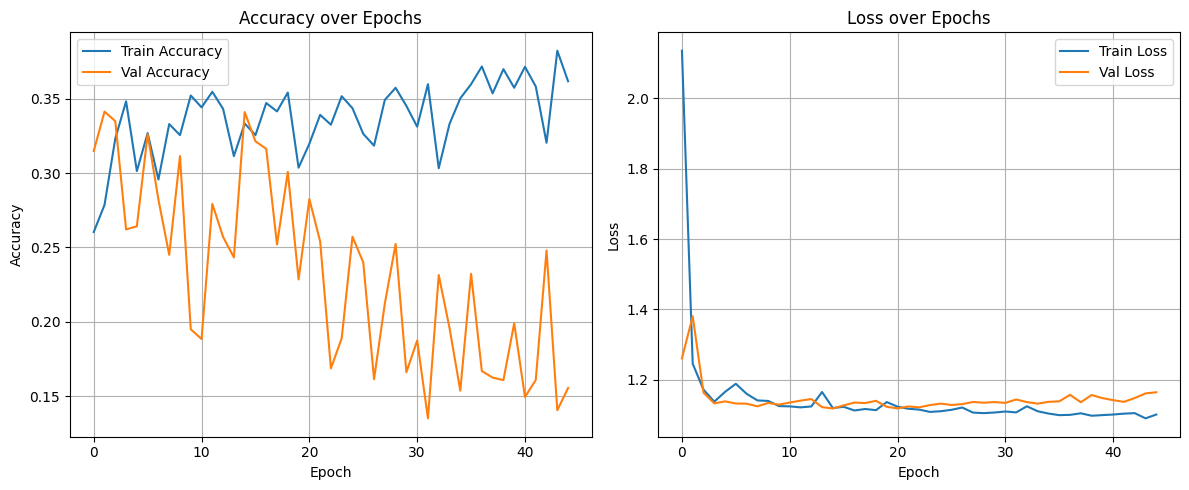

In [6]:
import pickle
import matplotlib.pyplot as plt

# ================================
# 1. history Î°úÎìú
# ================================
with open("voice_emotion_analyze_history.pkl", "rb") as f:
    history = pickle.load(f)

# ================================
# 2. ÏãúÍ∞ÅÌôî
# ================================
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# ÏÑ±Îä• Í∞úÏÑ† CNN + LSTM Î™®Îç∏ Ï†ïÏùò

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import TimeDistributed, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# GPU Î©îÎ™®Î¶¨ Ï†êÏßÑ Ìï†Îãπ ÏÑ§Ï†ï
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

def build_cnn_lstm_model(input_shape=(40, 13, 1), num_classes=4):
    inputs = Input(shape=input_shape)

    # CNN block
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = TimeDistributed(Flatten())(x)  # (batch, time_steps, features)

    # LSTM block
    x = LSTM(64, return_sequences=False)(x)
    x = Dropout(0.3)(x)

    # Output
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Î™®Îç∏ ÏÉùÏÑ±
model = build_cnn_lstm_model()
model.summary()


Model: "functional_39"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_3 (InputLayer)      ‚îÇ (None, 40, 13, 1)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_9 (Conv2D)               ‚îÇ (None, 40, 13, 32)     ‚îÇ           320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_9           ‚îÇ (None, 40, 13, 32)     ‚îÇ           128 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_9 (MaxPooling2D)  ‚îÇ (None, 20, 6, 32)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_10 (Conv2D)              ‚îÇ (None, 20, 6, 64)      ‚îÇ        18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_10          ‚îÇ (None, 20, 6, 64)      ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_10 (MaxPooling2D) ‚îÇ (None, 10, 3, 64)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ time_distributed                ‚îÇ (None, 10, 192)        ‚îÇ             0 ‚îÇ
‚îÇ (TimeDistributed)               ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm (LSTM)                     ‚îÇ (None, 64)             ‚îÇ        65,792 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 64)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 4)             

 Total params: 85,252 (333.02 KB)

 Trainable params: 85,060 (332.27 KB)

 Non-trainable params: 192 (768.00 B)